# Analyzing Food Health Data

Last updated : September 20th, 2022

## Introduction

During this project, I will analyze the Open Food Dataset available here : https://world.openfoodfacts.org/. The main goal of this project is to use this analysis to **present visualizations to public Health agents**. 

## 1. Data Loading and Cleaning

First we will load the necessary packages and dataset and then we will carry on with the Cleaning and Analysis.

### 1.1 Loading our packages

In [1]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Setting large figure size for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":18})

### 1.2 Loading the dataset

In [2]:
#Loading the dataset with utf-8 encoding and tab as separator as mentionned on source website
data = pd.read_csv('Data/food_data.csv',encoding='utf-8', sep='\t', low_memory=False)

data.head()

code                                                url  \
0  0000000003087  http://world-fr.openfoodfacts.org/produit/0000...   
1  0000000004530  http://world-fr.openfoodfacts.org/produit/0000...   
2  0000000004559  http://world-fr.openfoodfacts.org/produit/0000...   
3  0000000016087  http://world-fr.openfoodfacts.org/produit/0000...   
4  0000000016094  http://world-fr.openfoodfacts.org/produit/0000...   

                      creator   created_t      created_datetime  \
0  openfoodfacts-contributors  1474103866  2016-09-17T09:17:46Z   
1             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
2             usda-ndb-import  1489069957  2017-03-09T14:32:37Z   
3             usda-ndb-import  1489055731  2017-03-09T10:35:31Z   
4             usda-ndb-import  1489055653  2017-03-09T10:34:13Z   

  last_modified_t last_modified_datetime                    product_name  \
0      1474103893   2016-09-17T09:18:13Z              Farine de blé noir   
1      1489069957   2017-03-09T14:32:37Z  Banana Chips Sweetened (Whole)   
2      1489069957   2017-03-09T14:32:37Z                         Peanuts   
3      1489055731   2017-03-09T10:35:31Z          Organic Salted Nut Mix   
4      1489055653   2017-03-09T10:34:13Z                 Organic Polenta   

  generic_name quantity  ... ph_100g fruits-vegetables-nuts_100g  \
0          NaN      1kg  ...     NaN                         NaN   
1          NaN      NaN  ...     NaN                         NaN   
2          NaN      NaN  ...     NaN                         NaN   
3          NaN      NaN  ...     NaN                         NaN   
4          NaN      NaN  ...     NaN                         NaN   

  collagen-meat-protein-ratio_100g cocoa_100g chlorophyl_100g  \
0                              NaN        NaN             NaN   
1                              NaN        NaN             NaN   
2                              NaN        NaN             NaN   
3                              NaN        NaN             NaN   
4                              NaN        NaN             NaN   

  carbon-footprint_100g nutrition-score-fr_100g nutrition-score-uk_100g  \
0                   NaN                     NaN                     NaN   
1                   NaN                    14.0                    14.0   
2                   NaN                     0.0                     0.0   
3                   NaN                    12.0                    12.0   
4                   NaN                     NaN                     NaN   

  glycemic-index_100g water-hardness_100g  
0                 NaN                 NaN  
1                 NaN                 NaN  
2                 NaN                 NaN  
3                 NaN                 NaN  
4                 NaN                 NaN  

[5 rows x 162 columns]

In [3]:
#Looking at the number of columns
len(data.columns)
#Changing the max_info_columns pandas variable to be able to display all columns of our dataset
pd.options.display.max_info_columns = 170

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 162 columns):
 #    Column                                      Non-Null Count   Dtype  
---   ------                                      --------------   -----  
 0    code                                        320749 non-null  object 
 1    url                                         320749 non-null  object 
 2    creator                                     320770 non-null  object 
 3    created_t                                   320769 non-null  object 
 4    created_datetime                            320763 non-null  object 
 5    last_modified_t                             320772 non-null  object 
 6    last_modified_datetime                      320772 non-null  object 
 7    product_name                                303010 non-null  object 
 8    generic_name                                52795 non-null   object 
 9    quantity                                    104819 non-nu

### 1.3 Data cleaning

We will start by looking for a primary key in our dataset and assigning it to the id column.

#### 1.3.1 Filtering the columns

In [4]:
#First we will define a function that drops columns that are null in more than x% of our database
def drop_na_columns(df: pd.DataFrame, percent: float):
    n = len(df)
    cutoff = n*percent/100
    for c in df.columns:
        if len(df[c].dropna()) < cutoff:
            df.drop(columns={c}, inplace=True)

#Defining a function to drop columns with tags
def drop_tags(df: pd.DataFrame, tag: str):
    end_string = "_" + tag
    for c in df.columns:
        if c.endswith(end_string):
            df.drop(columns={c}, inplace=True)

#We will drop all columns that have more than 90% null fields
drop_na_columns(data, 10)
print(len(data.columns))
#We deleted 99 of our initial 161 columns

#Columns with the _fr, _tags countain duplicate data, we will only keep the columns without tags 
#Deleting columns with the French language tags
drop_tags(data, 'fr')
print(len(data.columns))
#We deleted 7 further columns

#Deleting columns which are tags
drop_tags(data, 'tags')
print(len(data.columns))
#We deleted 8 further columns

62
55
47


In [5]:
#We don't need columns related to the barcode, import datetime and the creator of the record
data.drop(columns = {'code','url','creator','created_t','created_datetime',
                     'last_modified_t','last_modified_datetime'}, inplace=True)

#We will also drop columns with product images and states which contain information about
#the fields that need completion
data.states.unique()

data.drop(columns = {'states','image_url','image_small_url'}, inplace=True)

#We can remove serving size information because all nutrients are characterized by weight
data.drop(columns = {'serving_size'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 36 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             303010 non-null  object 
 1   generic_name                             52795 non-null   object 
 2   quantity                                 104819 non-null  object 
 3   packaging                                78960 non-null   object 
 4   brands                                   292360 non-null  object 
 5   categories                               84410 non-null   object 
 6   manufacturing_places                     36501 non-null   object 
 7   labels                                   46559 non-null   object 
 8   purchase_places                          58193 non-null   object 
 9   stores                                   51722 non-null   object 
 10  countries                       

In [6]:
#These variables have too many unique values and they cannot be used as categories
print(len(data.manufacturing_places.unique()))
print(len(data.brands.unique()))
print(len(data.stores.unique()))
print(len(data.packaging.unique()))
print(len(data.purchase_places.unique()))
print(len(data.labels.unique()))
print(len(data.categories.unique()))
print(len(data.main_category.unique()))

#We will keep countries as our only geographical data, but it is preserved within tags

data.drop(columns = {'manufacturing_places','brands','stores','packaging','purchase_places',
                     'labels','categories','main_category'}, inplace=True)

7309
58785
3260
14548
5121
18115
36983
3544


In [7]:
#Ingredients and additive list will also not be relevant
data.additives.unique()
data.ingredients_text.unique()
data.drop(columns = {'additives','ingredients_text'}, inplace=True)

#We will also remove the quantity column since all our values for nutrients are scaled on 100g
data.drop(columns = {'quantity'}, inplace=True)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Data columns (total 25 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   product_name                             303010 non-null  object 
 1   generic_name                             52795 non-null   object 
 2   countries                                320492 non-null  object 
 3   additives_n                              248939 non-null  float64
 4   ingredients_from_palm_oil_n              248939 non-null  float64
 5   ingredients_that_may_be_from_palm_oil_n  248939 non-null  float64
 6   pnns_groups_1                            91513 non-null   object 
 7   pnns_groups_2                            94491 non-null   object 
 8   energy_100g                              261113 non-null  float64
 9   fat_100g                                 243891 non-null  float64
 10  saturated-fat_100g              

After filtering the columns, we now have 25 relevant variables

#### 1.3.2 Handling missing values

First of all, we will remove data with no product_name as this is our way to reference the type of food.

In [8]:
#Removing rows without product_name
data = data.loc[~data.product_name.isna()]

#Since we cannot analyze each product separetely, we will perform our analysis using the category
#and type of foods
data.pnns_groups_1.unique()
data.pnns_groups_2.unique()

#We realize that there are 'unknown' fields in these category
data.loc[data.pnns_groups_1 == 'unknown', 'pnns_groups_1'] = np.nan
data.loc[data.pnns_groups_2 == 'unknown', 'pnns_groups_2'] = np.nan
         
#First we will rename the fields where this information is located
data.rename(columns={'pnns_groups_1': 'food_cat', 'pnns_groups_2': 'food_type'}, inplace=True)

#Now we will remove the rows that are not categorized :
df = data.loc[(data.food_cat.notna()) & (data.food_type.notna())].copy()

len(df)

68344

In [9]:
#We will once again remove the columns with mostly missing fields
drop_na_columns(df,10)

df.describe()

additives_n  ingredients_from_palm_oil_n  \
count  57777.000000                 57777.000000   
mean       1.760060                     0.056926   
std        2.500079                     0.235261   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        1.000000                     0.000000   
75%        3.000000                     0.000000   
max       31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  \
count                             57777.000000  54760.000000  52421.000000   
mean                                  0.131159   1091.769890     13.544981   
std                                   0.431272    814.461881     17.737422   
min                                   0.000000      0.000000      0.000000   
25%                                   0.000000    369.000000      1.000000   
50%                                   0.000000    992.000000      6.200000   
75%                                   0.000000   1645.000000     22.000000   
max                                   5.000000  22000.000000    380.000000   

       saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  \
count        51403.000000        52006.000000  51604.000000  33036.000000   
mean             5.425541           27.368595     13.078624      2.718306   
std              8.523224           27.397521     18.679352      3.936292   
min              0.000000            0.000000     -0.100000      0.000000   
25%              0.200000            4.000000      1.000000      0.355250   
50%              1.800000           13.800000      4.200000      1.600000   
75%              7.515000           53.000000     16.000000      3.500000   
max            210.000000          190.000000    134.000000     94.800000   

       proteins_100g     salt_100g   sodium_100g  nutrition-score-fr_100g  \
count   54288.000000  51760.000000  51755.000000             50363.000000   
mean        7.488530      0.879491      0.346287                 8.327423   
std         7.320579      2.644847      1.041230                 9.184187   
min         0.000000      0.000000      0.000000               -15.000000   
25%         1.500000      0.050800      0.020000                 1.000000   
50%         5.900000      0.500000      0.196850                 8.000000   
75%        10.600000      1.200000      0.472441                15.000000   
max        86.000000    297.600000    117.165354                40.000000   

       nutrition-score-uk_100g  
count             50363.000000  
mean                  7.871056  
std                   9.670946  
min                 -15.000000  
25%                   0.000000  
50%                   6.000000  
75%                  16.000000  
max                  35.000000

Before doing any kind of data imputation to fill the results, we need to **delete incoherent values.**

For example, in 100g of food, the **maximum energy can be 900*4.18 kJ = 3762kJ** (because the nutriment with the highest calories value is fat with 9kcal/g, and you have to multiply by 4.18 to convert kcal into kJ)

In the same way, values for all the nutrients cannot exceed 100g by 100g for obvious reasons.

Instead of just deleting the missing values, we will **delete the records** with erroneous values because since the data is open source, we cannot trust that the rest of the row will be without any mistake.

Since all our nutrients values are per 100g, we will also rename the columns for easier selection.

In [10]:
#Defining a function to remove tags
def remove_tags(df: pd.DataFrame, tag: str):
    column_names = []
    end_char = '_'+tag
    for c in df.columns:
        if c.endswith(end_char):
            column_names.append(c.replace(end_char,''))
        else:
            column_names.append(c)
    df.columns = column_names

#Removing the 100g tags
remove_tags(df, '100g')

#Renaming the carbohydrates column for easier selection
df.rename(columns={'carbohydrates': 'carb'}, inplace=True)

#Defining the number of columns where nutrients are located
nutrients_index = np.arange(9,17,1)

#Defining a function to remove records where values are over 100
def remove_over_100g(df: pd.DataFrame, nutrients_index: list):
    i = 0
    for c in df.columns:
        if np.isin(i, nutrients_index):
            df.drop(df[df[c] > 100].index, inplace=True)
        i += 1

print(len(df))
remove_over_100g(df, nutrients_index)
print(len(df))
#We have deleted 10 records

#We will now remove values with energy > 3762kJ
df.drop(df[df.energy > 3762].index, inplace=True)

print(len(df))

68344
68334
68233


In [11]:
df.describe()

additives_n  ingredients_from_palm_oil_n  \
count  57710.000000                 57710.000000   
mean       1.761705                     0.056940   
std        2.500747                     0.235292   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        1.000000                     0.000000   
75%        3.000000                     0.000000   
max       31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n        energy           fat  \
count                             57710.000000  54649.000000  52342.000000   
mean                                  0.131294   1085.163135     13.435445   
std                                   0.431484    792.502071     17.427387   
min                                   0.000000      0.000000      0.000000   
25%                                   0.000000    368.000000      1.000000   
50%                                   0.000000    990.000000      6.100000   
75%                                   0.000000   1642.000000     22.000000   
max                                   5.000000   3761.000000    100.000000   

       saturated-fat          carb        sugars         fiber      proteins  \
count   51298.000000  51935.000000  51503.000000  32952.000000  54183.000000   
mean        5.399031     27.382221     13.086327      2.724233      7.498058   
std         8.422121     27.377120     18.666639      3.938753      7.319679   
min         0.000000      0.000000     -0.100000      0.000000      0.000000   
25%         0.200000      4.090000      1.000000      0.400000      1.500000   
50%         1.800000     13.800000      4.200000      1.670000      5.900000   
75%         7.500000     53.000000     16.000000      3.500000     10.600000   
max       100.000000    100.000000    100.000000     94.800000     86.000000   

               salt        sodium  nutrition-score-fr  nutrition-score-uk  
count  51658.000000  51653.000000        50265.000000        50265.000000  
mean       0.865588      0.340814            8.313996            7.849498  
std        1.724113      0.678833            9.184788            9.666128  
min        0.000000      0.000000          -15.000000          -15.000000  
25%        0.050800      0.020000            1.000000            0.000000  
50%        0.500000      0.196850            8.000000            5.000000  
75%        1.200000      0.472441           15.000000           16.000000  
max       88.900000     35.000000           40.000000           35.000000

There does not seem to be any other illogical values. From a quick Google Search the Nutrition Score is between -15 and 40 which corresponds to our maximum and minimum values. 

We will continue our cleaning process by **deleting rows with no nutrients information**, since it will be the main information studied in this project.

In [12]:
#Dropping columns with no energy information
df = df[df.energy.notna()]

#We will also remove records that do not have information about the 3 principal nutrients
df.drop(df[(df.fat.isna()) & (df.carb.isna()) & (df.proteins.isna())].index, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54499 entries, 174 to 320763
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   product_name                             54499 non-null  object 
 1   generic_name                             37095 non-null  object 
 2   countries                                54467 non-null  object 
 3   additives_n                              49020 non-null  float64
 4   ingredients_from_palm_oil_n              49020 non-null  float64
 5   ingredients_that_may_be_from_palm_oil_n  49020 non-null  float64
 6   food_cat                                 54499 non-null  object 
 7   food_type                                54499 non-null  object 
 8   energy                                   54499 non-null  float64
 9   fat                                      51867 non-null  float64
 10  saturated-fat                            51

In [13]:
df.food_type.unique()

array(['Vegetables', 'Biscuits and cakes', 'Pizza pies and quiche',
       'Meat', 'Sweets', 'Sweetened beverages', 'Dressings and sauces',
       'One-dish meals', 'Soups', 'Cereals', 'Fruits', 'Milk and yogurt',
       'Fats', 'Non-sugared beverages', 'Cheese', 'Chocolate products',
       'Sandwich', 'Bread', 'Nuts', 'Legumes', 'Breakfast cereals',
       'Appetizers', 'Artificially sweetened beverages', 'Fruit juices',
       'Eggs', 'Fish and seafood', 'Dried fruits', 'Ice cream',
       'Processed meat', 'vegetables', 'pastries', 'Dairy desserts',
       'Potatoes', 'Fruit nectars', 'fruits', 'Salty and fatty products',
       'cereals', 'legumes', 'nuts'], dtype=object)

Before being able to apply data imputation techniques to filling our missing values, we have to **clean our categorical variables**.

The .unique() function above shows that there are duplicates in the food_type field, and there is a similar problem in the food_cat field. 

#### 1.3.3 Cleaning up duplicate food types and categories

It seems the duplicates are caused by the format being different between categories spelled out like tags (exemple salty-products) or like a regular word (Salty products). We will keep the categories spelled in proper English because this will improve our visualizations.

In [14]:
#Defining a function to merge tags and non-tag formatted fields
cat_index = [6,7]

def clean_cat_var(df: pd.DataFrame, index: list):
    i = 0
    for c in df.columns:
        if np.isin(i, index):
            #Replacing dashes by space and capitalizing the string
            df[c] = df[c].apply(lambda x: x.replace('-',' ').capitalize())
        i +=1
#Applying our function to our dataframe
clean_cat_var(df, cat_index)

#Verifying fields
print(df.food_cat.unique())
print(df.food_type.unique())

['Fruits and vegetables' 'Sugary snacks' 'Composite foods'
 'Fish meat eggs' 'Beverages' 'Fat and sauces' 'Cereals and potatoes'
 'Milk and dairy products' 'Salty snacks']
['Vegetables' 'Biscuits and cakes' 'Pizza pies and quiche' 'Meat' 'Sweets'
 'Sweetened beverages' 'Dressings and sauces' 'One dish meals' 'Soups'
 'Cereals' 'Fruits' 'Milk and yogurt' 'Fats' 'Non sugared beverages'
 'Cheese' 'Chocolate products' 'Sandwich' 'Bread' 'Nuts' 'Legumes'
 'Breakfast cereals' 'Appetizers' 'Artificially sweetened beverages'
 'Fruit juices' 'Eggs' 'Fish and seafood' 'Dried fruits' 'Ice cream'
 'Processed meat' 'Pastries' 'Dairy desserts' 'Potatoes' 'Fruit nectars'
 'Salty and fatty products']


In [15]:
#To verify that we still have no duplicates, we will calculate the levenshtein distance between
#Each category

#Importing the itertools combinations function that will generate unique pairs of our list
from itertools import combinations

#Importing Levenshtein, an algorithm that calculates the distance between the strings
from Levenshtein import distance as levenshtein_distance

#Defining our distance function
def calculate_lev_dist(x):
    return levenshtein_distance(x['first'],x['second'])

#Defining the function that will iterate over the specified indexes of our dataframe and create
#A list of dataframes containing all the pairs ordered by Levenshtein distance (ascending)
def check_similarities(df: pd.DataFrame, index):
    i = 0
    dataframes = []
    for c in df.columns:
        names = []
        if np.isin(i, index):
            #Creating a list of unique names
            name_list = df[c].dropna().unique()
            #Creating an empty array
            names = []
            #Iterating over all pairs of our list
            for c in combinations(name_list,2):
                #Appending a dictionary to the list with the 2 elements
                names.append({'first': c[0], 'second': c[1]})
            #Creating a names_df dataframe
            names_df = pd.DataFrame(names)
            #Calculating the levenshtein distance for each value pairs
            names_df['lev_dist'] = names_df.apply(calculate_lev_dist, axis=1)
            #Sorting the dataframe by levenshtein distance
            names_df.sort_values(by='lev_dist', inplace=True)
            #Adding our names_df to our list of dataframes (called 'dataframes')
            dataframes.append(names_df)
        i += 1
    return dataframes

dataframes = check_similarities(df, cat_index)

dataframes[0]
dataframes[1]

first                            second  \
335                              Fats                              Nuts   
104                              Meat                              Fats   
245                             Soups                              Nuts   
109                              Meat                             Bread   
286                            Fruits                              Fats   
..                                ...                               ...   
413                          Sandwich  Artificially sweetened beverages   
114                              Meat  Artificially sweetened beverages   
496  Artificially sweetened beverages                              Eggs   
444                              Nuts  Artificially sweetened beverages   
249                             Soups  Artificially sweetened beverages   

     lev_dist  
335         2  
104         3  
245         3  
109         3  
286         3  
..        ...  
413        29  
114        30  
496        30  
444        30  
249        31  

[561 rows x 3 columns]

We have now handled (almost) all missing values. For now, we will not handle the 32 rows without country data but we will keep in mind that we will have to remove nan values if we want to analyze this variable.

The next step is to **delete duplicate data**

#### 1.3.4 Deleting duplicate records

We will handle full duplicate rows by removing the first occurence from our dataset.

For data with duplicated product_names, we will delete all the duplicate rows except the row with the most complete values, we will create a n_full column to compute this value.

In [16]:
print("Number of duplicated rows : {}".format(df.duplicated().sum()))

#Dropping duplicate rows
df.drop_duplicates(keep='first', inplace=True)

subset = df.dropna(subset=["product_name"]).copy()
#We will now look at duplicated product names fields
print("Numer of duplicated product_name : {}".format(subset.duplicated(subset='product_name').sum()))

#Looking at an example of duplicated product name
subset[subset.product_name == "Farine de blé noir"]

#To know which row to keep when they are duplicate, we will create a new column called n_full
subset['n_full'] = subset.apply(lambda x: x.count(), axis=1)

subset.sort_values(by='n_full', ascending=False, inplace=True)

#We will now only keep the first row of each duplicate (with more data)
df.dropna(subset=["product_name"], inplace=True)

Number of duplicated rows : 384
Numer of duplicated product_name : 9040


We can see when looking at the pairs with the least Levenshtein distance that there are **no more duplicated categories in our food Category and Types variables**, so we have verified that our renaming algorithm has worked.

Now we will be able to use these fields to group elements together when performing data imputation.

#### 1.3.5 Data imputation

In this part of the project, we will fill missing values using data imputation. But first we need to check what kind of imputation technique we will use.

In general, there are 2 main ways of performing data imputation :

- **Mean imputation** : When the variables are approximatively normally distributed
- **Median (or mode) imputation** : When the variables are not normally distributed

We will first have to define a function that will calculate for each column if the variable is normally distributed. We will use the Kolmogoroff Smirnoff test to perform this verification.

After that, our function will calculate the mean or median of a subset created from the item type and will replace the missing variable by this value.

In [17]:
from scipy import stats

def data_imputation(df: pd.DataFrame, index: list, category_column: str):
    #Creating a copy of our dataset
    df_imput = df.copy()
    i = 0
    for c in df.columns:
        #Verifying that we are in one of the specified indexes
        if np.isin(i, index):
            #Normalizing target variable
            norm = c + '_norm'
            df_imput[norm] = (df_imput[c] - np.mean(df_imput[c].dropna())) / np.std(df_imput[c].dropna())

            #Calculating pval
            pval = stats.kstest(df_imput[norm].dropna(), 'norm').pvalue

            if pval >= 0.05:
                #P value is superior to 0.05, we cannot reject the null hypothesis and thus conclude the variable is
                #approximatively normally distributed
                #We will use mean imputation on that variable
                for t in df[category_column].unique():
                    #Creating subset
                    subset = df.loc[df[category_column] == t]

                    #Calculating mean based on that subset and our target column
                    mean = subset[c].mean()

                    #Applying imputation
                    df.loc[(df[c].isna()) & (df[category_column] == t), c] = mean
            else:
                #P value is inferior to 0.05, we can reject the null hypothesis and thus conclude the variable is
                #not normally distributed
                #We will use median imputation on that variable
                for t in df[category_column].unique():
                    #Creating subset
                    subset = df.loc[df[category_column] == t]

                    #Calculating mean based on that subset and our target column
                    med = subset[c].median()

                    #Applying imputation
                    df.loc[(df[c].isna()) & (df[category_column] == t), c] = med
        i+=1
    del df_imput, subset
    return None


data_imputation(df, [3,4,5], 'food_type')
data_imputation(df, np.arange(9,19,1), 'food_type')

In [18]:
#We will also remove the generic name which is a tag formatted list that we will not use
df.drop(columns = {'generic_name'}, inplace=True)


#Renaming the nutrition score columns for easier selection
df.rename(columns={'nutrition-score-fr': 'score_fr', 'nutrition-score-uk': 'score_uk'}, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54115 entries, 174 to 320763
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   product_name                             54115 non-null  object 
 1   countries                                54083 non-null  object 
 2   additives_n                              54115 non-null  float64
 3   ingredients_from_palm_oil_n              54115 non-null  float64
 4   ingredients_that_may_be_from_palm_oil_n  54115 non-null  float64
 5   food_cat                                 54115 non-null  object 
 6   food_type                                54115 non-null  object 
 7   energy                                   54115 non-null  float64
 8   fat                                      54115 non-null  float64
 9   saturated-fat                            54115 non-null  float64
 10  carb                                     54

That's the end of the data cleaning process. We will now start to analyze our dataset.

## 2. Data Analysis

Let's start by doing univariate analysis of numeric and categorical variables.

### 2.1 Analysis of numeric variables

#### 2.1.1 Distribution Analysis

In [19]:
df.describe()

additives_n  ingredients_from_palm_oil_n  \
count  54115.000000                 54115.000000   
mean       1.801774                     0.056288   
std        2.453495                     0.233980   
min        0.000000                     0.000000   
25%        0.000000                     0.000000   
50%        1.000000                     0.000000   
75%        3.000000                     0.000000   
max       31.000000                     2.000000   

       ingredients_that_may_be_from_palm_oil_n        energy           fat  \
count                             54115.000000  54115.000000  54115.000000   
mean                                  0.130611   1085.385747     13.038653   
std                                   0.427136    790.765918     17.171224   
min                                   0.000000      0.000000      0.000000   
25%                                   0.000000    369.000000      0.900000   
50%                                   0.000000    990.000000      5.800000   
75%                                   0.000000   1642.000000     21.000000   
max                                   5.000000   3761.000000    100.000000   

       saturated-fat          carb        sugars         fiber      proteins  \
count   54115.000000  54115.000000  54115.000000  54115.000000  54115.000000   
mean        5.263113     27.150607     12.814741      2.179179      7.474628   
std         8.286187     27.278213     18.431303      3.298287      7.310184   
min         0.000000      0.000000     -0.100000      0.000000      0.000000   
25%         0.200000      4.100000      1.000000      0.100000      1.500000   
50%         1.700000     13.300000      4.100000      1.100000      5.830000   
75%         7.100000     53.000000     15.200000      3.000000     10.550000   
max       100.000000    100.000000    100.000000     94.800000     86.000000   

               salt        sodium  nutrition-score-fr  nutrition-score-uk  
count  54115.000000  54115.000000        54115.000000        54115.000000  
mean       0.848825      0.334193            8.154855            7.675654  
std        1.668333      0.656846            9.104761            9.599500  
min        0.000000      0.000000          -15.000000          -15.000000  
25%        0.050000      0.019685            1.000000            0.000000  
50%        0.500000      0.196850            8.000000            5.000000  
75%        1.200000      0.472441           15.000000           16.000000  
max       88.900000     35.000000           40.000000           35.000000

In [20]:
df["energy"].dtype==str

False

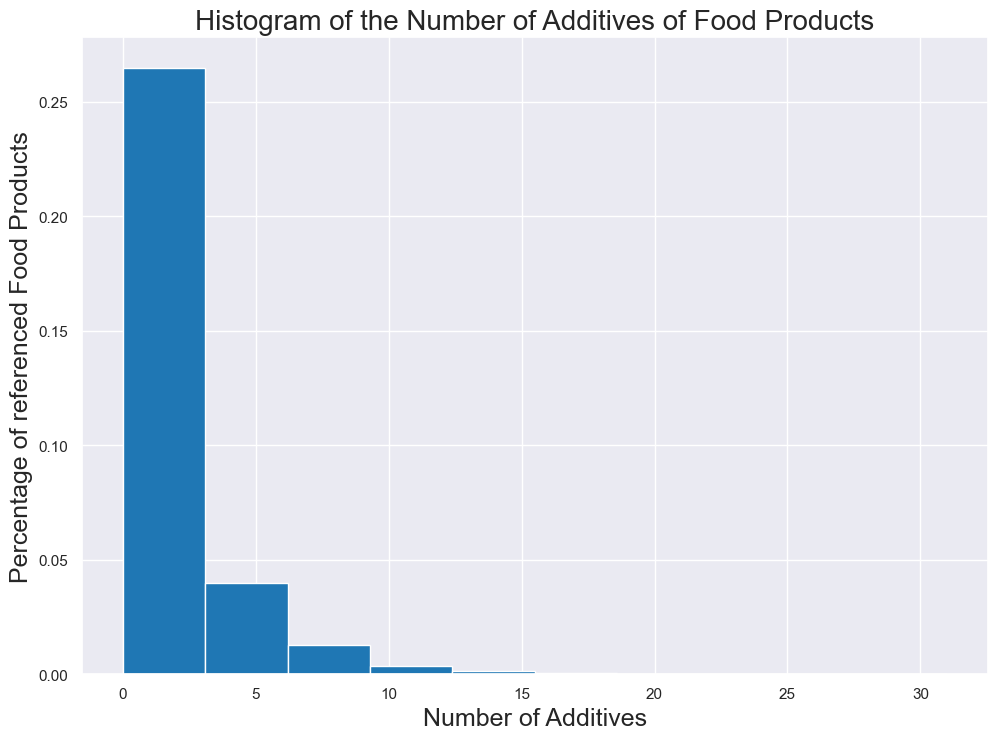

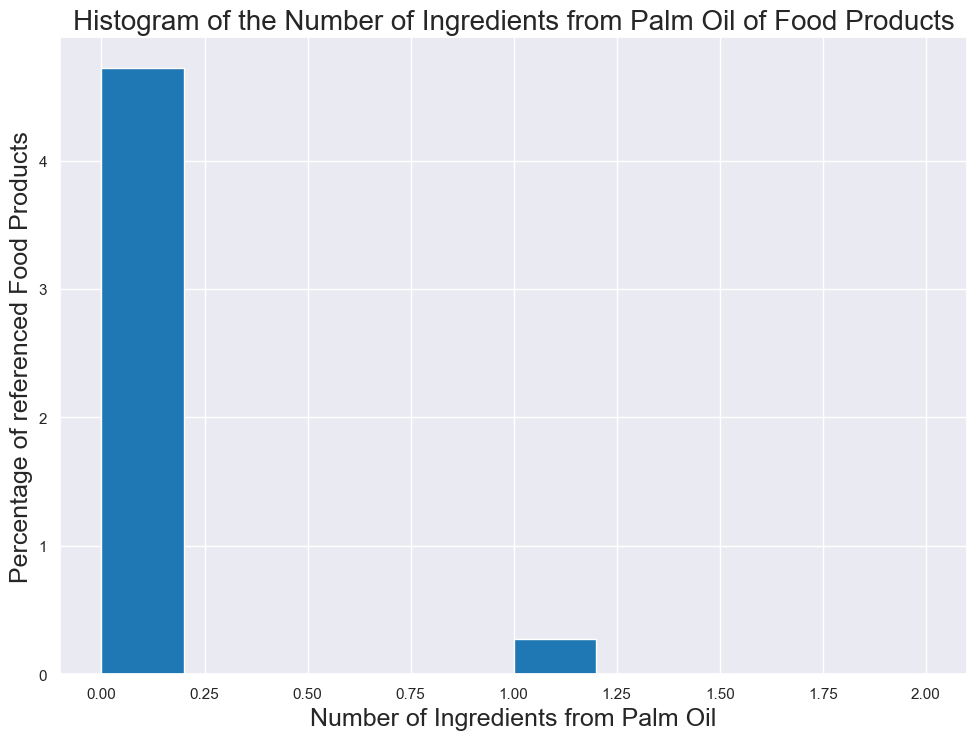

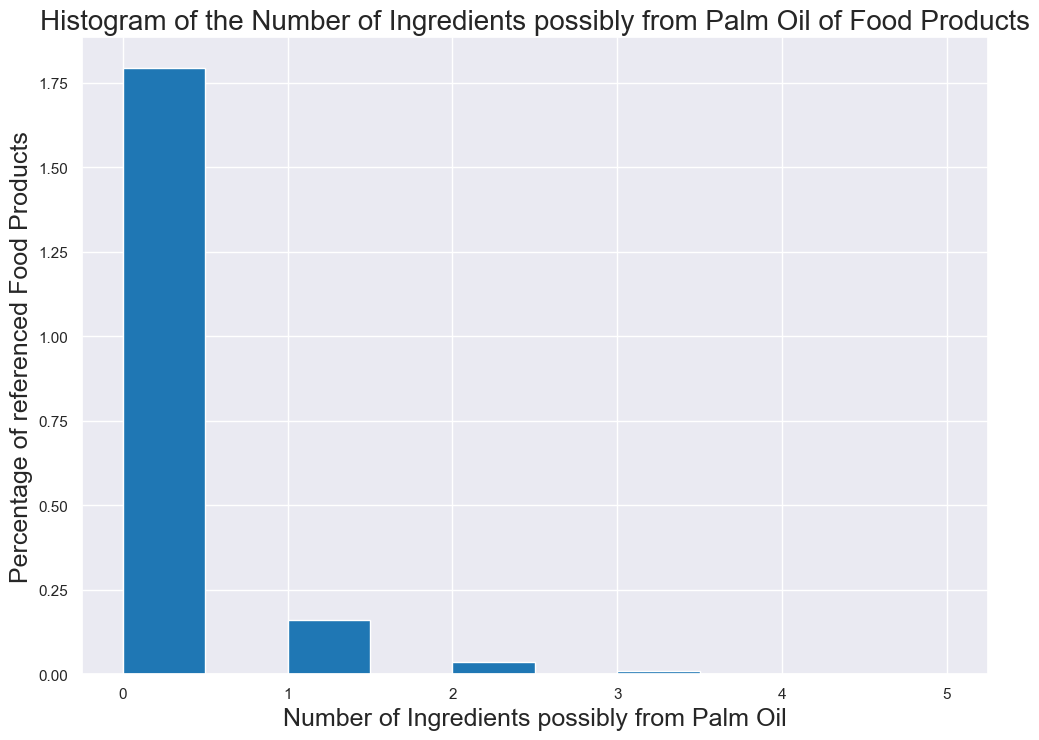

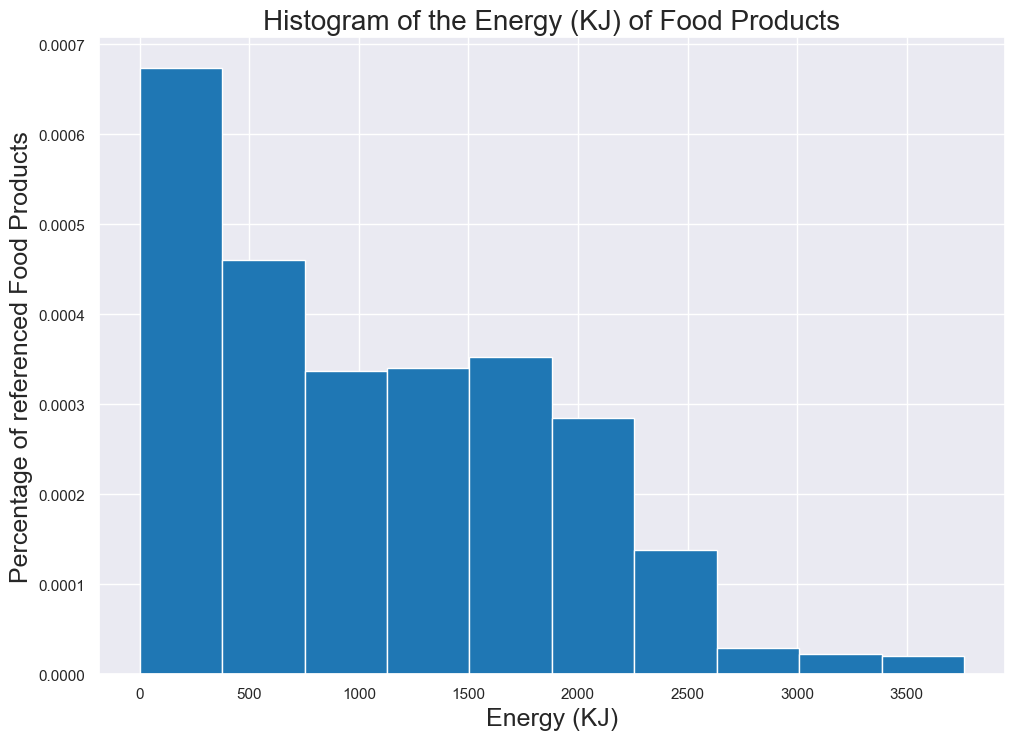

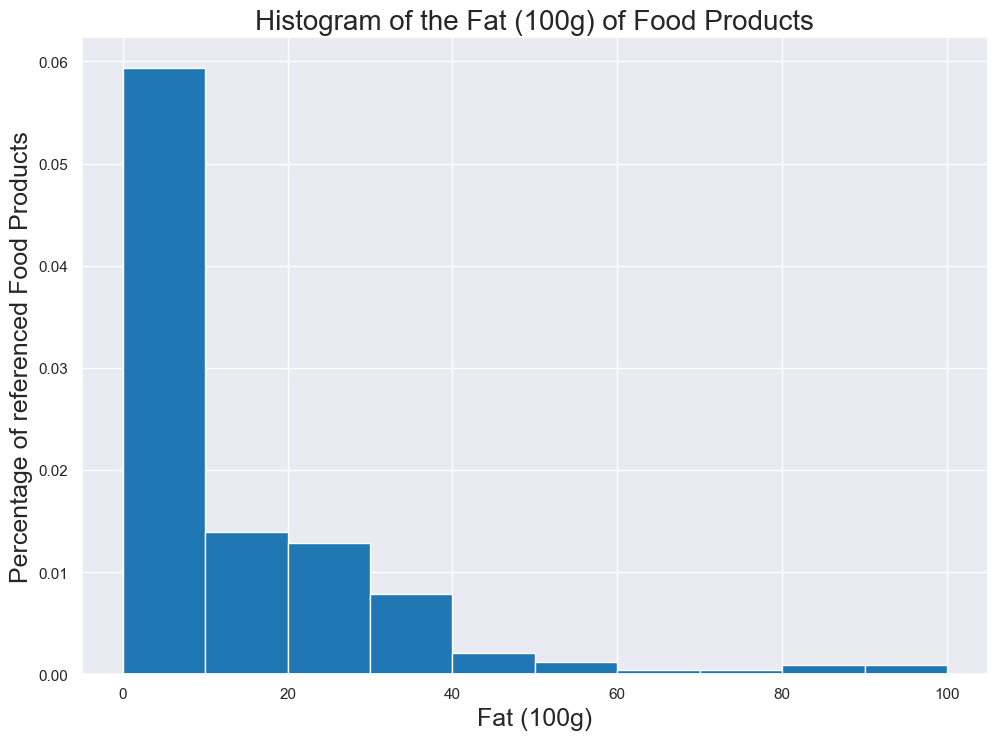

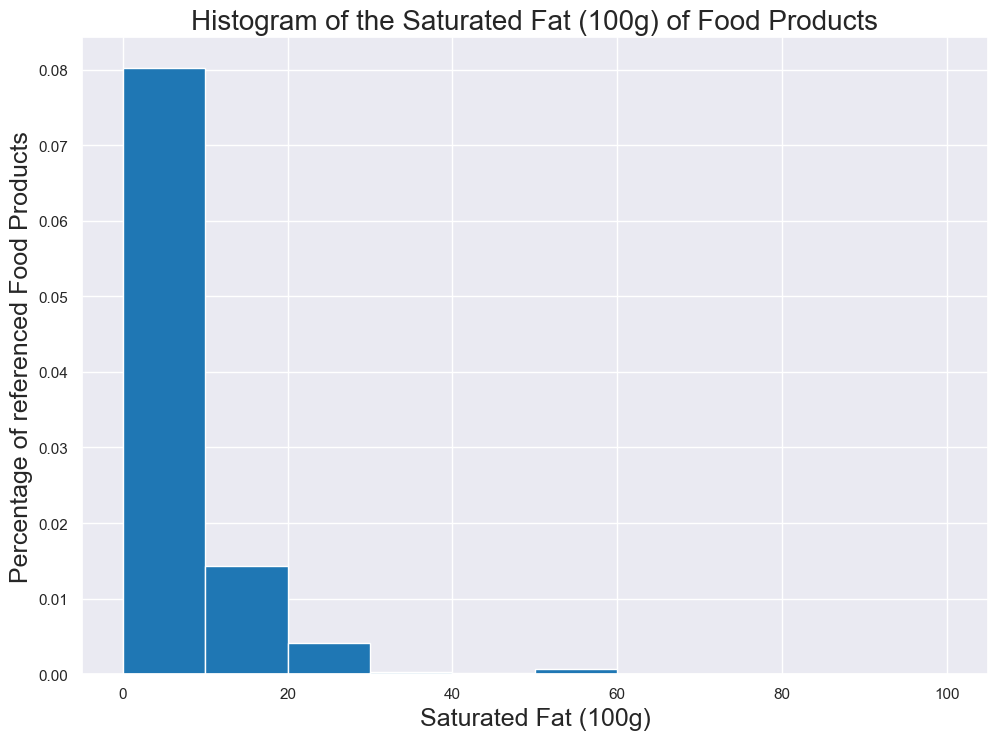

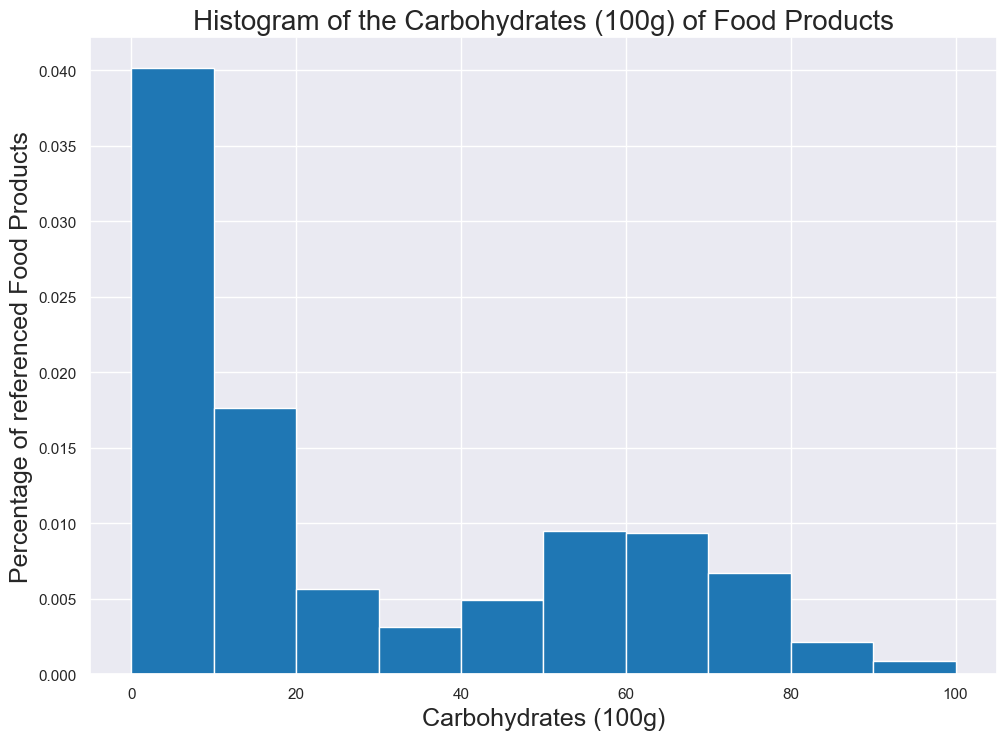

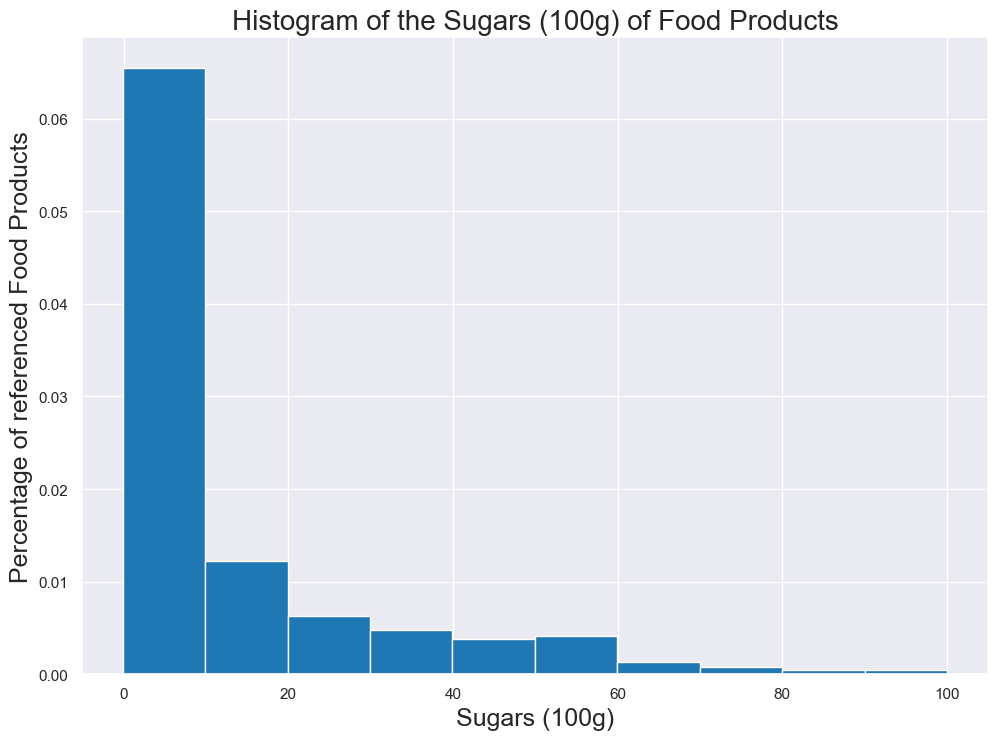

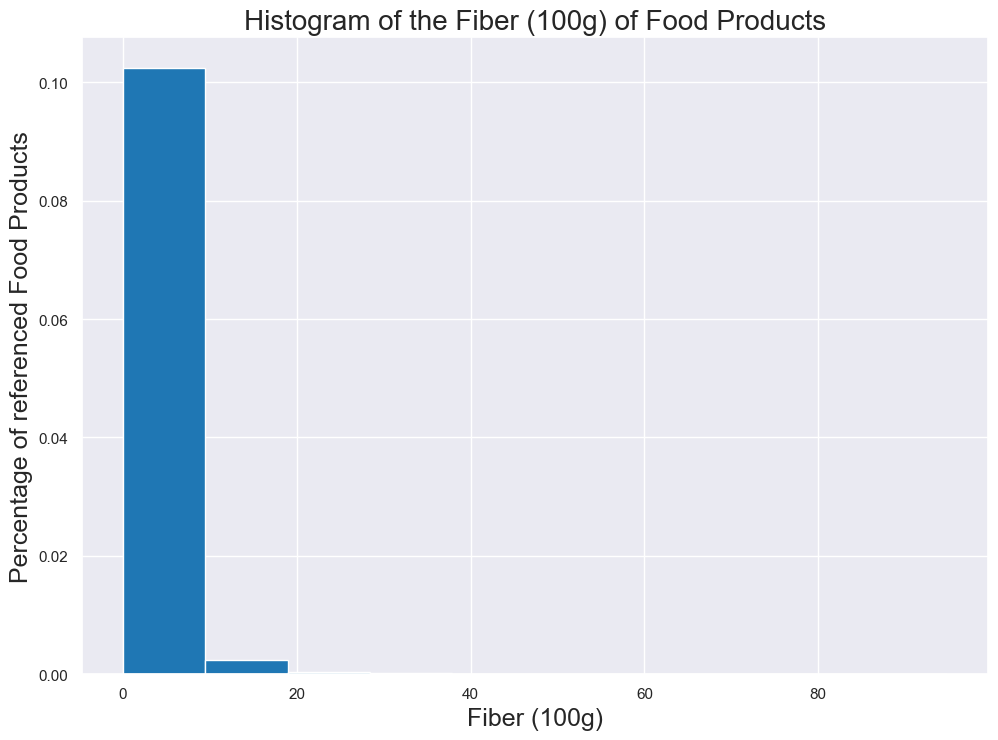

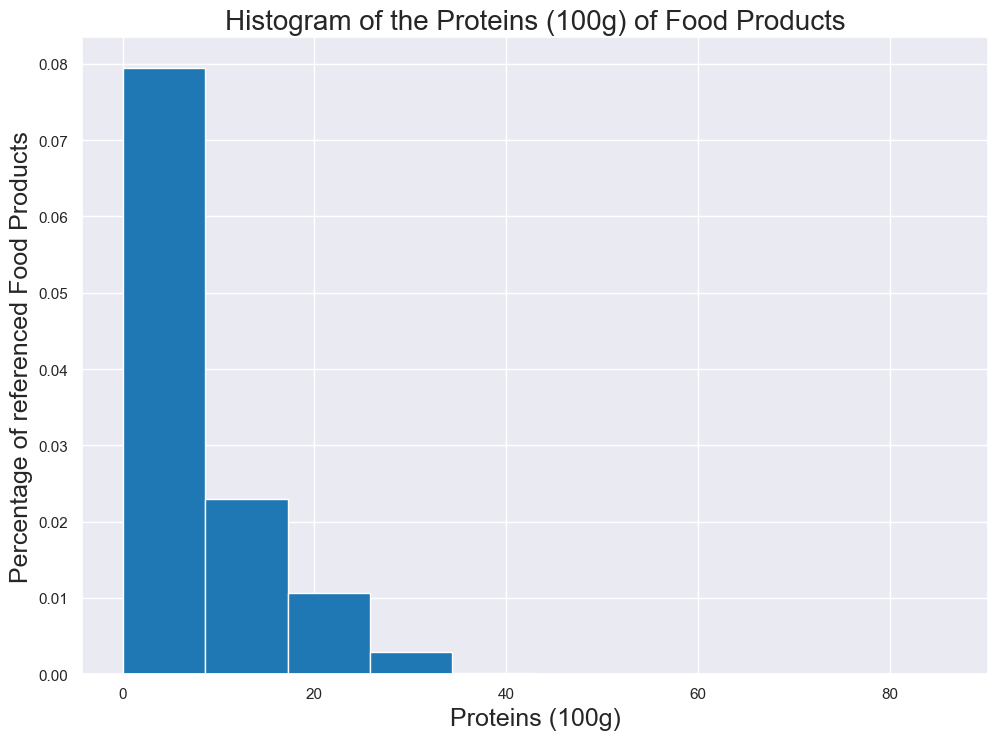

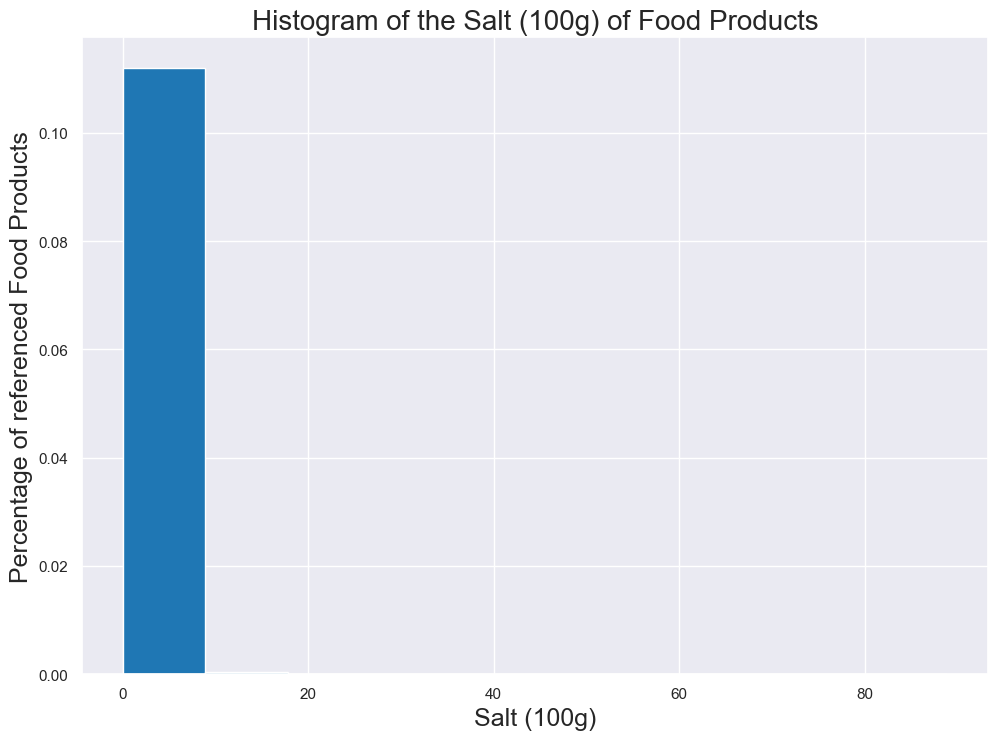

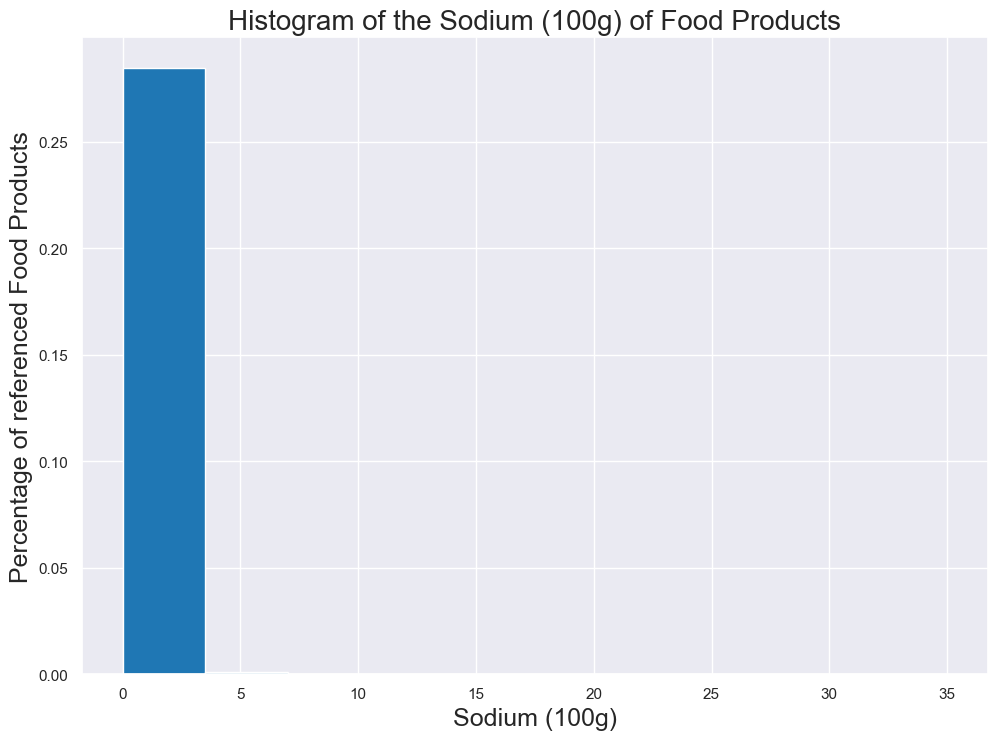

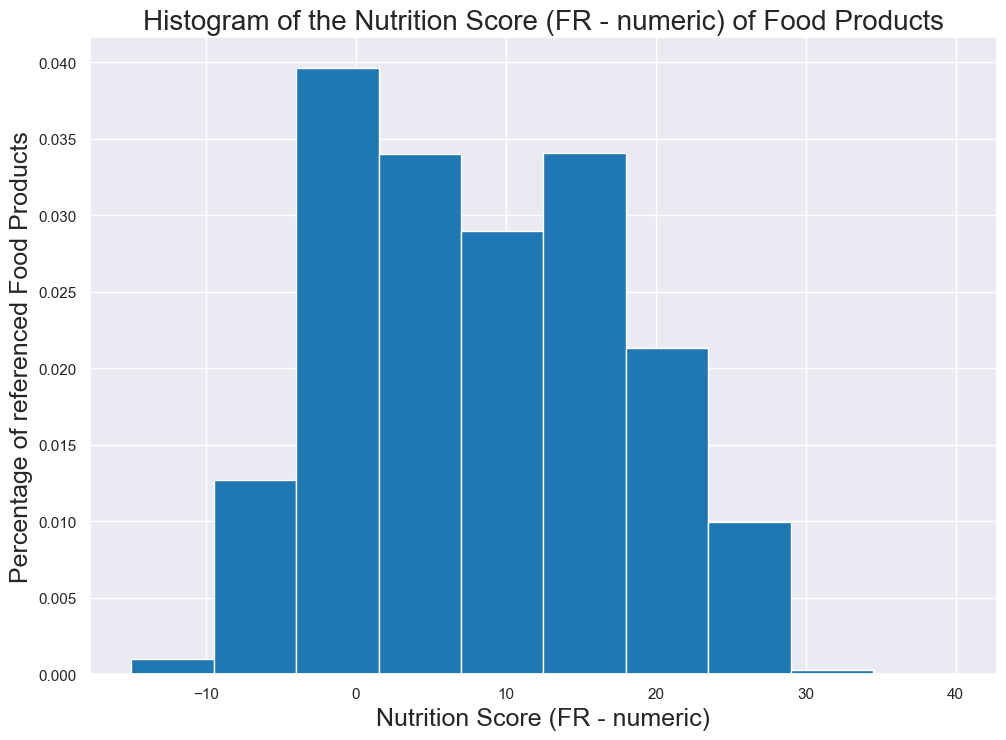

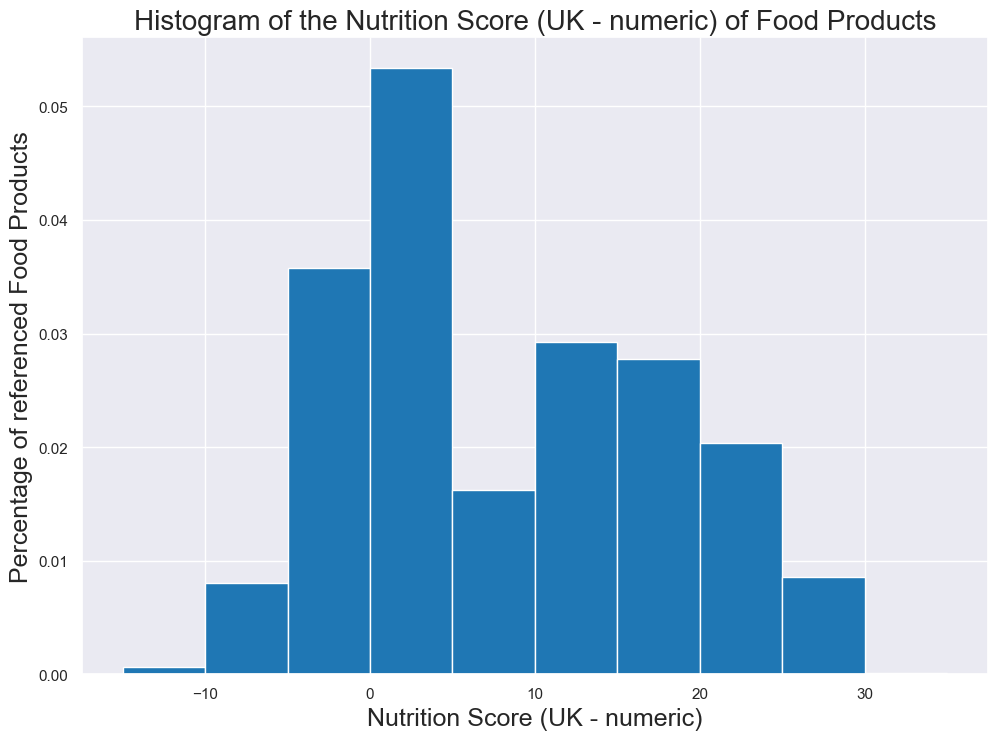

Mean     Median    Mode  \
Variable                                                                       
Number of Additives                              1.801774    1.00000     0.0   
Number of Ingredients from Palm Oil              0.056288    0.00000     0.0   
Number of Ingredients possibly from Palm Oil     0.130611    0.00000     0.0   
Energy (KJ)                                   1085.385747  990.00000  3700.0   
Fat (100g)                                      13.038653    5.80000     0.0   
Saturated Fat (100g)                             5.263113    1.70000     0.0   
Carbohydrates (100g)                            27.150607   13.30000     0.0   
Sugars (100g)                                   12.814741    4.10000     0.0   
Fiber (100g)                                     2.179179    1.10000     0.0   
Proteins (100g)                                  7.474628    5.83000     0.0   
Salt (100g)                                      0.848825    0.50000     0.0   
Sodium (100g)                                    0.334193    0.19685     0.0   
Nutrition Score (FR - numeric)                   8.154855    8.00000     1.0   
Nutrition Score (UK - numeric)                   7.675654    5.00000     1.0   

                                                   Variance  \
Variable                                                      
Number of Additives                                6.019526   
Number of Ingredients from Palm Oil                0.054745   
Number of Ingredients possibly from Palm Oil       0.182442   
Energy (KJ)                                   625299.181123   
Fat (100g)                                       294.845473   
Saturated Fat (100g)                              68.659618   
Carbohydrates (100g)                             744.087150   
Sugars (100g)                                    339.706656   
Fiber (100g)                                      10.878497   
Proteins (100g)                                   53.437802   
Salt (100g)                                        2.783285   
Sodium (100g)                                      0.431439   
Nutrition Score (FR - numeric)                    82.895137   
Nutrition Score (UK - numeric)                    92.148703   

                                              Standard Deviation   Skewness  \
Variable                                                                      
Number of Additives                                     2.453472   2.140378   
Number of Ingredients from Palm Oil                     0.233977   4.039653   
Number of Ingredients possibly from Palm Oil            0.427132   3.928706   
Energy (KJ)                                           790.758611   0.586566   
Fat (100g)                                             17.171065   2.206804   
Saturated Fat (100g)                                    8.286110   3.233210   
Carbohydrates (100g)                                   27.277961   0.727038   
Sugars (100g)                                          18.431133   1.961907   
Fiber (100g)                                            3.298257   5.564146   
Proteins (100g)                                         7.310116   1.434626   
Salt (100g)                                             1.668318  17.270066   
Sodium (100g)                                           0.656840  17.271029   
Nutrition Score (FR - numeric)                          9.104677   0.196480   
Nutrition Score (UK - numeric)                          9.599412   0.301786   

                                                Kurtosis  
Variable                                                  
Number of Additives                             6.625789  
Number of Ingredients from Palm Oil            15.342823  
Number of Ingredients possibly from Palm Oil   18.286506  
Energy (KJ)                                    -0.369108  
Fat (100g)                                      6.216692  
Saturated Fat (100g)                           17.168169  
Carbohydrates (100g)      

In [52]:
#Creating a dictionnary of column labels for easier visualization :
labels = {'product_name': 'Product Name',
         'countries': 'Countries',
         'additives_n': 'Number of Additives',
         'ingredients_from_palm_oil_n': 'Number of Ingredients from Palm Oil',
         'ingredients_that_may_be_from_palm_oil_n': 'Number of Ingredients possibly from Palm Oil',
         'food_cat': 'Food Category',
         'food_type': 'Type of Food',
         'energy': 'Energy (KJ)',
         'fat': 'Fat (100g)',
         'carb': 'Carbohydrates (100g)',
         'saturated-fat': 'Saturated Fat (100g)',
         'sugars': 'Sugars (100g)',
         'fiber': 'Fiber (100g)',
         'proteins': 'Proteins (100g)',
         'salt': 'Salt (100g)',
         'sodium': 'Sodium (100g)',
         'score_fr': 'Nutrition Score (FR - numeric)',
         'score_uk': 'Nutrition Score (UK - numeric)'}

def distribution_analysis(df: pd.DataFrame, labels: dict):
    sum_table = []
    for c in df.columns:
        if (df[c].dtype == float) | (df[c].dtype == int):
            #Calculating basic statistics for our data
            mean = df[c].mean()
            median = df[c].median()
            mode = df[[c]].mode().values[0][0]
            var = df[c].var(ddof=0)
            std = df[c].std(ddof=0)
            skew = df[c].skew()
            kurt = df[c].kurtosis()
            sum_table.append({'Variable':labels[c], 'Mean': mean, 'Median': median, 'Mode': mode,
                             'Variance': var,'Standard Deviation': std, 'Skewness': skew, 'Kurtosis': kurt })
            #Plotting a histogram of their distribution
            subset = df[c].dropna()

            subset.hist(density=True,bins=10, weights=np.ones(len(subset))/len(subset))
            plt.title("Histogram of the {} of Food Products".format(labels[c]))
            plt.xlabel(labels[c])
            plt.ylabel("Percentage of referenced Food Products")
            plt.show()
    sum_table = pd.DataFrame(sum_table).set_index('Variable')
    return sum_table

distribution_analysis(df, labels)


#### 2.1.2 Outlier detection

We will define outliers as values **below the 10th and above the 90th percentile.**
We will also compute percentile values for the 1th, 99th, 25th, 50th 75th percentile.

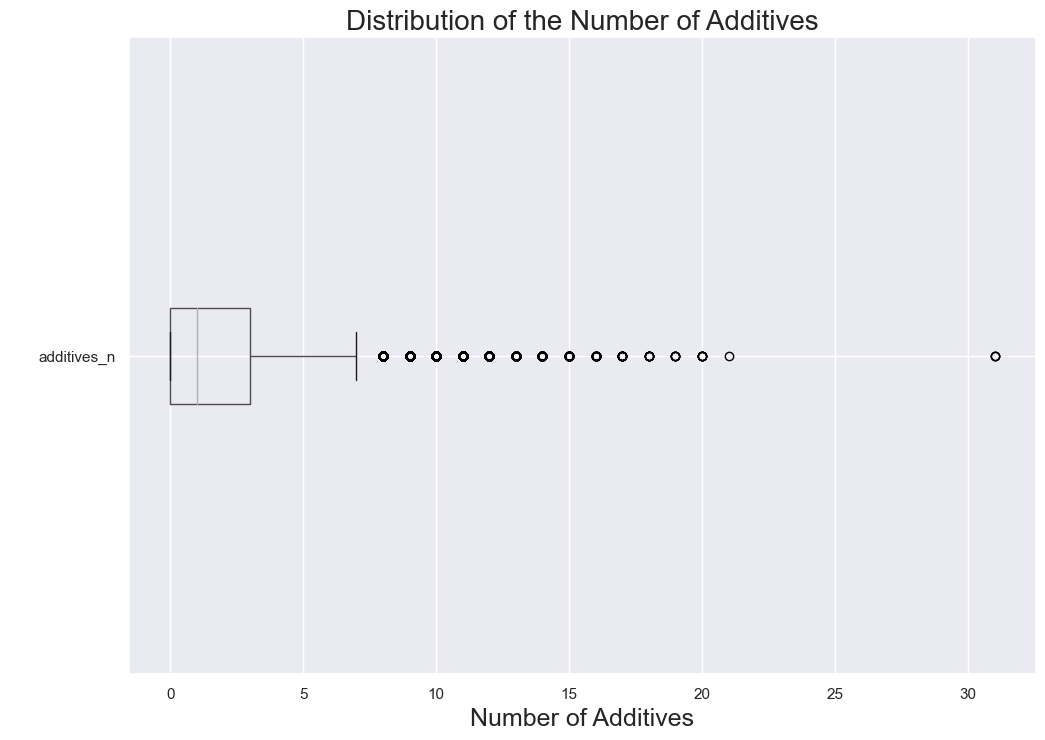

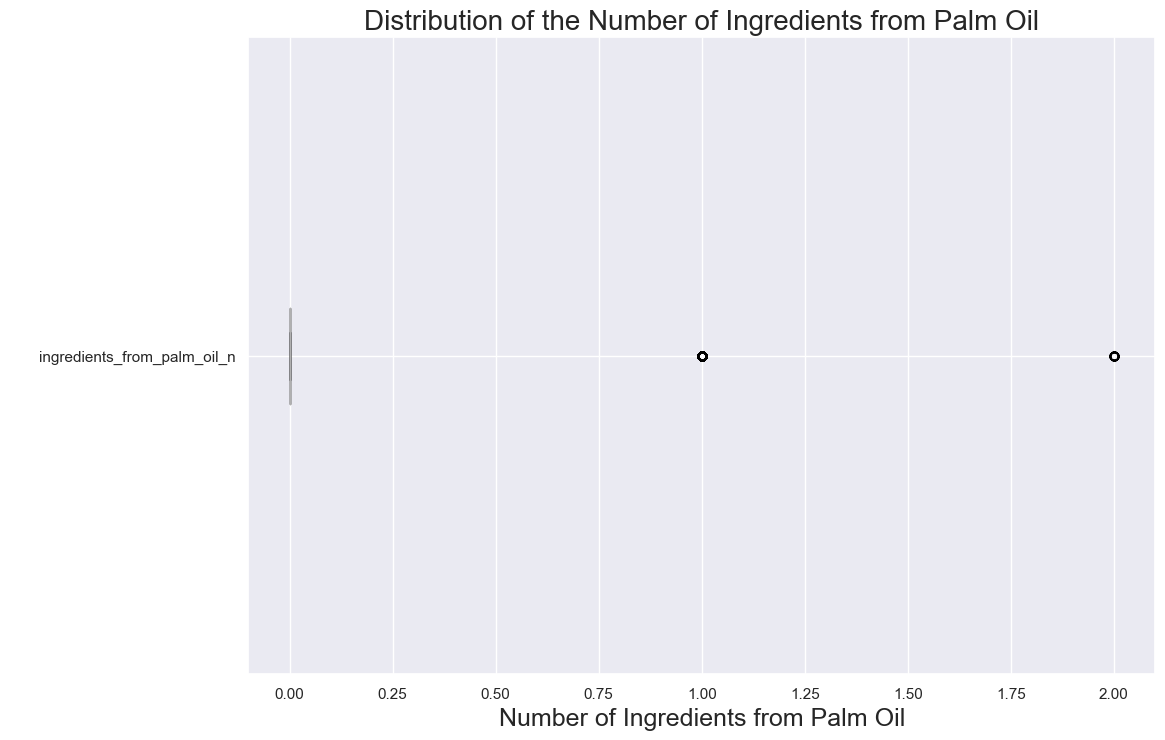

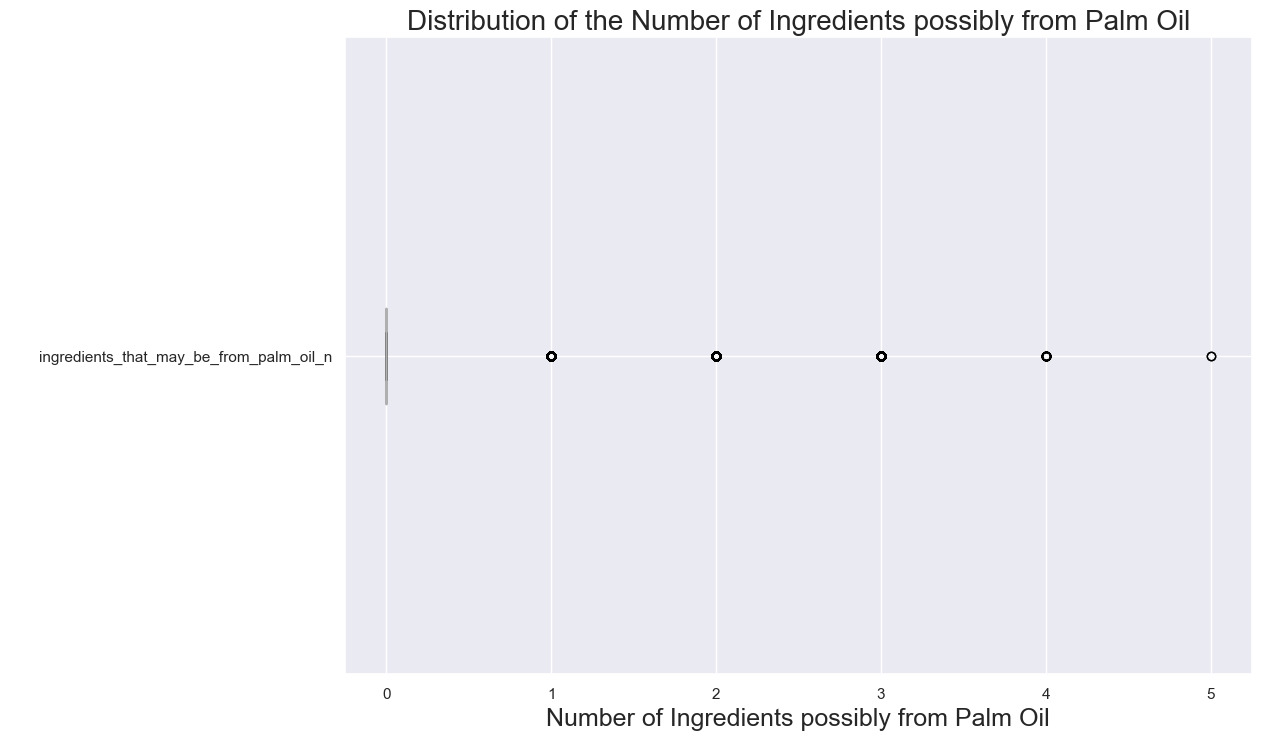

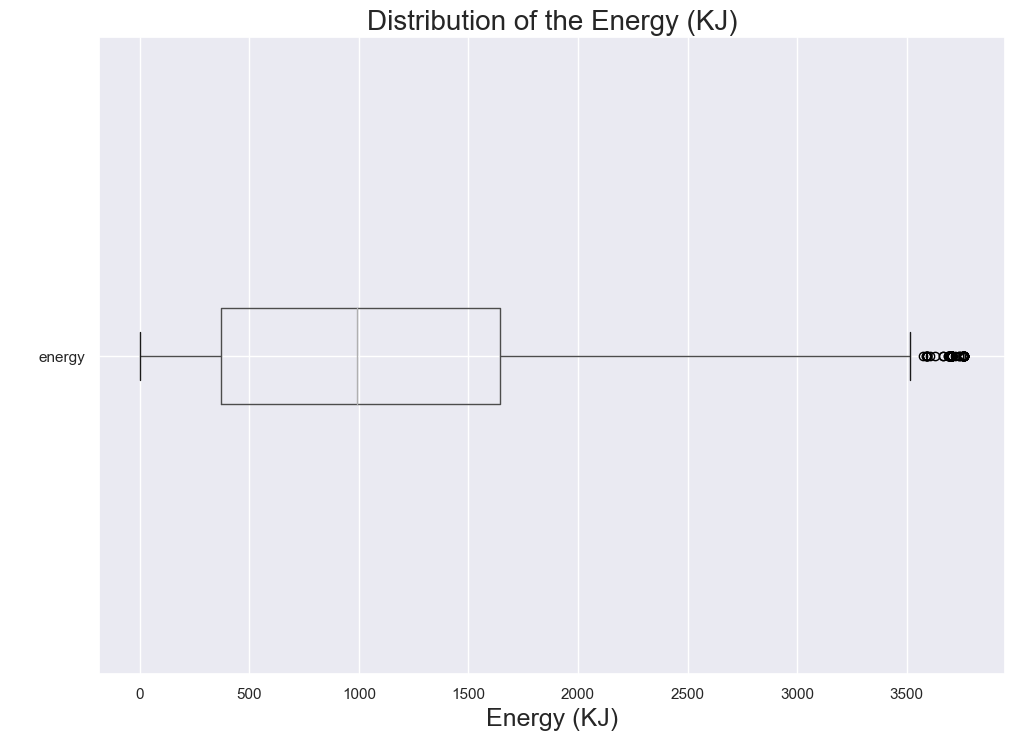

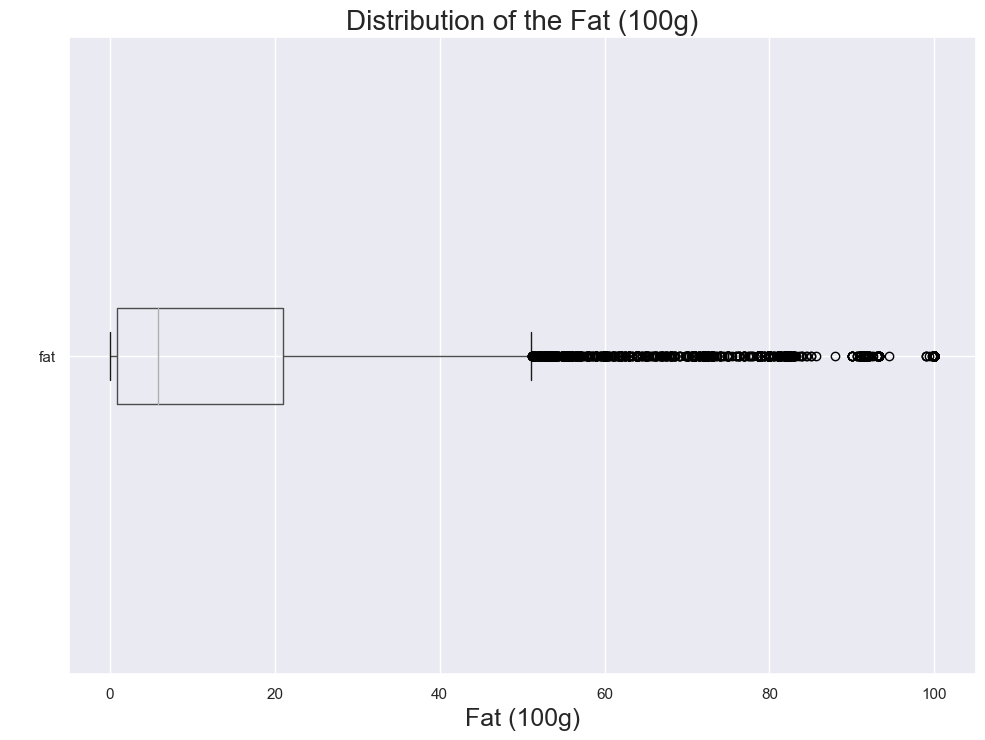

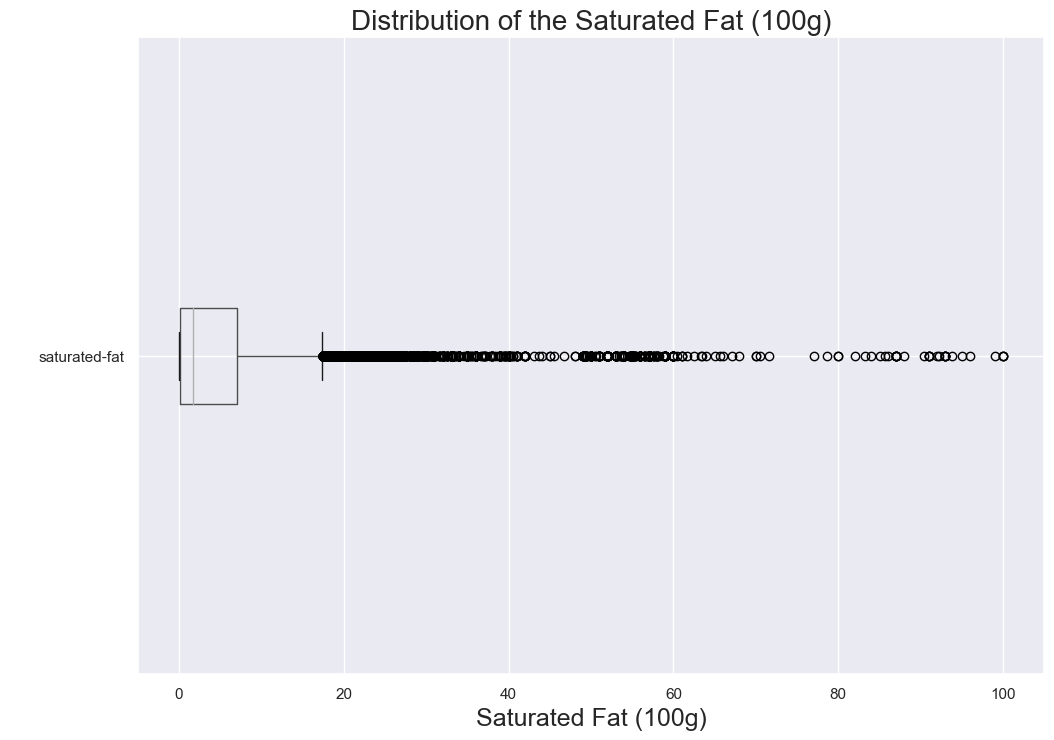

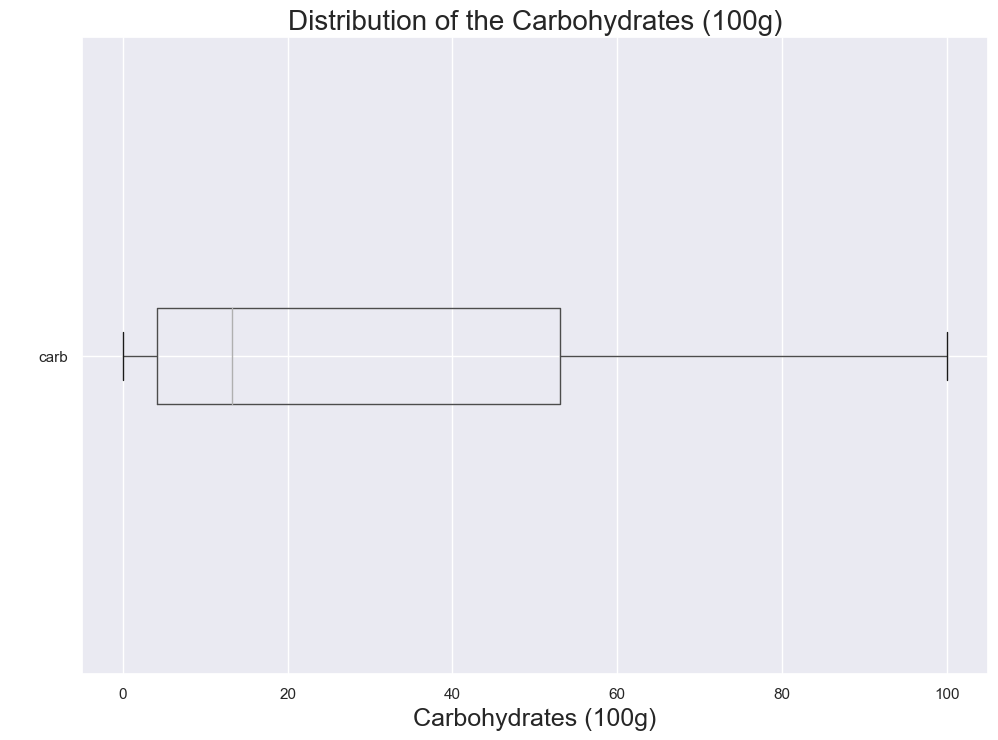

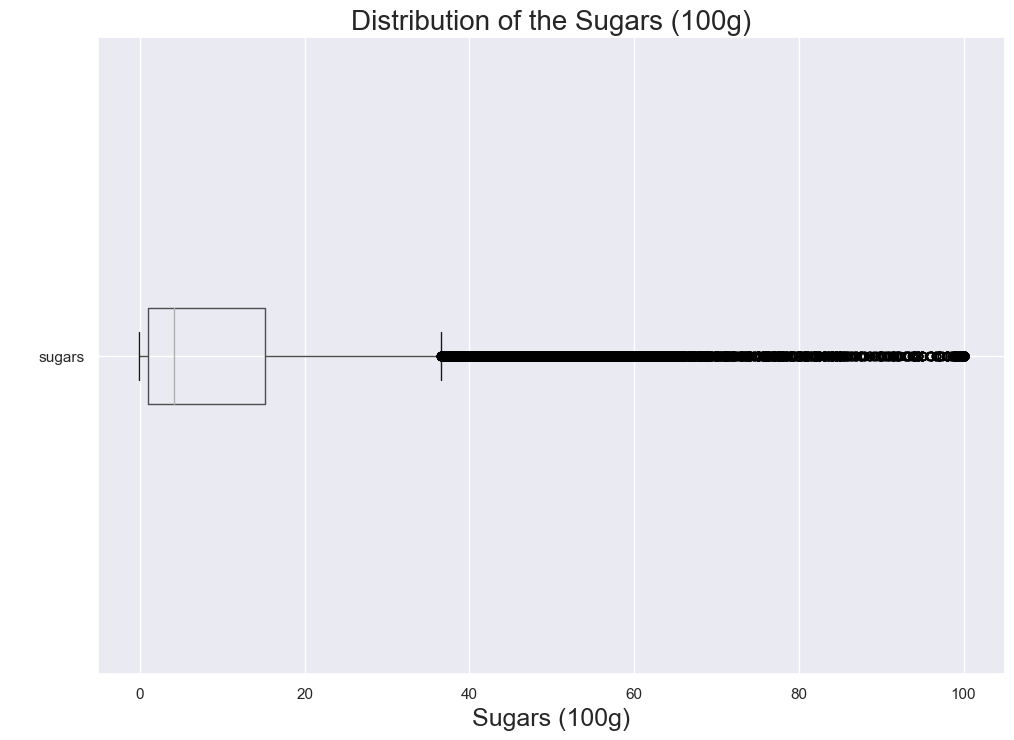

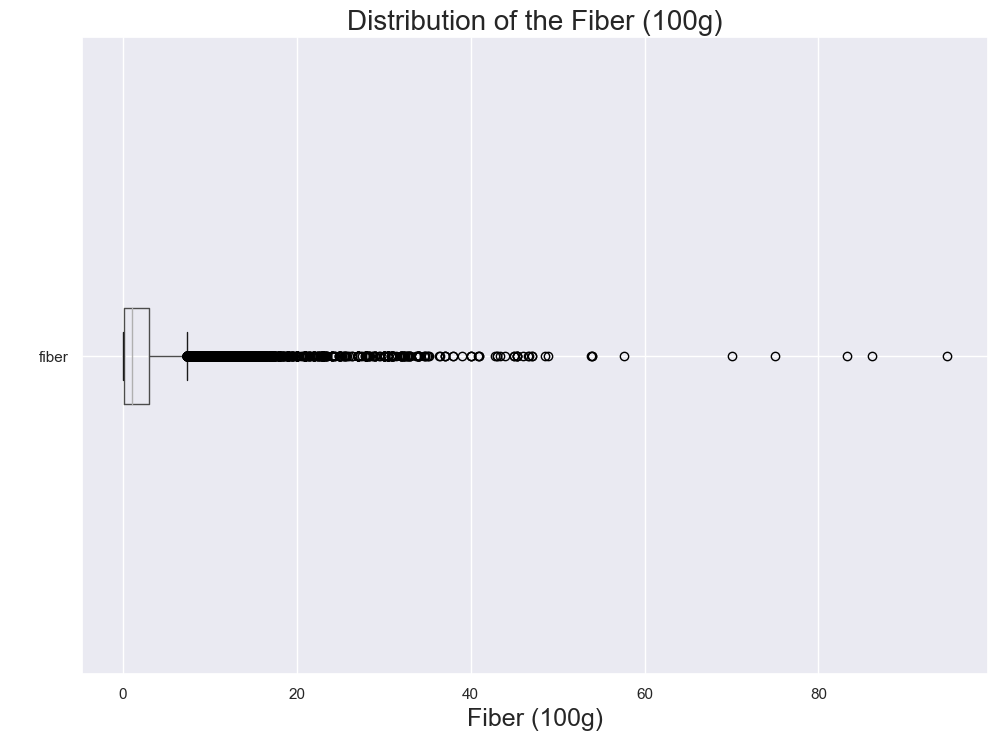

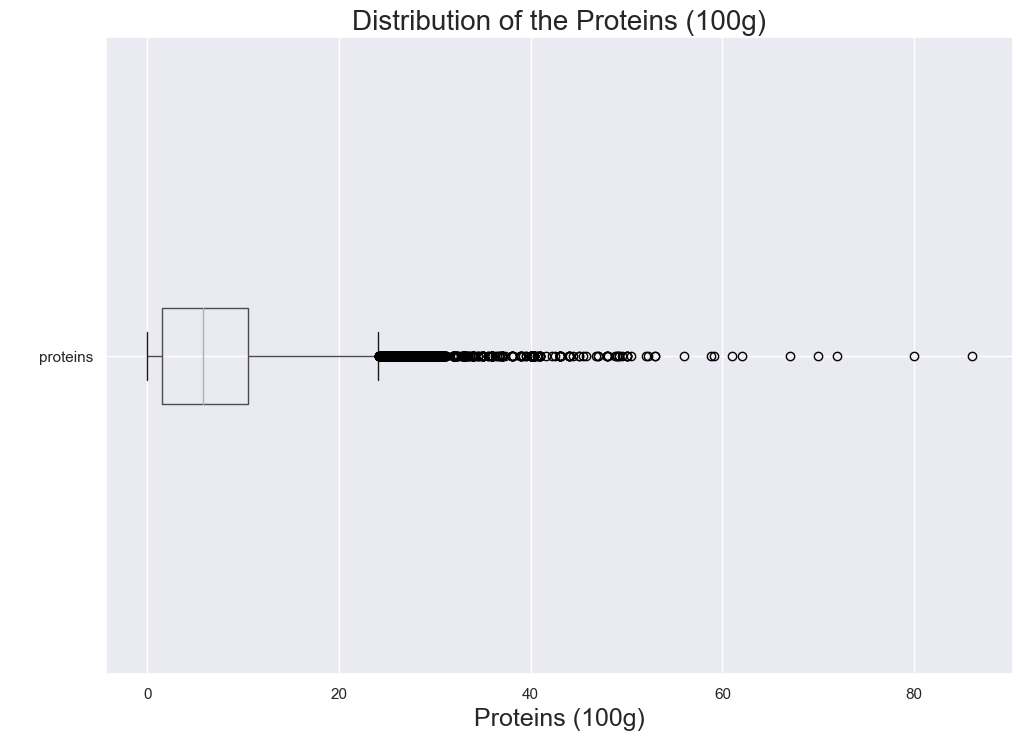

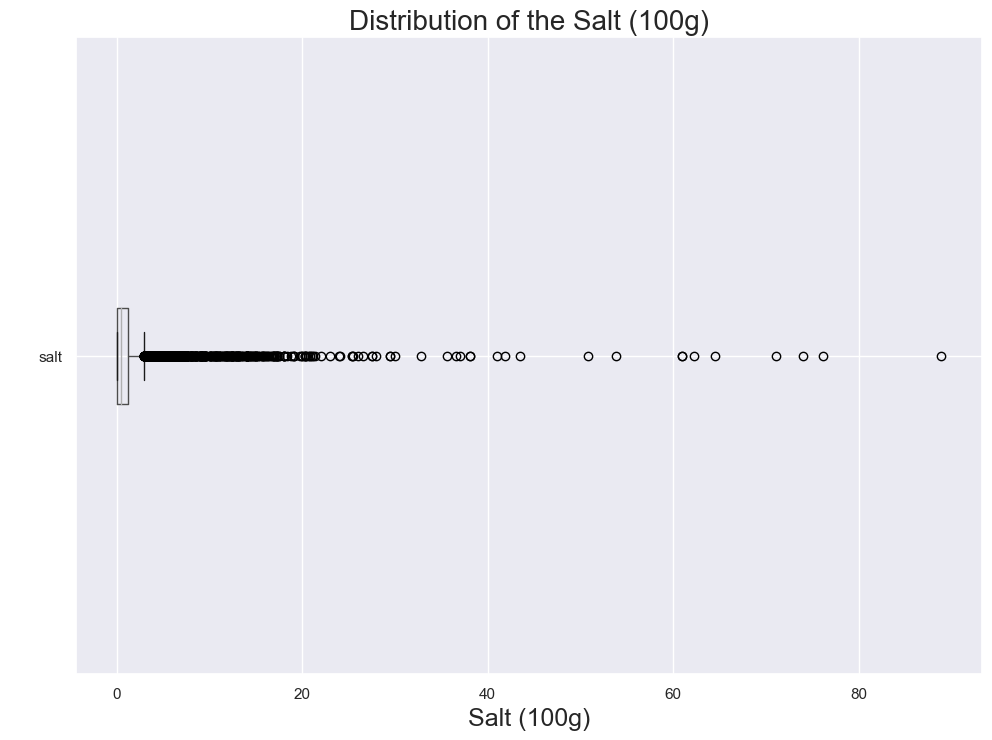

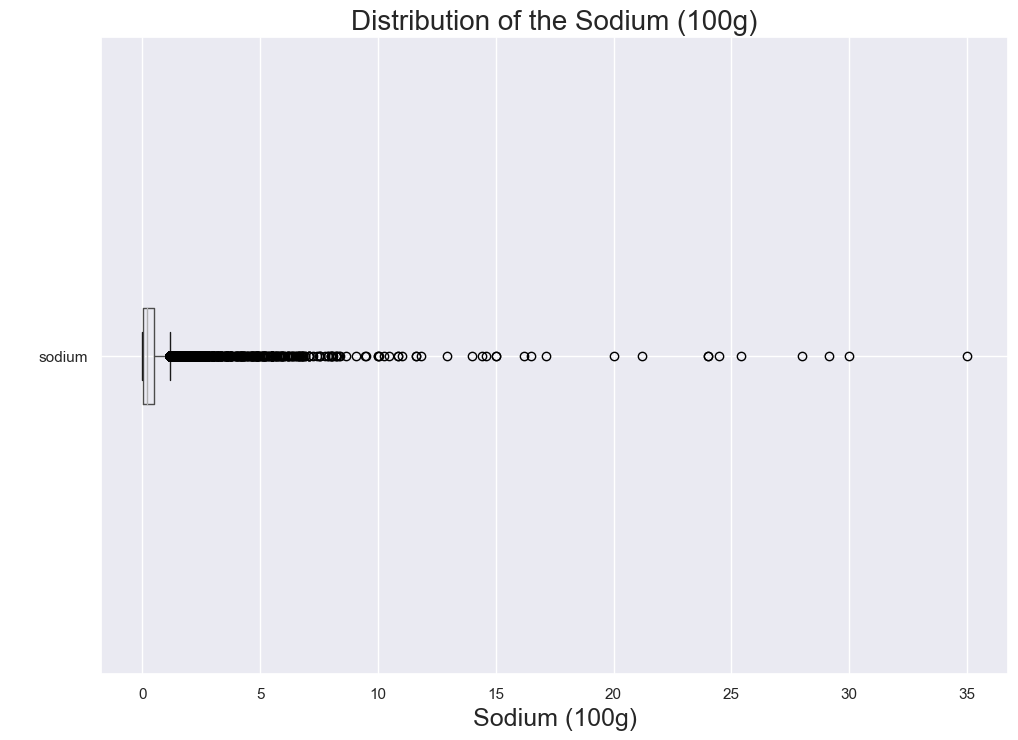

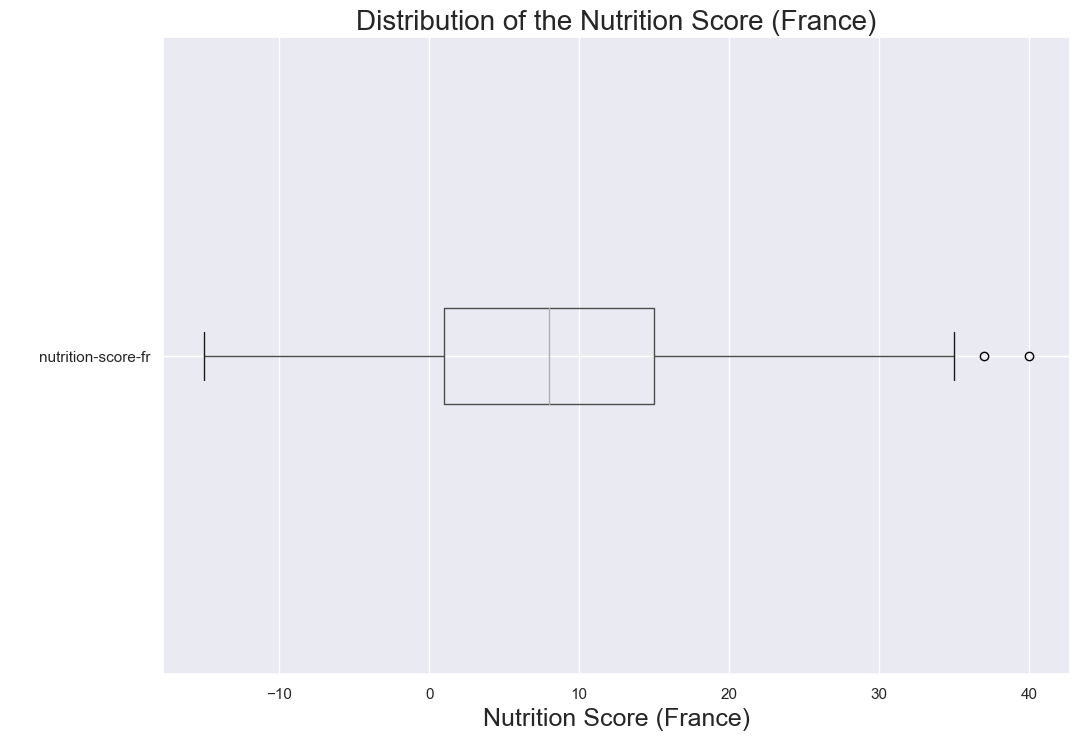

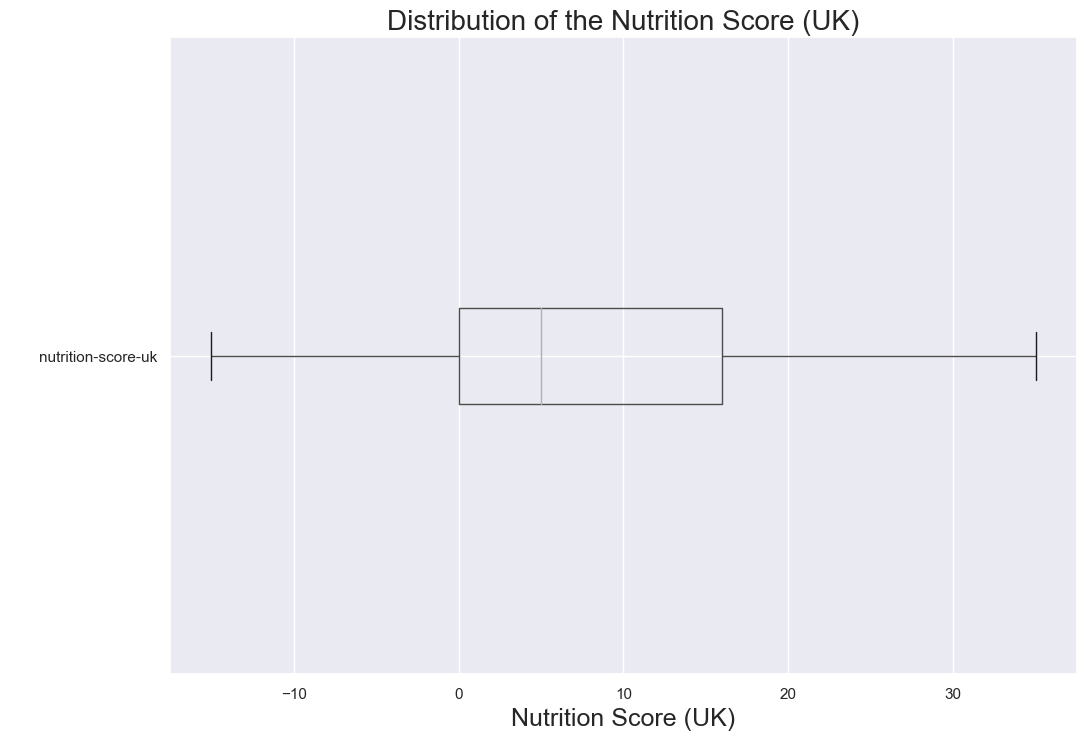

Min  1th       10th  \
Variable                                                             
Number of Additives                            0.0  0.0    0.00000   
Number of Ingredients from Palm Oil            0.0  0.0    0.00000   
Number of Ingredients possibly from Palm Oil   0.0  0.0    0.00000   
Energy (KJ)                                    0.0  9.8  176.00000   
Fat (100g)                                     0.0  0.0    0.10000   
Saturated Fat (100g)                           0.0  0.0    0.00000   
Carbohydrates (100g)                           0.0  0.0    0.70000   
Sugars (100g)                                 -0.1  0.0    0.33300   
Fiber (100g)                                   0.0  0.0    0.00000   
Proteins (100g)                                0.0  0.0    0.30000   
Salt (100g)                                    0.0  0.0    0.00800   
Sodium (100g)                                  0.0  0.0    0.00315   
Nutrition Score (France)                     -15.0 -8.0   -4.00000   
Nutrition Score (UK)                         -15.0 -8.0   -4.00000   

                                                    25th       50th  \
Variable                                                              
Number of Additives                             0.000000    1.00000   
Number of Ingredients from Palm Oil             0.000000    0.00000   
Number of Ingredients possibly from Palm Oil    0.000000    0.00000   
Energy (KJ)                                   369.000000  990.00000   
Fat (100g)                                      0.900000    5.80000   
Saturated Fat (100g)                            0.200000    1.70000   
Carbohydrates (100g)                            4.100000   13.30000   
Sugars (100g)                                   1.000000    4.10000   
Fiber (100g)                                    0.100000    1.10000   
Proteins (100g)                                 1.500000    5.83000   
Salt (100g)                                     0.050000    0.50000   
Sodium (100g)                                   0.019685    0.19685   
Nutrition Score (France)                        1.000000    8.00000   
Nutrition Score (UK)                            0.000000    5.00000   

                                                     75th         90th  \
Variable                                                                 
Number of Additives                              3.000000     5.000000   
Number of Ingredients from Palm Oil              0.000000     0.000000   
Number of Ingredients possibly from Palm Oil     0.000000     1.000000   
Energy (KJ)                                   1642.000000  2188.000000   
Fat (100g)                                      21.000000    33.500000   
Saturated Fat (100g)                             7.100000    16.600000   
Carbohydrates (100g)                            53.000000    69.300000   
Sugars (100g)                                   15.200000    43.000000   
Fiber (100g)                                     3.000000     5.100000   
Proteins (100g)                                 10.550000    19.000000   
Salt (100g)                                      1.200000     1.900000   
Sodium (100g)                                    0.472441     0.748031   
Nutrition Score (France)                        15.000000    21.000000   
Nutrition Score (UK)                            16.000000    21.000000   

                                                     99th     Max  
Variable                                                           
Number of Additives                             11.000000    31.0  
Number of Ingredients from Palm Oil              1.000000     2.0  
Number of Ingredients possibly from Palm Oil     2.000000     5.0  
Energy (KJ)                                   3109.000000  3761.0  
Fat (100g)                                      82.000000   100.0  
Saturated Fat (100g)                            35.658000   100.0  
Carbohydrates (100g)                            88.000000   

In [33]:
def quantile_analysis(df: pd.DataFrame, labels: dict):
    sum_table = []
    for c in df.columns:
        if (df[c].dtype == float) | (df[c].dtype == int):
            #Creating a subset
            subset = df[c].dropna()
            #Calculating min, maxes and quantiles
            sum_table.append({'Variable':labels[c], 'Min': subset.min(), '1th': subset.quantile(0.01),
                              '10th': subset.quantile(0.1),'25th': subset.quantile(0.25), '50th': subset.quantile(0.5),
                              '75th': subset.quantile(0.75), '90th': subset.quantile(0.9), '99th': subset.quantile(0.99),
                             'Max': subset.max()})
            #Plotting a boxplot of the variable distribution
            subset = df[c].dropna()

            df.boxplot(column=c, vert=False)
            plt.title("Distribution of the {}".format(labels[c]))
            plt.xlabel(labels[c])
            plt.ylabel(" ")
            plt.show()
    sum_table = pd.DataFrame(sum_table).set_index('Variable')
    return sum_table

quantile_analysis(df, labels)

#### 2.1.3 Concentration of numeric variables (Lorenz curve)

In this part, we will study the concentration of our 2 main numeric variables : circumference and height.

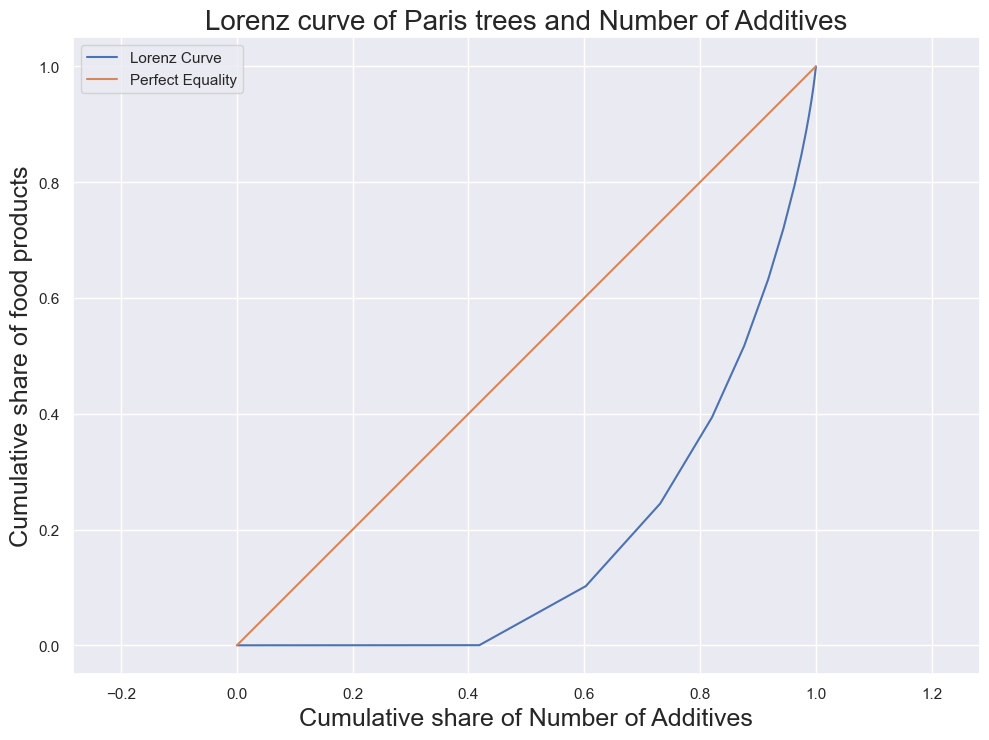

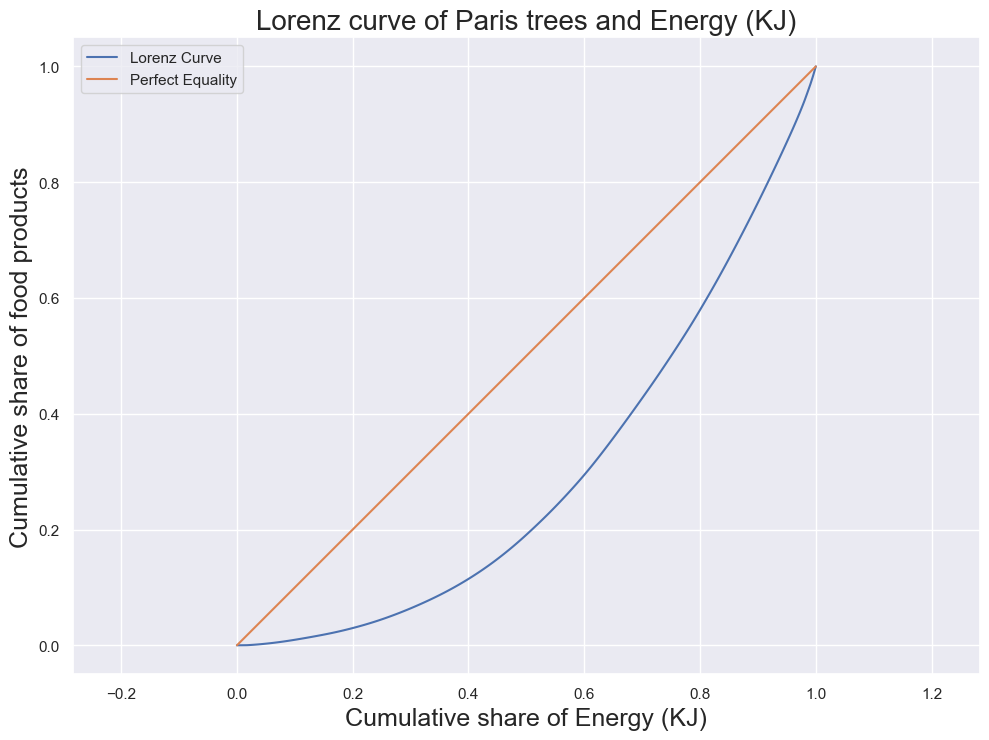

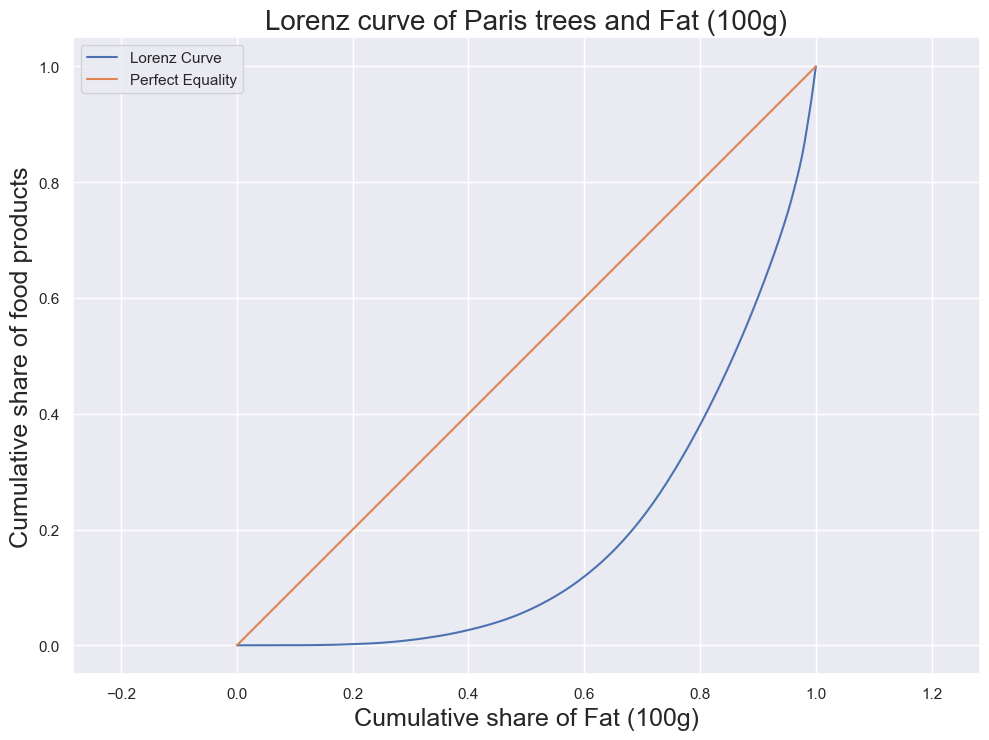

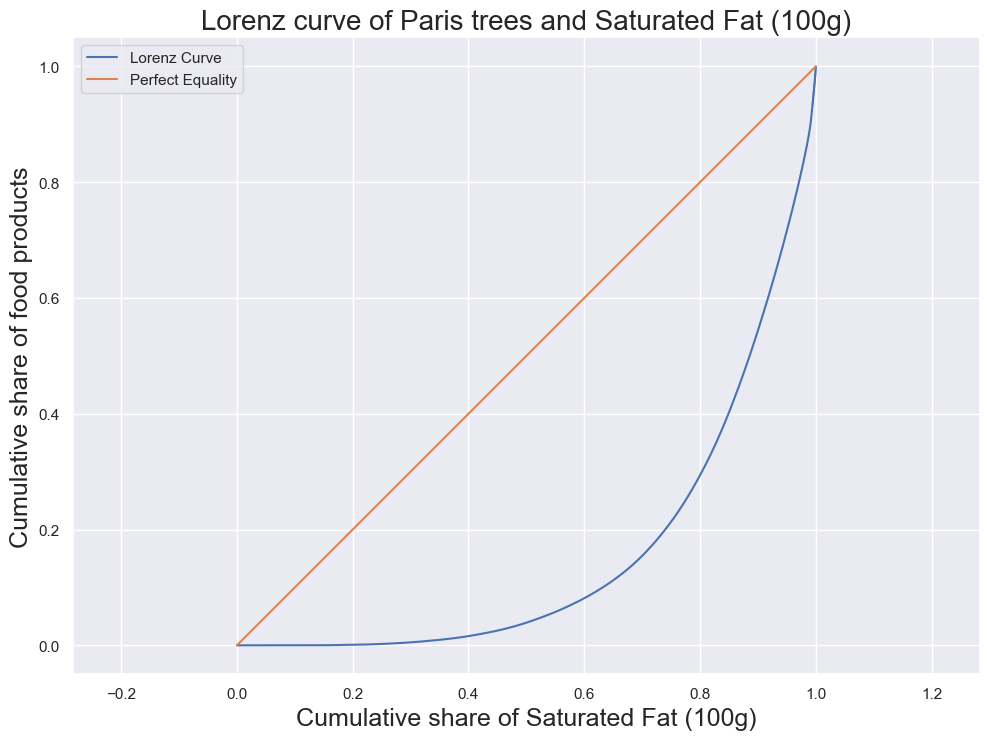

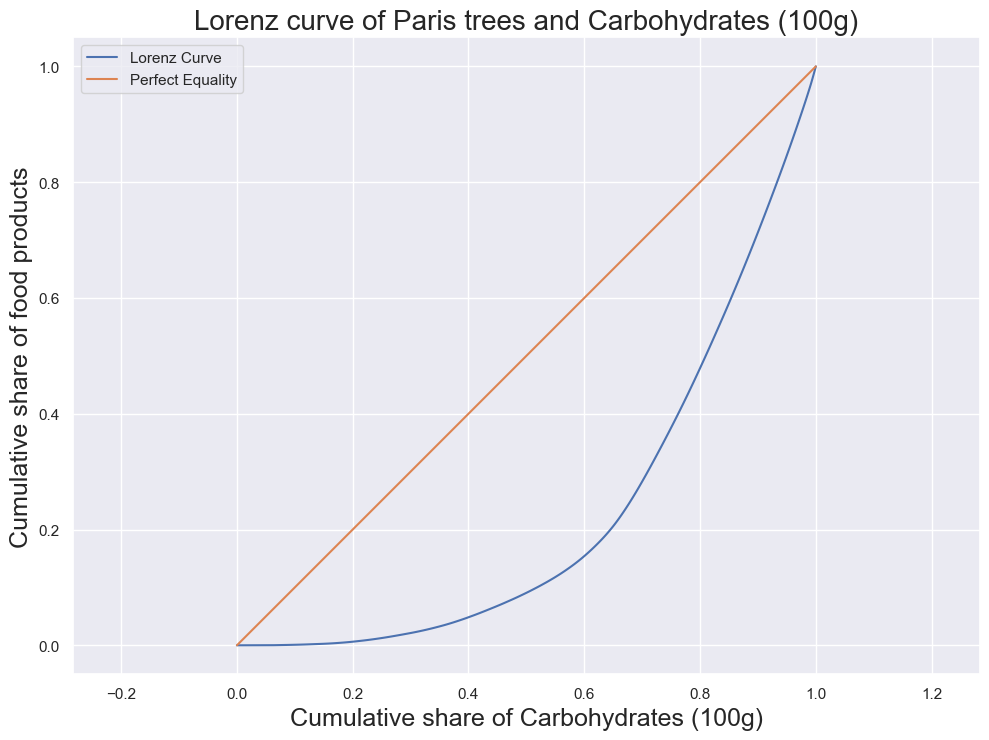

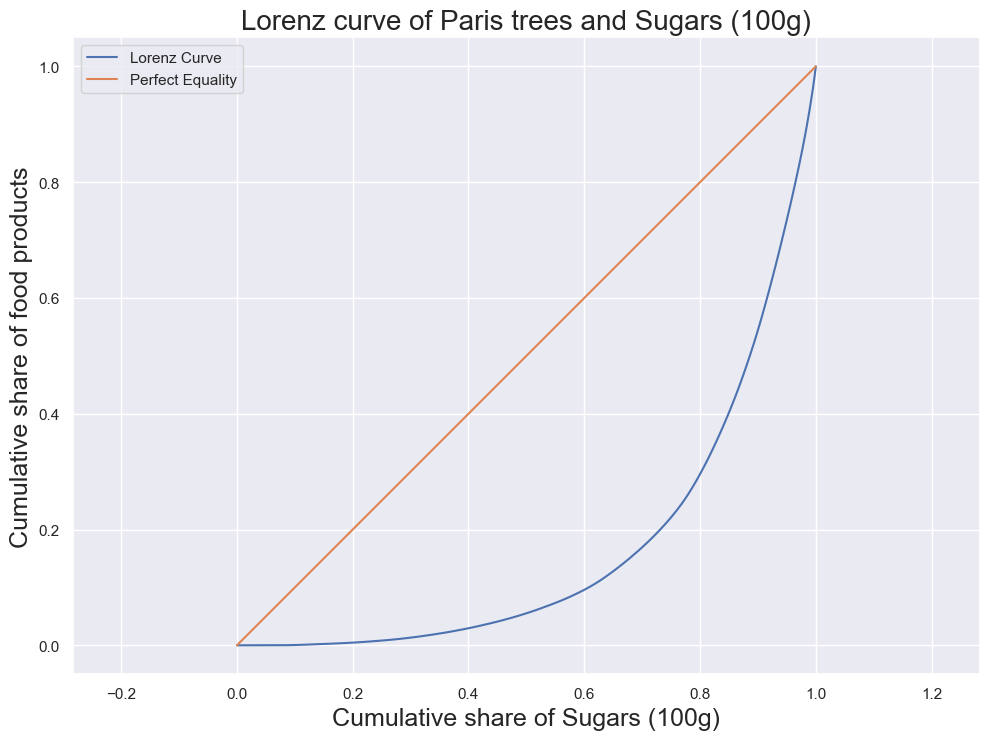

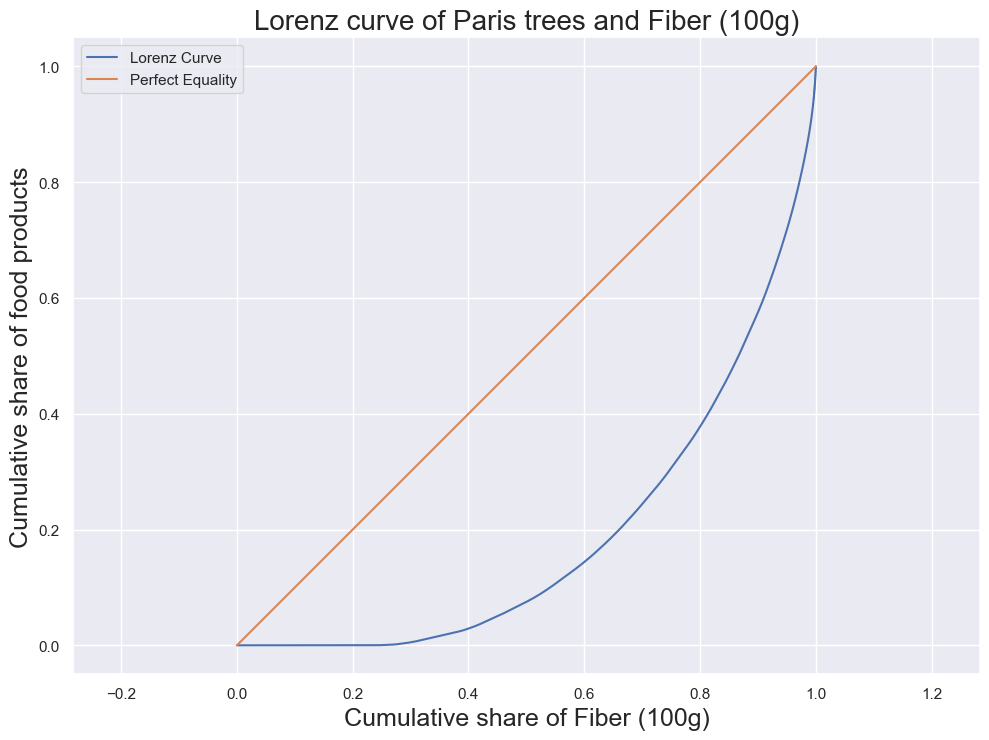

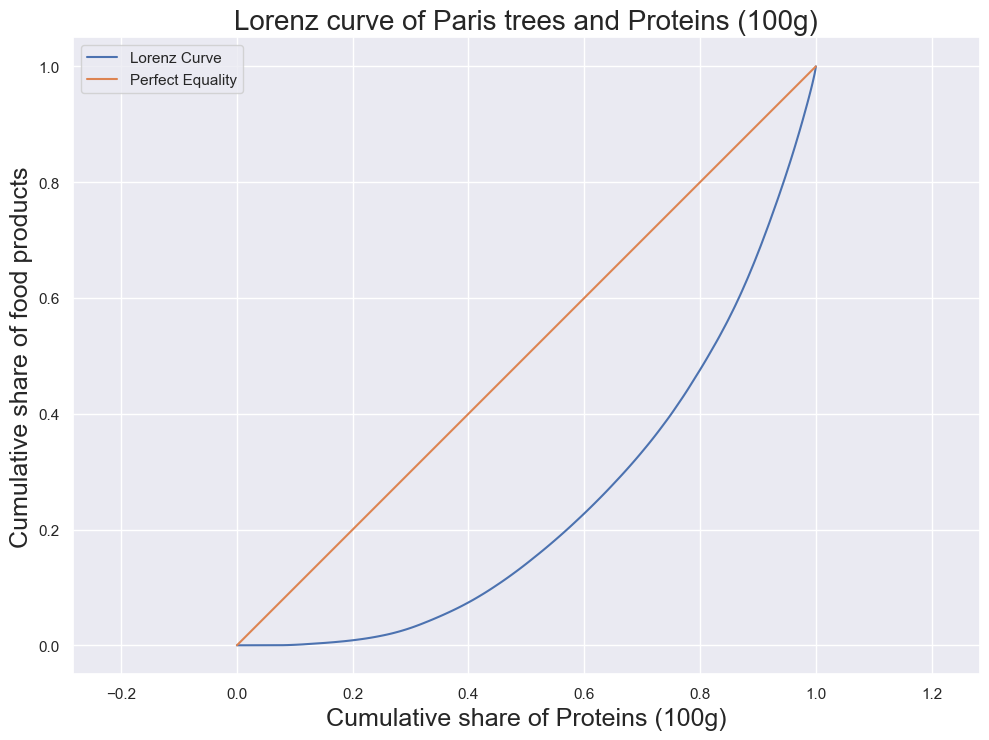

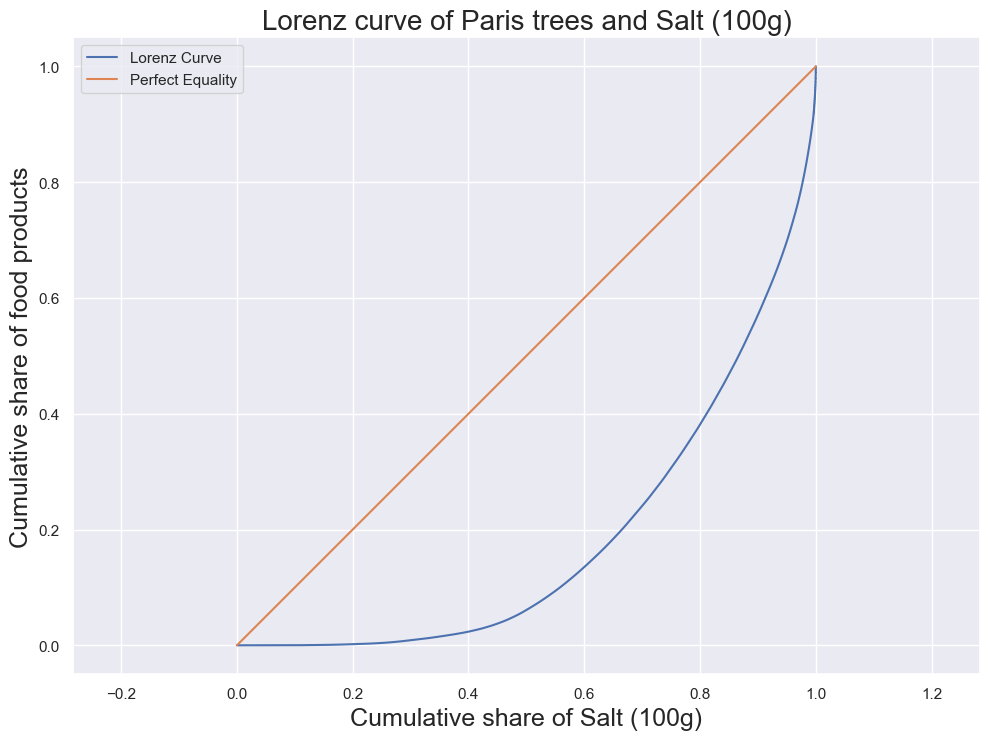

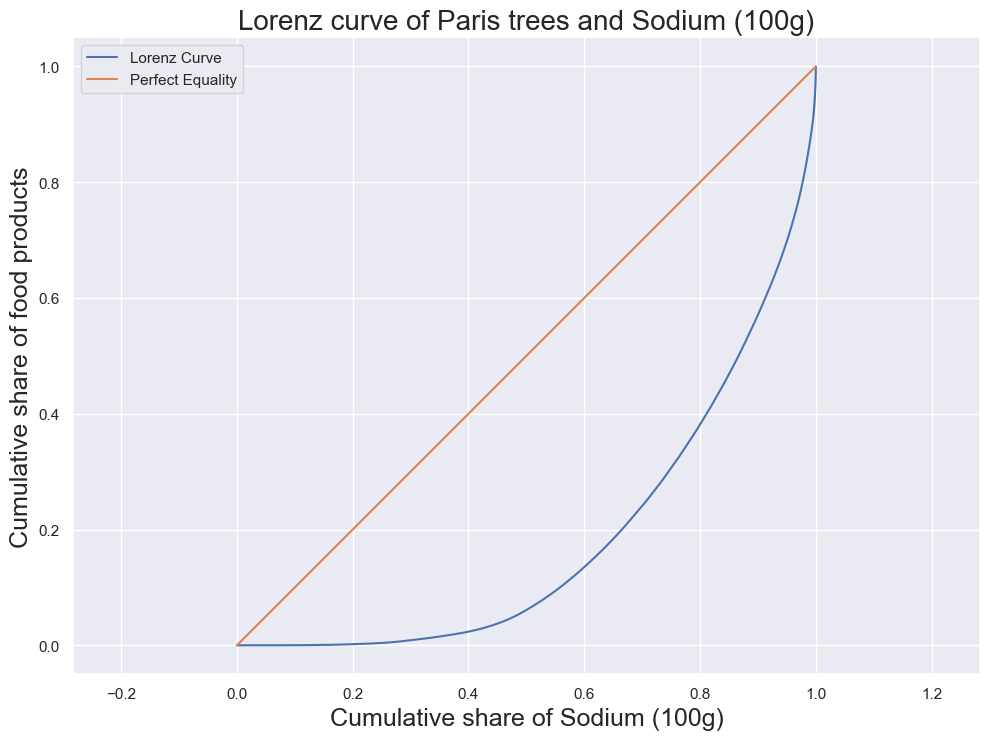

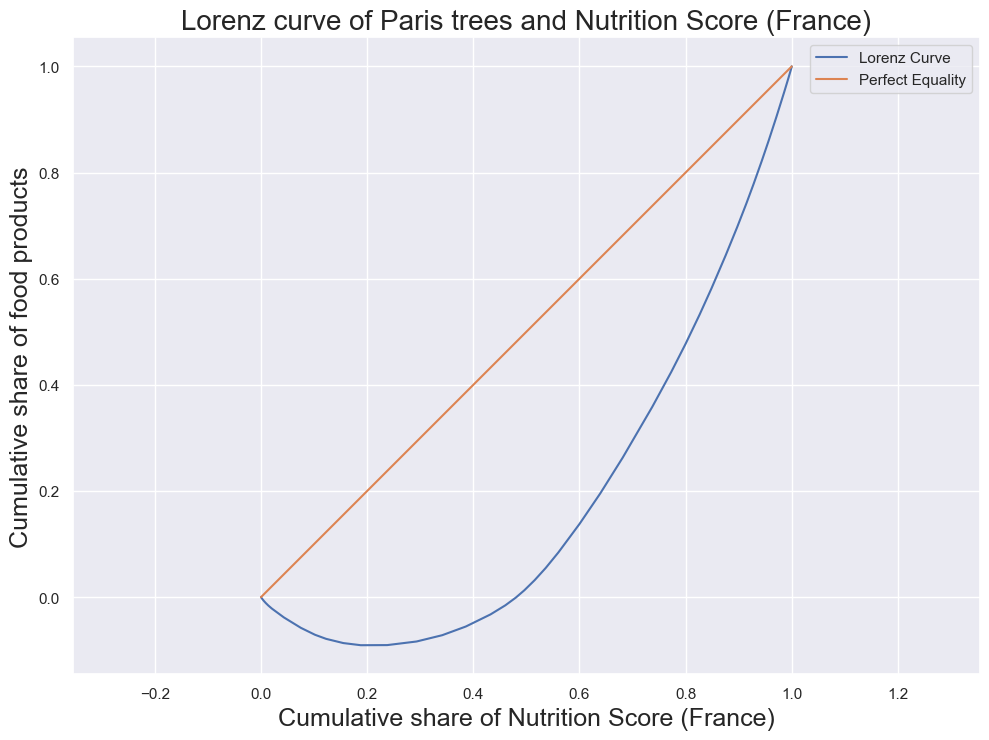

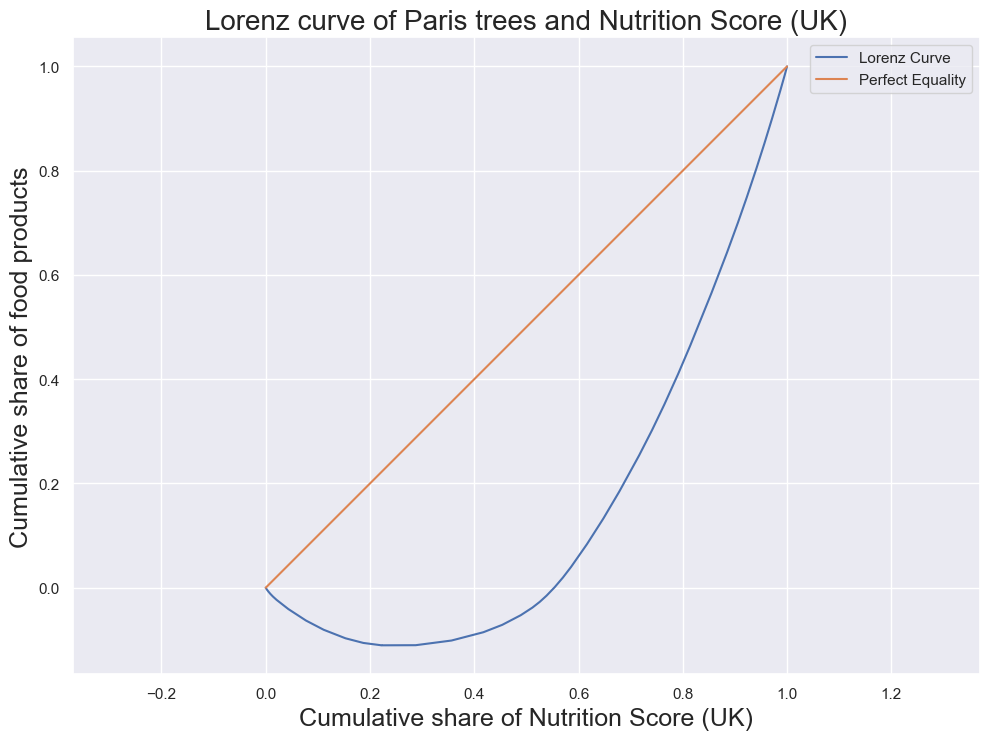

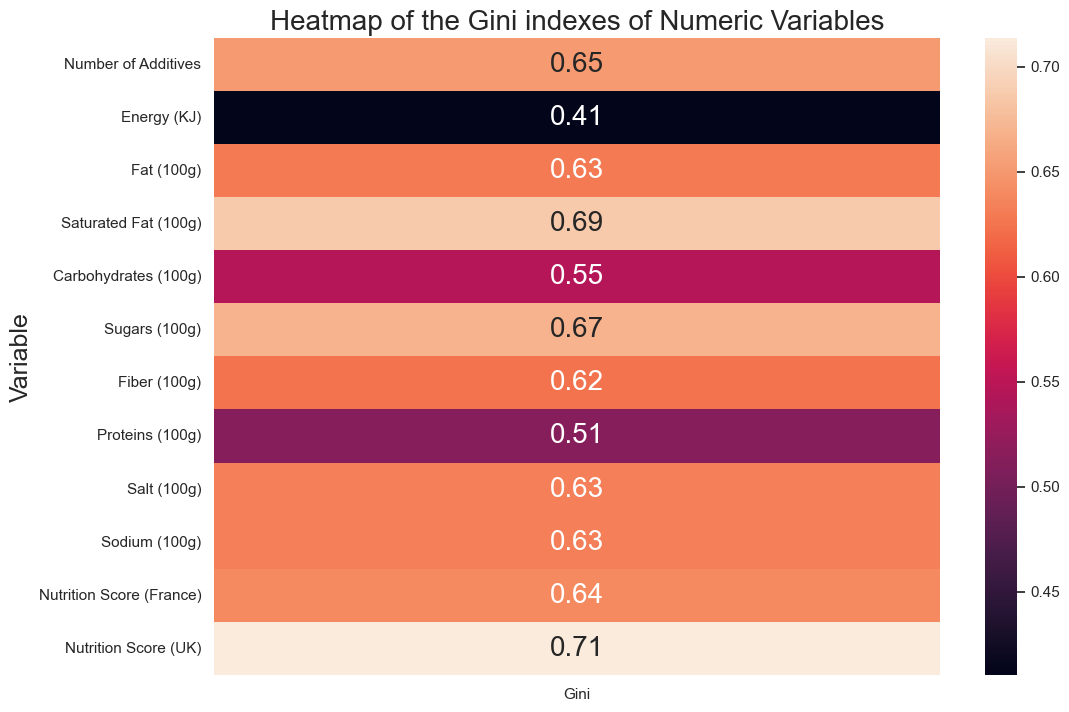

Gini
Variable                          
Number of Additives       0.651364
Energy (KJ)               0.410340
Fat (100g)                0.628853
Saturated Fat (100g)      0.687174
Carbohydrates (100g)      0.546491
Sugars (100g)             0.669040
Fiber (100g)              0.624377
Proteins (100g)           0.513177
Salt (100g)               0.632823
Sodium (100g)             0.632810
Nutrition Score (France)  0.639554
Nutrition Score (UK)      0.713588

In [37]:
def concentration_lorenz(df: pd.DataFrame, labels: dict):
    sum_table = []
    for c in df.columns:
        if (df[c].dtype == float) | (df[c].dtype == int):
            #Only applying the function to columns with more than 10 different values
            if len(df[c].unique()) > 10:
                #Creating a subset
                subset = df[c].dropna().values
                n = len(subset)
                lorenz = np.cumsum(np.sort(subset)) / subset.sum()
                lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0
                plt.axis('equal')
                xaxis = np.linspace(0-1/n,1+1/n,n+1) 
                # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. 
                #The first segment starts at 0-1/n and the last one finishes at 1+1/n
                plt.plot(xaxis,lorenz,drawstyle='steps-post', label = 'Lorenz Curve')
                plt.plot(xaxis,xaxis, label = 'Perfect Equality')
                plt.title("Lorenz curve of Paris trees and {}".format(labels[c]))
                plt.xlabel("Cumulative share of {}".format(labels[c]))
                plt.ylabel("Cumulative share of food products")
                plt.legend()
                plt.show()

                AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
                # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. 
                #We do the same for the mast segment lorenz[-1]
                S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
                gini = 2*S # Calculation of the gini coefficient
                sum_table.append({'Variable': labels[c], 'Gini': gini})
    sum_table = pd.DataFrame(sum_table).set_index('Variable')
    sns.heatmap(sum_table, annot=True)
    plt.title("Heatmap of the Gini indexes of Numeric Variables")
    plt.show()
    return sum_table

concentration_lorenz(df, labels)

**Conclusion:** We can see that the Gini indexes are quite high for all variables except Energy. In all of these cases, this means that there is an **unequal concentration of these variables**. 

### 2.2 Analysis of categorical variables

Before doing any analysis on our categorical variables, we will create our nutri score grades that go from A to E.
The details for our caluculation is outlined in this image : https://get.apicbase.com/wp-content/uploads/2020/08/Nutri-Score-overview-1024x539.png, what is important to outline is that we have to separate beverages from solid food.

#### 2.2.1 Creating Nutrition Score Grades

Before doing anything we will rename the nutrition score columns to make them more easy to access and then transform them into categorical variables.

In [54]:
#Now we can create our NUTRI-SCOREs (grading system)

def calc_nutri_score(score, is_solid: bool):
    #Creating grading table
    #Rounding scores because our reference table only takes round numbers
    score = round(score)
    if is_solid == True:
        if score <= -1:
            return 'A'
        elif score <= 2:
            return'B'
        elif score <= 10:
            return 'C'
        elif score <= 18:
            return 'D'
        else:
            return 'E'
    else:
        if score == 0:
            return 'A'
        elif score <= 1:
            return 'B'
        elif score <= 5:
            return 'C'
        elif score <= 9:
            return 'D'
        else:
            return 'E'
        
df.loc[df['food_cat'] != 'Beverages','nut_score_fr'] = df['score_fr'].apply(lambda x: calc_nutri_score(x, True))
df.loc[df['food_cat'] == 'Beverages','nut_score_fr'] = df['score_fr'].apply(lambda x: calc_nutri_score(x, False))
df.loc[df['food_cat'] != 'Beverages','nut_score_uk'] = df['score_uk'].apply(lambda x: calc_nutri_score(x, True))
df.loc[df['food_cat'] == 'Beverages','nut_score_uk'] = df['score_uk'].apply(lambda x: calc_nutri_score(x, False))

#Updating our labels dictionnary
labels.update({'nut_score_fr': 'Nutrition Score Grade (FR)', 'nut_score_uk': 'Nutrition Score Grade (UK)'})

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54115 entries, 174 to 320763
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   product_name                             54115 non-null  object 
 1   countries                                54083 non-null  object 
 2   additives_n                              54115 non-null  float64
 3   ingredients_from_palm_oil_n              54115 non-null  float64
 4   ingredients_that_may_be_from_palm_oil_n  54115 non-null  float64
 5   food_cat                                 54115 non-null  object 
 6   food_type                                54115 non-null  object 
 7   energy                                   54115 non-null  float64
 8   fat                                      54115 non-null  float64
 9   saturated-fat                            54115 non-null  float64
 10  carb                                     54

#### 2.2.2 Repartition 

We will now study the repartition of categorical variables. We will create pie charts when we can reduce the variables to less than 10 categories and otherwise we will plot the top 5 most frequent classes.

In [49]:
df.food_type.dtype == str

False

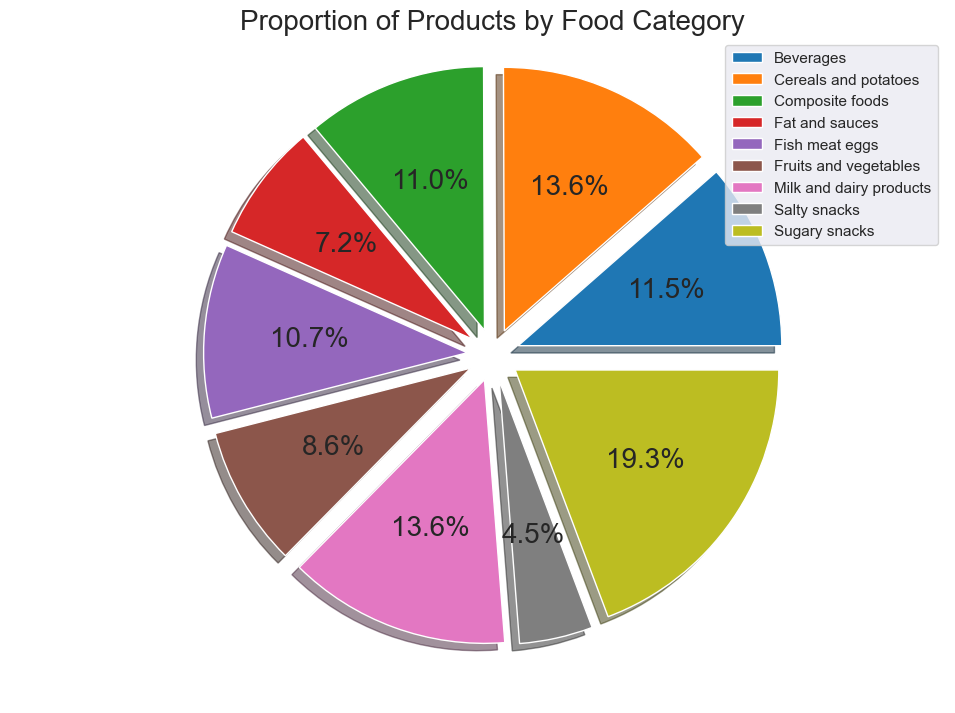

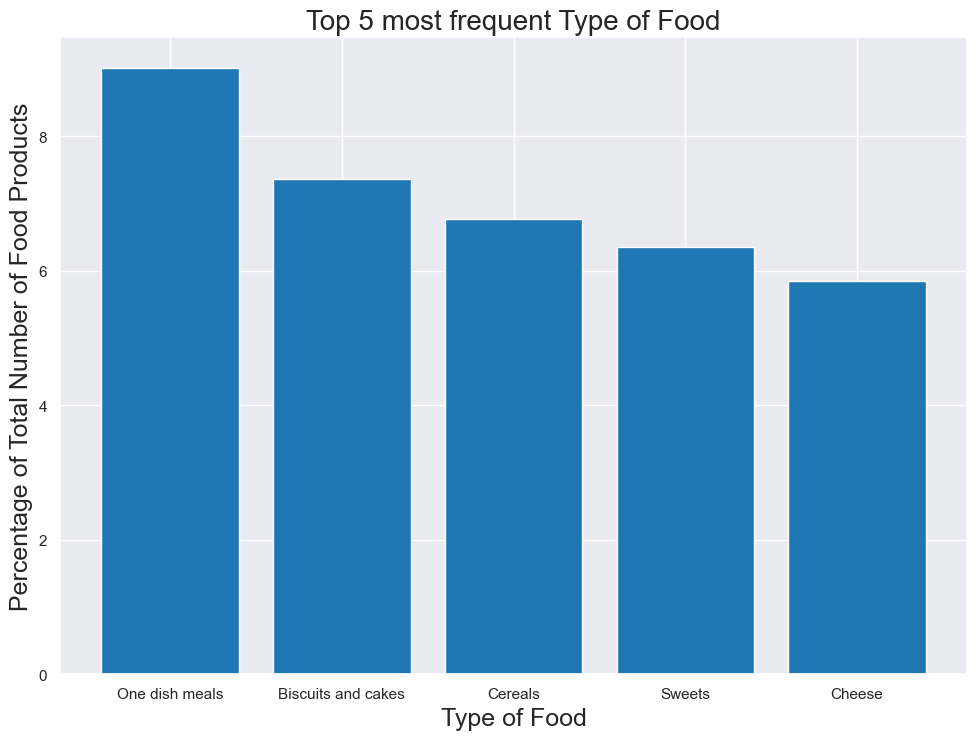

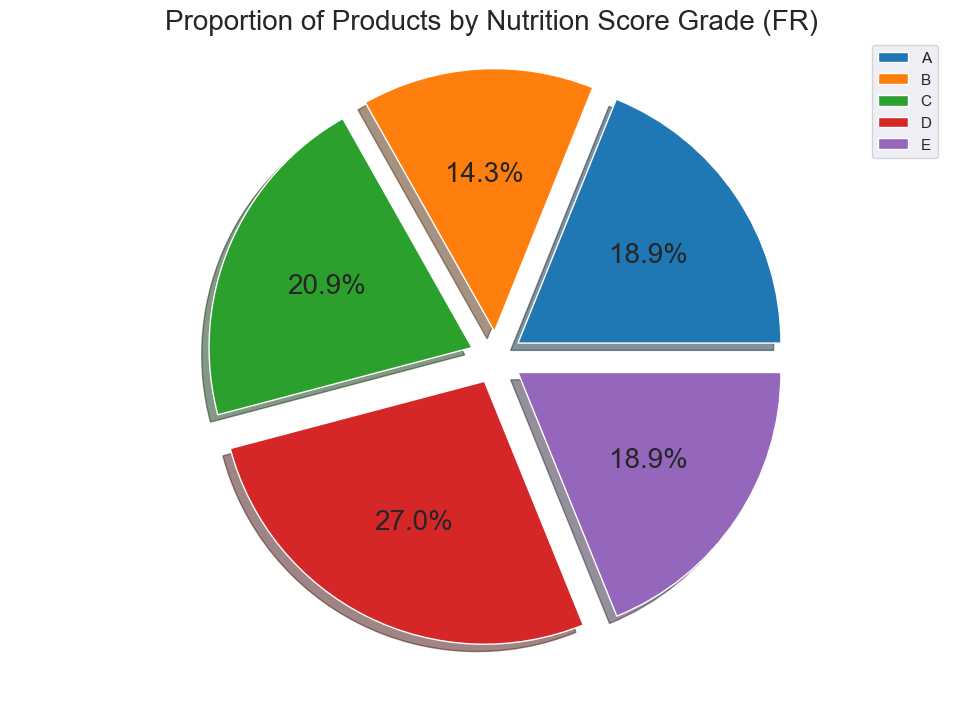

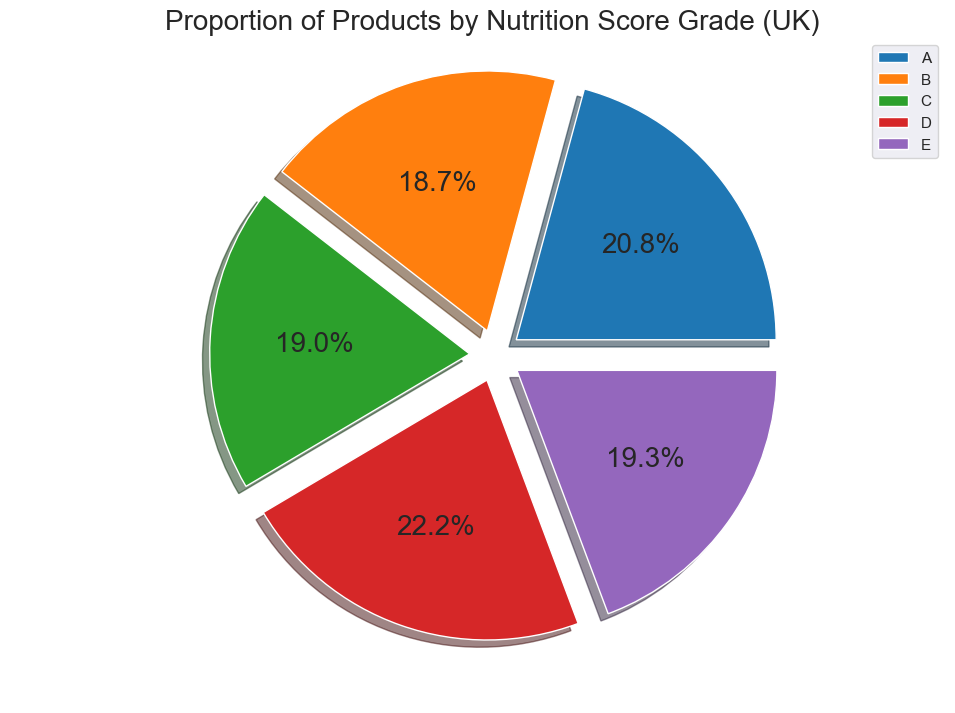

In [73]:
#Setting seaborn palette
sns.set_palette("tab10")

def category_analysis(df: pd.DataFrame, labels: dict):
    for c in df.columns:
        #Filtering and selecting only categorical variables
        if (df[c].dtype == 'object') | (df[c].dtype == str):
            #Filtering only categorical fields (less than 50 different values)
            if len(df[c].unique()) < 50:
                #Creating a Series with the percentage of each values
                subset = df[c].value_counts(normalize=True).sort_index()
                #Replacing values < 2% by an "Other" category aggregation
                for s in subset:
                    if s < 0.02:
                        label = subset[subset==s].index[0]
                        subset.drop(labels=[label],inplace=True)

                other_count = 1 - subset.sum()
                if other_count != 0:
                    subset["Other"] = other_count
                #Filtering variables with less than 10 categories to plot pie chart
                if len(subset) <= 10: 

                    #Creating exploding pie array
                    expl = [0.1]*len(subset)
                    subset.plot.pie(autopct='%1.1f%%', shadow=True, labeldistance=None, explode=expl)
                    plt.title('Proportion of Products by {}'.format(labels[c]))
                    plt.axis('equal')
                    plt.ylabel(" ")
                    plt.xlabel(" ")
                    plt.legend()
                    plt.show()
                    print()
                #For categories between 10 and 50 categories, we will plot the top 5 most frequent categories
                else: 
                    #Grouping by the variable chosen and counting the values, we use domain as our count variable since it is complete
                    top_5 = df[[c]].groupby(c).agg(count = (c, 'count')).reset_index().sort_values(by='count', ascending=False)
                    #Calculating percentage
                    n = len(df)
                    top_5["pct"] = round(top_5["count"]*100/n,2)
                    top_5 = top_5.head(5)
                    plt.bar(top_5[c], top_5["pct"])
                    plt.title("Top 5 most frequent {}".format(labels[c]))
                    plt.xlabel(labels[c])
                    plt.ylabel("Percentage of Total Number of Food Products")
                    plt.show()
                    print()


category_analysis(df, labels)

### 2.3 Bivariate analysis

#### 2.3.1 Correlation between 2 numerical variables

First we will run the .corr() function on our dataframe to create a heatmap of correlated (numerical) fields.

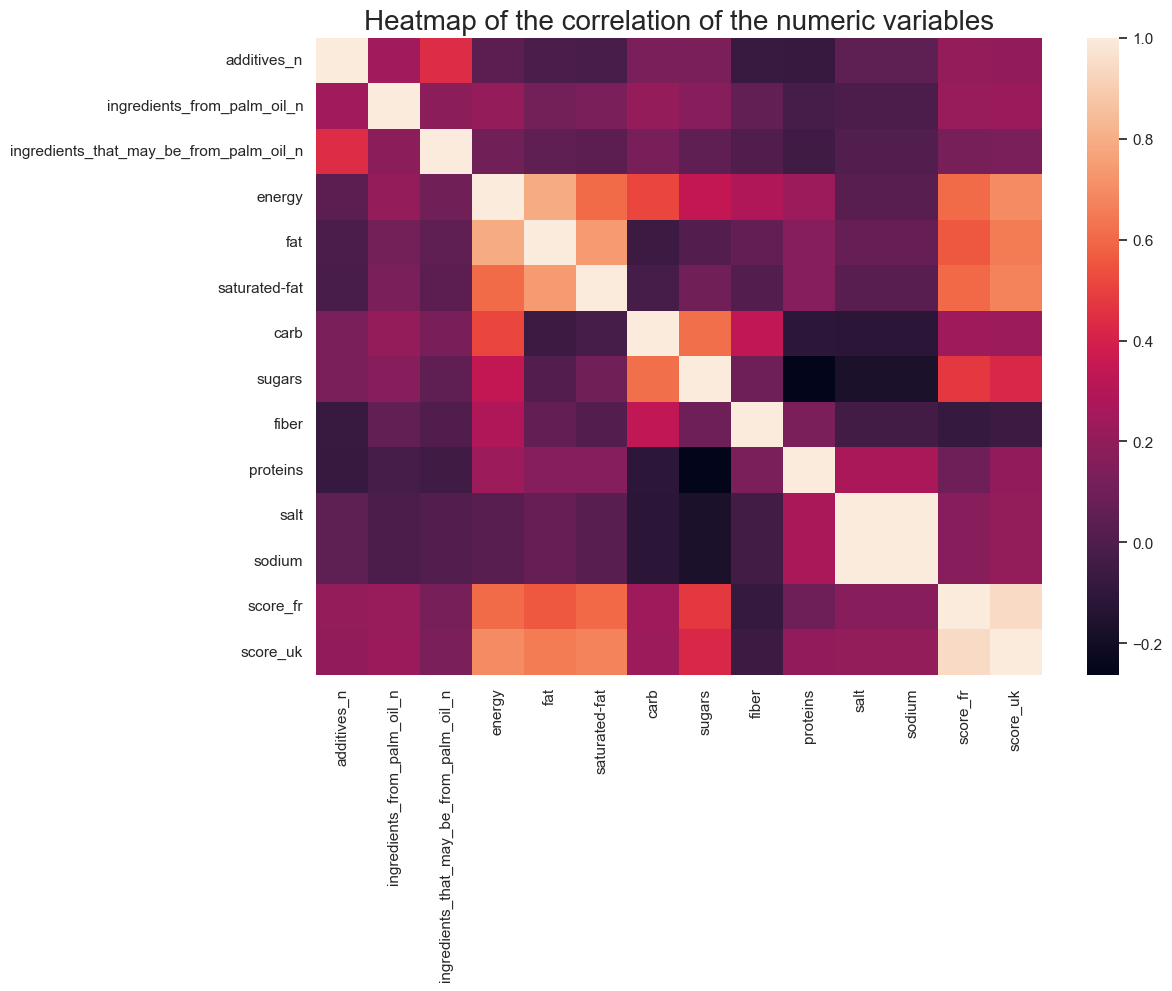

Strong correlation between Energy (KJ) and Fat (100g): R = 0.79
Moderate Correlation between Energy (KJ) and Saturated Fat (100g): R = 0.61
Moderate Correlation between Energy (KJ) and Carbohydrates (100g): R = 0.52
Moderate Correlation between Energy (KJ) and Nutrition Score (FR - numeric): R = 0.61
Moderate Correlation between Energy (KJ) and Nutrition Score (UK - numeric): R = 0.7
Strong correlation between Fat (100g) and Saturated Fat (100g): R = 0.74
Moderate Correlation between Fat (100g) and Nutrition Score (FR - numeric): R = 0.56
Moderate Correlation between Fat (100g) and Nutrition Score (UK - numeric): R = 0.65
Moderate Correlation between Saturated Fat (100g) and Nutrition Score (FR - numeric): R = 0.6
Moderate Correlation between Saturated Fat (100g) and Nutrition Score (UK - numeric): R = 0.67
Moderate Correlation between Carbohydrates (100g) and Sugars (100g): R = 0.62
Strong correlation between Salt (100g) and Sodium (100g): R = 1.0
Strong correlation between Nutrition 

In [80]:
#Importing statistical functions
import scipy.stats as st

#Defining a function to define correlation
def correlation(r):
    if abs(r) > 1: return 'Correlation wrongly calculated, cannot be > 1'
    elif abs(r) > 0.7: return 'Strong correlation'  
    elif abs(r) > 0.5: return 'Moderate Correlation' 
    elif abs(r) > 0.3: return 'Weak correlation' 
    else: return 'No significant correlation' 

def num_correlation(df: pd.DataFrame, labels: dict):
    #Plotting heatmap of the correlation of each numeric variable
    sns.heatmap(df.corr())
    plt.title("Heatmap of the correlation of the numeric variables")
    plt.show()
    
    columns = []
    for c in df.columns:
        #Iterating over all numeric variables and creating a list of numeric columns
         if (df[c].dtype == float) | (df[c].dtype == int):
                columns.append(c)
                
    #Iterating over each combination of this list    
    for comb in combinations(columns,2):
        r = round(st.pearsonr(df[comb[0]],df[comb[1]])[0],2)
        if abs(r) > 0.5:
            #Manually calculating each coefficient and printing variable that are at least moderately correlated
            print("{} between {} and {}: R = {}".format(correlation(r), labels[comb[0]], labels[comb[1]], r))

num_correlation(df, labels)

#### 2.3.2 Correlation between 2 categorical variables
    

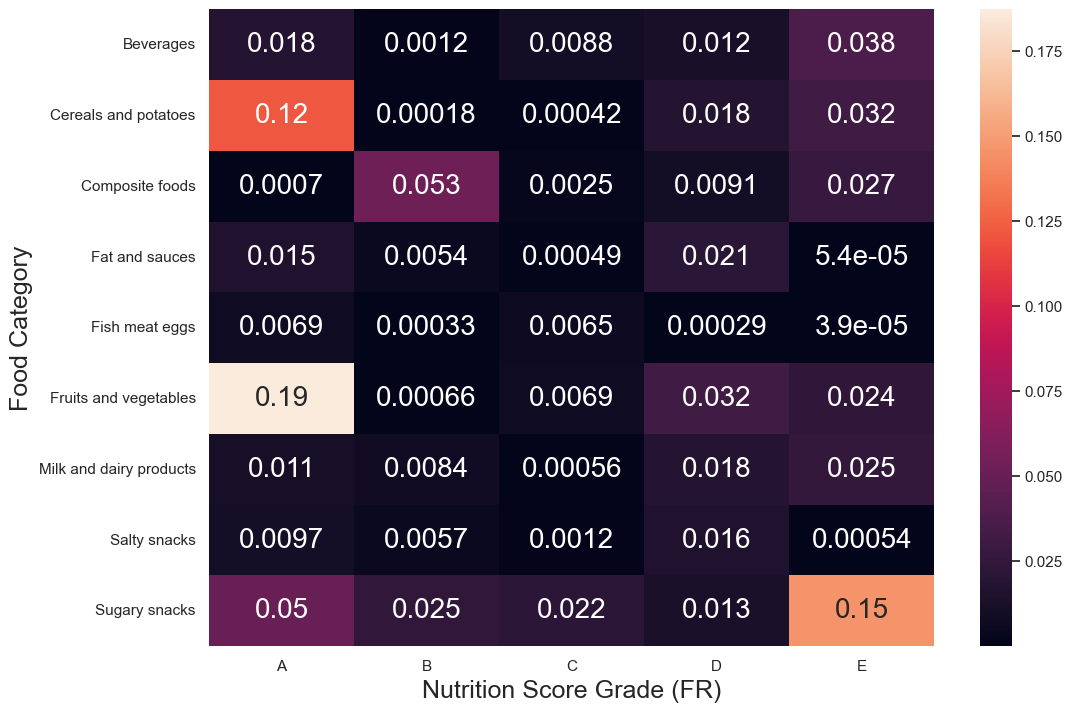

Moderate association between Food Category and Nutrition Score Grade (FR). Cramer's V = 0.37


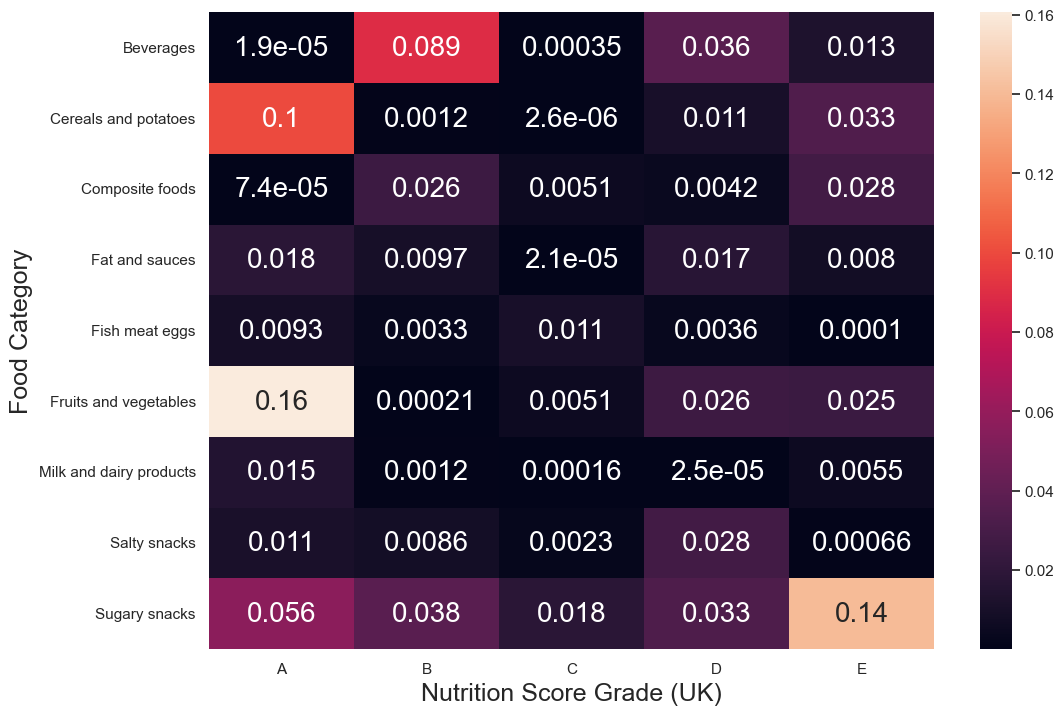

Moderate association between Food Category and Nutrition Score Grade (UK). Cramer's V = 0.37


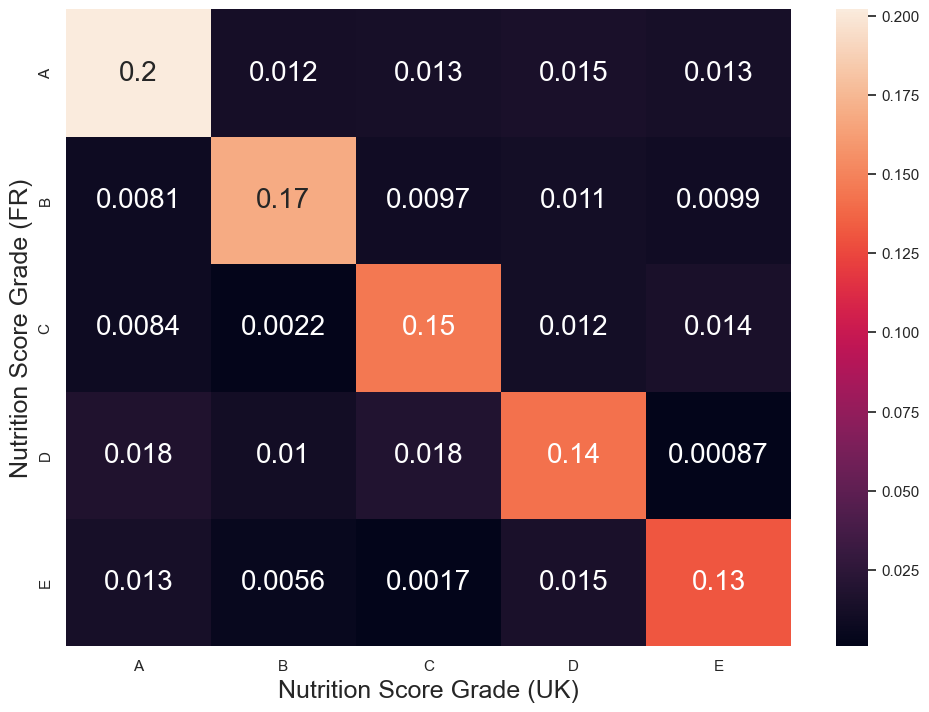

High association between Nutrition Score Grade (FR) and Nutrition Score Grade (UK). Cramer's V = 0.75


Variable 1                  Variable 2  Cramer's V
2  Nutrition Score Grade (FR)  Nutrition Score Grade (UK)    0.747691
0               Food Category  Nutrition Score Grade (FR)    0.368213
1               Food Category  Nutrition Score Grade (UK)    0.365656

In [84]:
#Defining a function to define association between 2 categorical variables
def association(r):
    if abs(r) > 1: return 'Association wrongly calculated, cannot be > 1'
    elif abs(r) > 0.5: return 'High association'  
    elif abs(r) > 0.3: return 'Moderate association' 
    elif abs(r) > 0.1: return 'Low association' 
    else: return 'Little if any association' 


from scipy.stats import chi2_contingency

#Calculating chi² and contingency table for each categorical variable with <= 10 fields
def cat_correlation(df: pd.DataFrame, labels: dict):
    columns = []
    sum_table = []
    for c in df.columns:
        #Iterating over all columns and creating a list of categorical varibles with length <= 10
        if ((df[c].dtype == 'object') | (df[c].dtype == str)) & (len(df[c].unique()) <= 10):
                columns.append(c)        
    #Iterating over each combination of this list    
    for comb in combinations(columns,2):
        #Creating a subset of our dataset where both categories are not NA
        subset = df.loc[(~df[comb[0]].isna()) & (~df[comb[1]].isna())]
        X = comb[0]
        Y = comb[1]
        #Inverting labels because we will pivot the table
        xlabel = labels[comb[1]]
        ylabel = labels[comb[0]]
        pivot = subset[[X,Y]].pivot_table(index=X,columns=Y, aggfunc=len, margins=True,
                                   margins_name="Total")
        tx = pivot.loc[:,["Total"]]
        ty = pivot.loc[["Total"],:]
        n = len(df)
        #Here n will be the total number of observations
        indep = tx.dot(ty) / n

        clean = pivot.fillna(0) # Null values are replaced by 0
        #Creating heatmap
        measure = (clean-indep)**2/indep
        #Calculating xi²
        xi_n = measure.sum().sum()
        table = measure/xi_n
        sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1])
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.show()
        #Calculating Cramer's V
        minimum_dimension = min(table.shape)-1
        v = np.sqrt((xi_n/n) / minimum_dimension)
        sum_table.append({'Variable 1': labels[comb[0]], 'Variable 2': labels[comb[1]], "Cramer's V": v})
        if abs(v) > 0.3:
            print("{} between {} and {}. Cramer's V = {:.2f}".format(association(v), labels[comb[0]],labels[comb[1]],v))
    return pd.DataFrame(sum_table).sort_values(by="Cramer's V", ascending=False)

cat_correlation(df,labels)

#### 2.3.3 Using ANOVA to calculate the correlation between categorical and numeric variables

We will calculate the eta_squared coefficient by performing ANOVA on subsets created from a categorical and a numeric variables in our dataset.

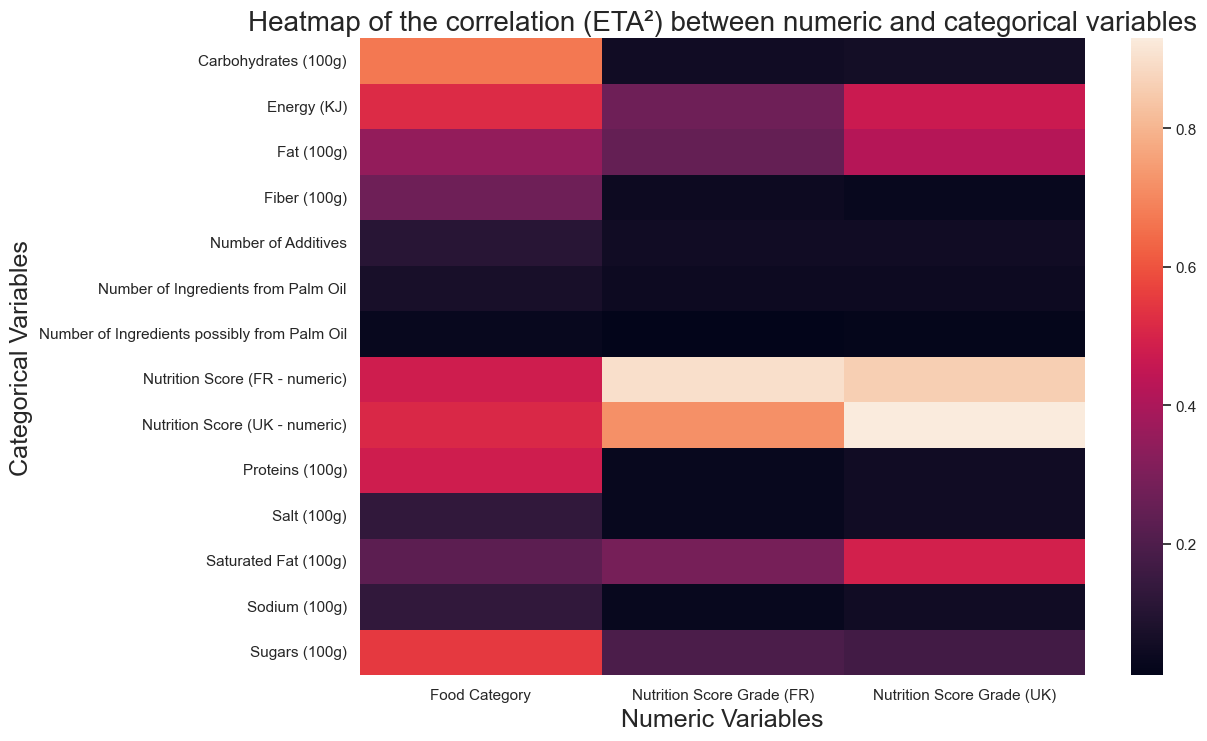

Numeric Variable                          Categorical Variable  \
41  Nutrition Score Grade (UK)                Nutrition Score (UK - numeric)   
26  Nutrition Score Grade (FR)                Nutrition Score (FR - numeric)   
40  Nutrition Score Grade (UK)                Nutrition Score (FR - numeric)   
27  Nutrition Score Grade (FR)                Nutrition Score (UK - numeric)   
6                Food Category                          Carbohydrates (100g)   
7                Food Category                                 Sugars (100g)   
3                Food Category                                   Energy (KJ)   
13               Food Category                Nutrition Score (UK - numeric)   
33  Nutrition Score Grade (UK)                          Saturated Fat (100g)   
12               Food Category                Nutrition Score (FR - numeric)   
9                Food Category                               Proteins (100g)   
31  Nutrition Score Grade (UK)                                   Energy (KJ)   
32  Nutrition Score Grade (UK)                                    Fat (100g)   
4                Food Category                                    Fat (100g)   
19  Nutrition Score Grade (FR)                          Saturated Fat (100g)   
8                Food Category                                  Fiber (100g)   
17  Nutrition Score Grade (FR)                                   Energy (KJ)   
18  Nutrition Score Grade (FR)                                    Fat (100g)   
5                Food Category                          Saturated Fat (100g)   
21  Nutrition Score Grade (FR)                                 Sugars (100g)   
35  Nutrition Score Grade (UK)                                 Sugars (100g)   
10               Food Category                                   Salt (100g)   
11               Food Category                                 Sodium (100g)   
0                Food Category                           Number of Additives   
1                Food Category           Number of Ingredients from Palm Oil   
34  Nutrition Score Grade (UK)                          Carbohydrates (100g)   
39  Nutrition Score Grade (UK)                                 Sodium (100g)   
38  Nutrition Score Grade (UK)                                   Salt (100g)   
37  Nutrition Score Grade (UK)                               Proteins (100g)   
20  Nutrition Score Grade (FR)                          Carbohydrates (100g)   
28  Nutrition Score Grade (UK)                           Number of Additives   
14  Nutrition Score Grade (FR)                           Number of Additives   
29  Nutrition Score Grade (UK)           Number of Ingredients from Palm Oil   
15  Nutrition Score Grade (FR)           Number of Ingredients from Palm Oil   
22  Nutrition Score Grade (FR)                                  Fiber (100g)   
25  Nutrition Score Grade (FR)                                 Sodium (100g)   
36  Nutrition Score Grade (UK)                                  Fiber (100g)   
24  Nutrition Score Grade (FR)                                   Salt (100g)   
23  Nutrition Score Grade (FR)                               Proteins (100g)   
2                Food Category  Number of Ingredients possibly from Palm Oil   
30  Nutrition Score Grade (UK)  Number of Ingredients possibly from Palm Oil   
16  Nutrition Score Grade (FR)  Number of Ingredients possibly from Palm Oil   

    ETA Squared  
41         0.93  
26         0.90  
40         0.86  
27         0.72  
6          0.67  
7          0.55  
3          0.52  
13         0.51  
33         0.49  
12         0.48  
9          0.48  
31         0.47  
32         0.42  
4          0.35  
19         0.29  
8          0.27  
17         0.27  
18         0.25  
5          0.23  
21         0.19  
35         0.17  
10         0.13  
11         0.13  
0          0.11  
1          0.07  
34         0.06  
39         0.05  
38         0.05  
37         0.05  
20         0.05  
28         0.05

In [111]:
#Importing itertools product
import itertools

#Defining eta_squared
def eta_squared(x,y):
    mean_y = y.mean()
    categories = []
    for category in x.unique():
        yi_category = y[x==category]
        categories.append({'ni': len(yi_category),
                        'mean_category': yi_category.mean()})
    TSS = sum([(yj-mean_y)**2 for yj in y])
    ESS = sum([c['ni']*(c['mean_category']-mean_y)**2 for c in categories])
    return ESS/TSS


arr = []
#Defining a function to calculate the eta squared of all pairs of numeric and categorical variables and return a heatmap
def mixed_correlation(df: pd.DataFrame, labels: dict):
    num_col = []
    cat_col = []
    for c in df.columns:
        #Iterating over all columns and creating a list of categorical varibles with length <= 10
        if ((df[c].dtype == 'object') | (df[c].dtype == str)) & (len(df[c].unique()) <= 10):
            num_col.append(c)
        
        #Creating list of numeric variables
        elif (df[c].dtype == float) | (df[c].dtype == int):
            cat_col.append(c)
    
    #Defining the combinations between our 2 lists: 
    combinations = list(itertools.product(num_col,cat_col))
    
    sum_table = []
    #Iterating over each combinations
    for comb in combinations:
        #Creating a subset of our dataset where both categories are not NA
        subset = df.loc[(~df[comb[0]].isna()) & (~df[comb[1]].isna())]
        #Calculating eta squared
        eta_2 = round(eta_squared(subset[comb[0]], subset[comb[1]]),2)
        sum_table.append({'Numeric Variable': labels[comb[0]], 'Categorical Variable': labels[comb[1]], 'ETA Squared': eta_2})
    
    sum_table = pd.DataFrame(sum_table)
    heat_map = pd.pivot_table(data=sum_table, columns='Numeric Variable', index='Categorical Variable', values='ETA Squared')
    g = sns.heatmap(heat_map)
    plt.yticks(rotation=0)
    plt.xlabel("Numeric Variables")
    plt.ylabel("Categorical Variables")
    plt.title("Heatmap of the correlation (ETA²) between numeric and categorical variables")
    plt.show()
    
    return sum_table.sort_values(by='ETA Squared', ascending=False)


mixed_correlation(df, labels)

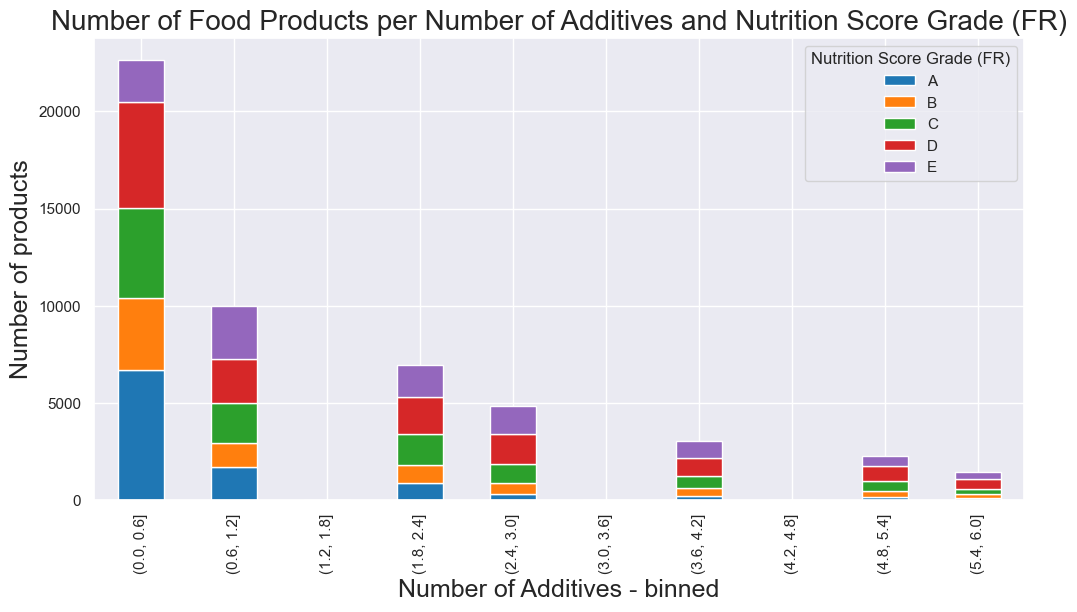

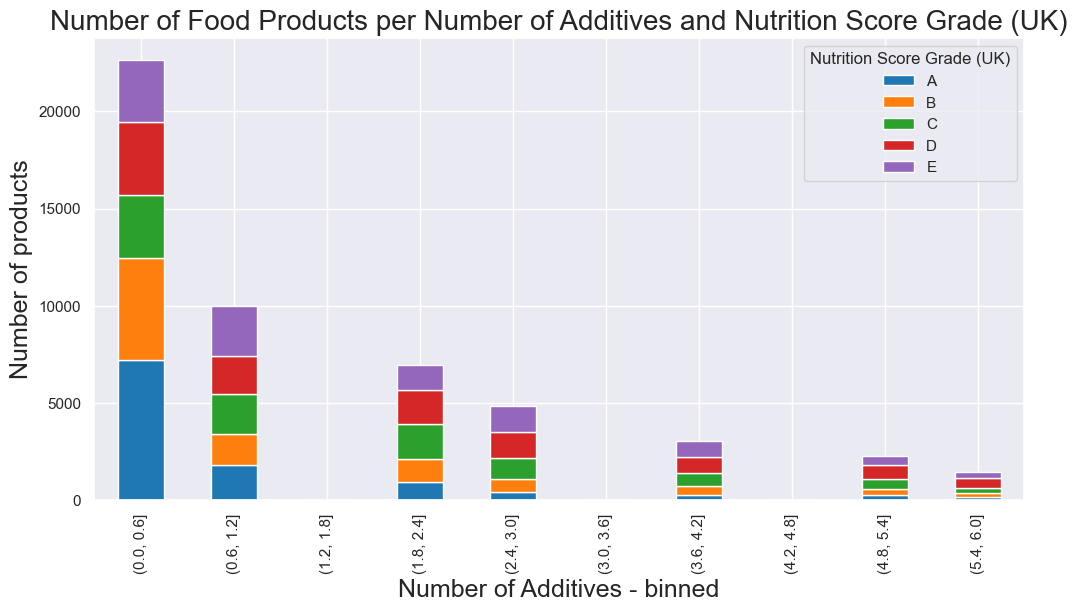

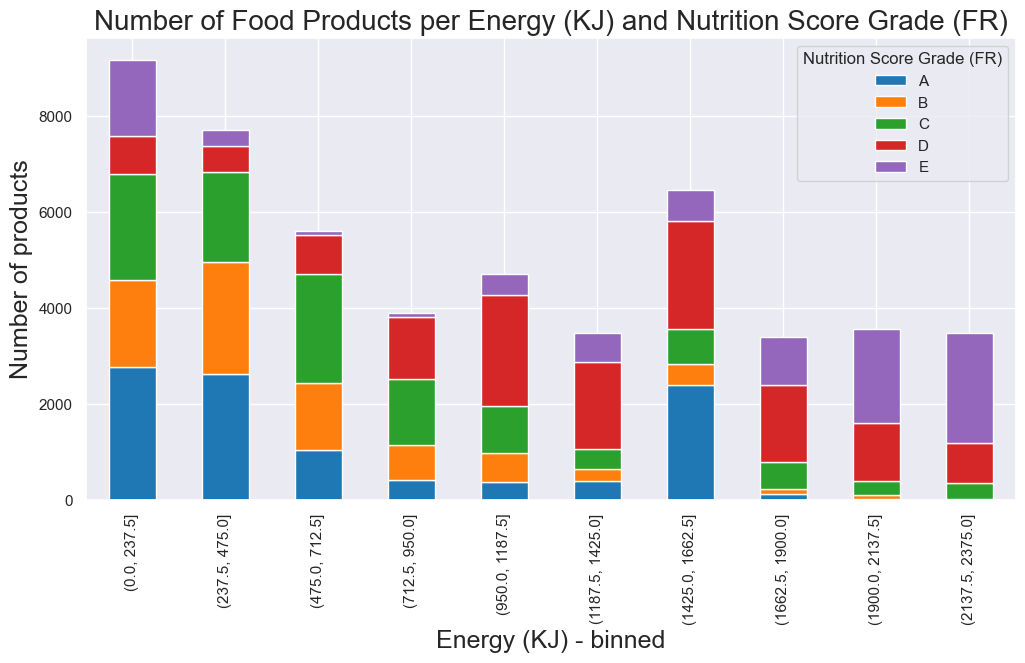

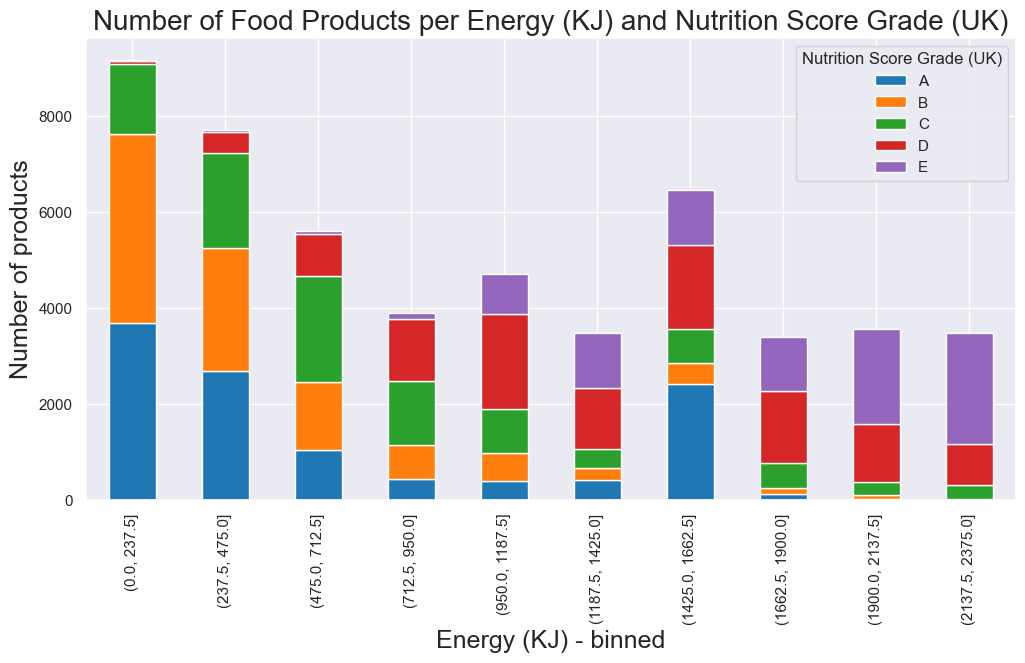

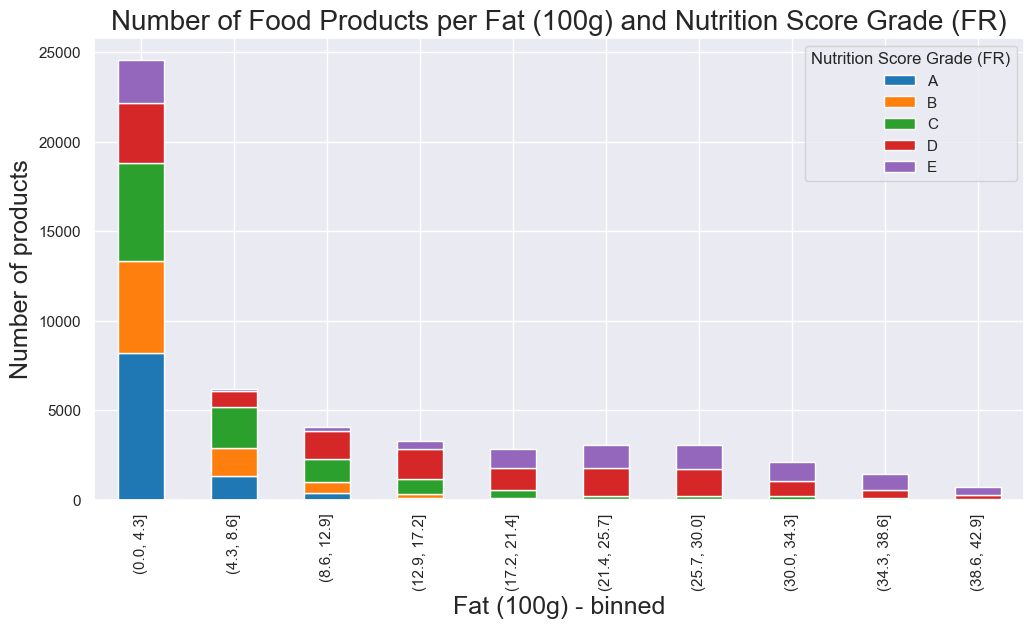

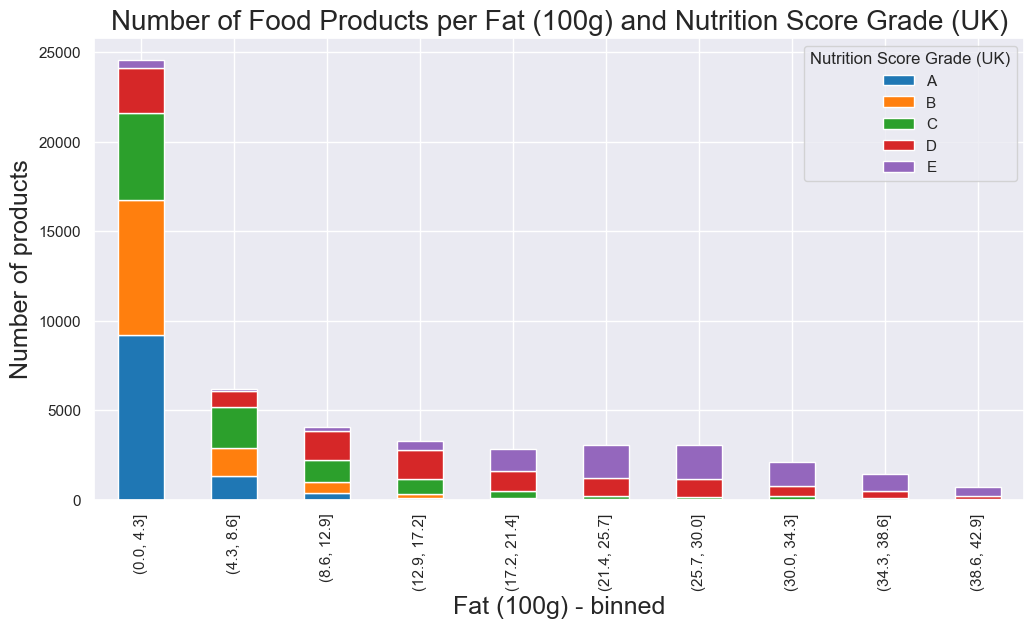

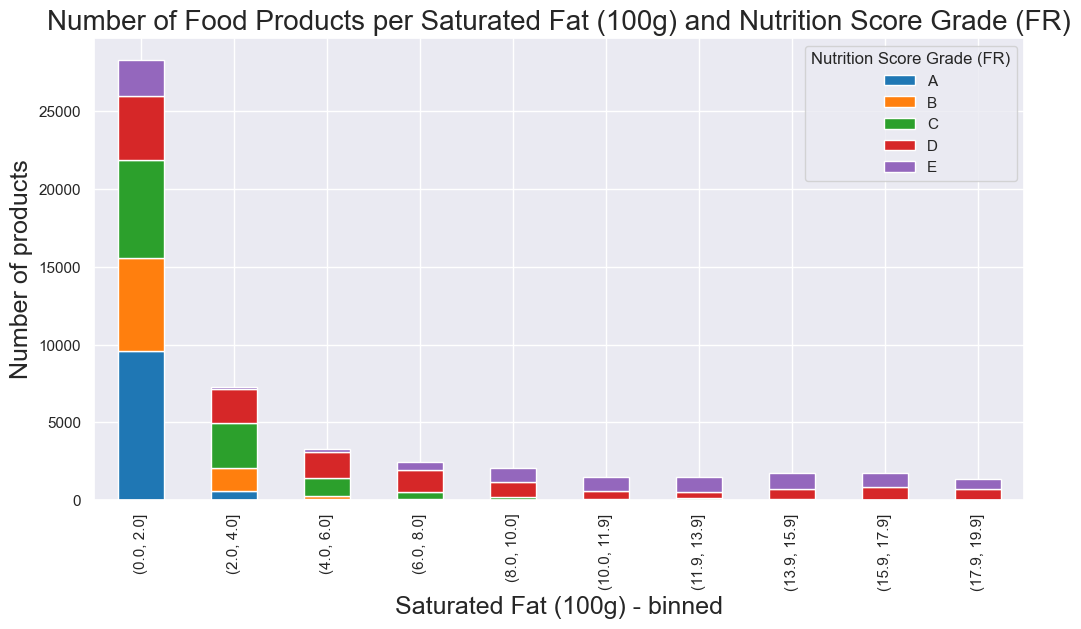

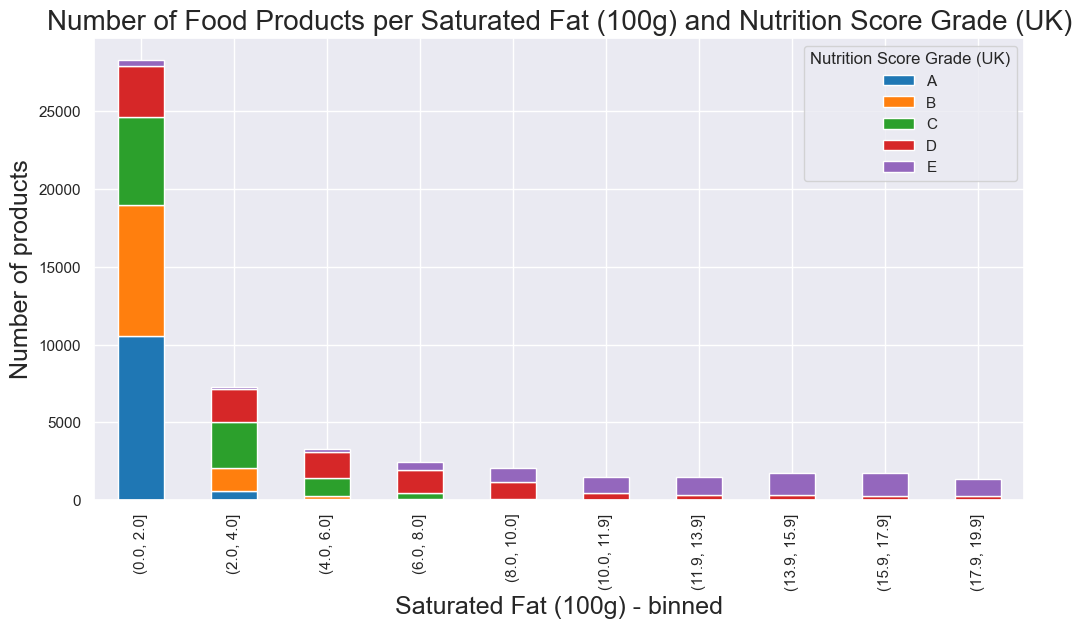

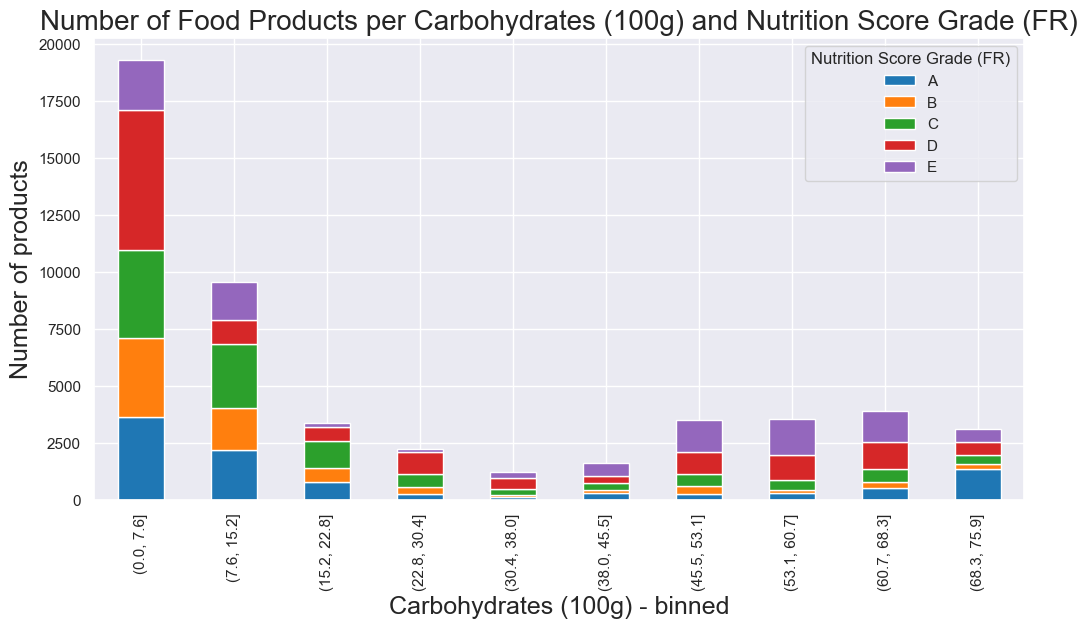

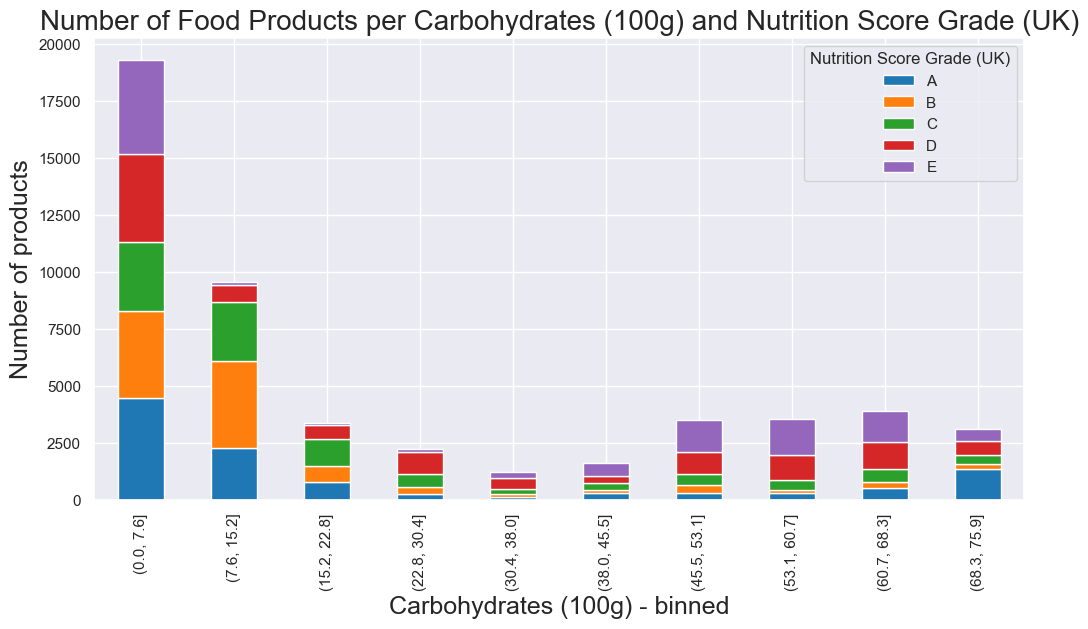

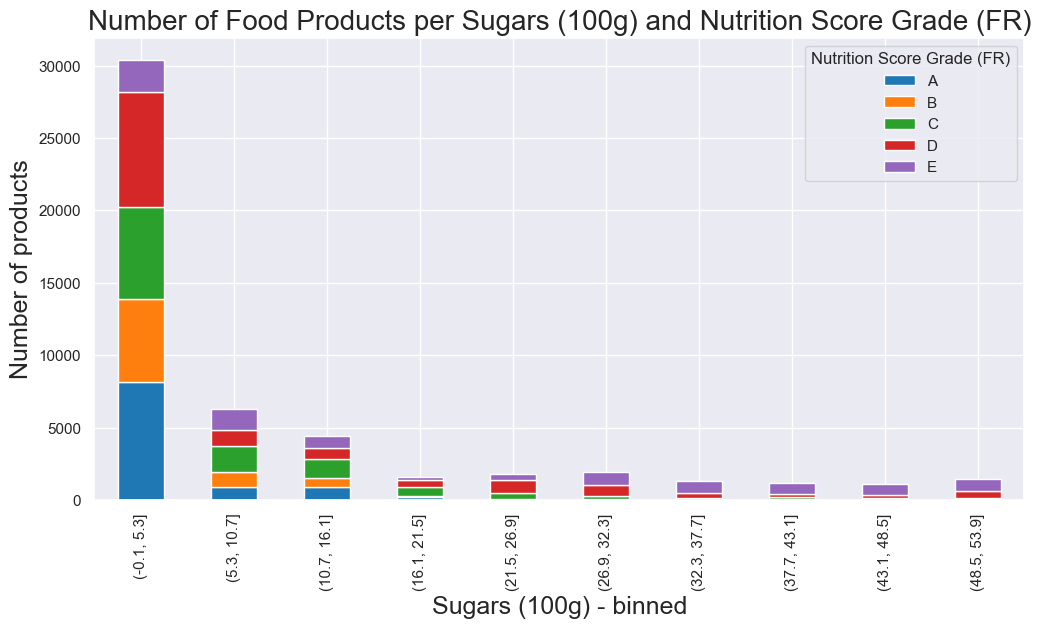

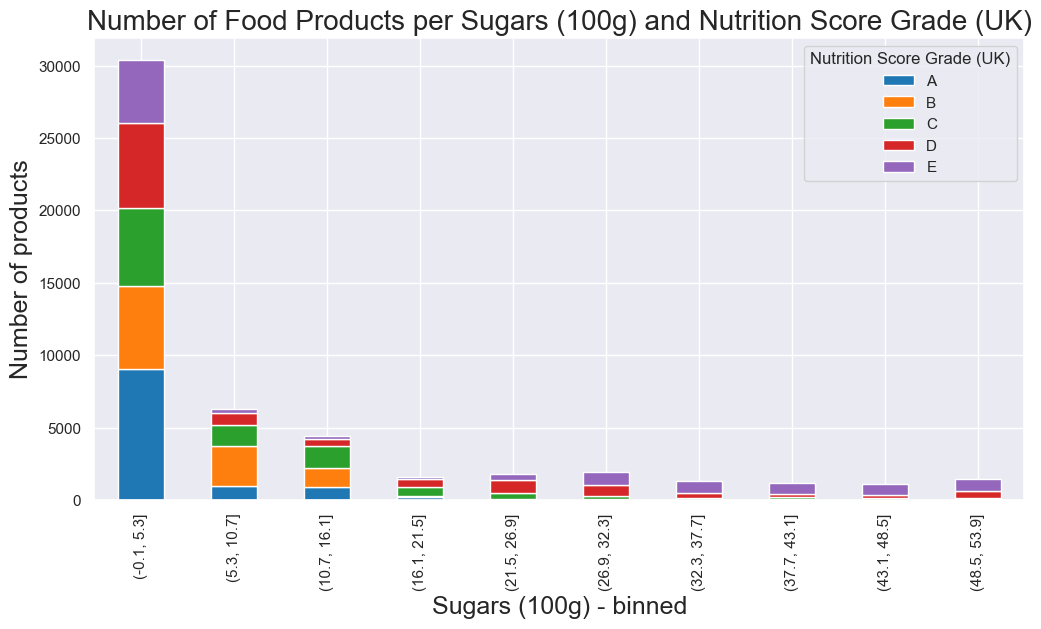

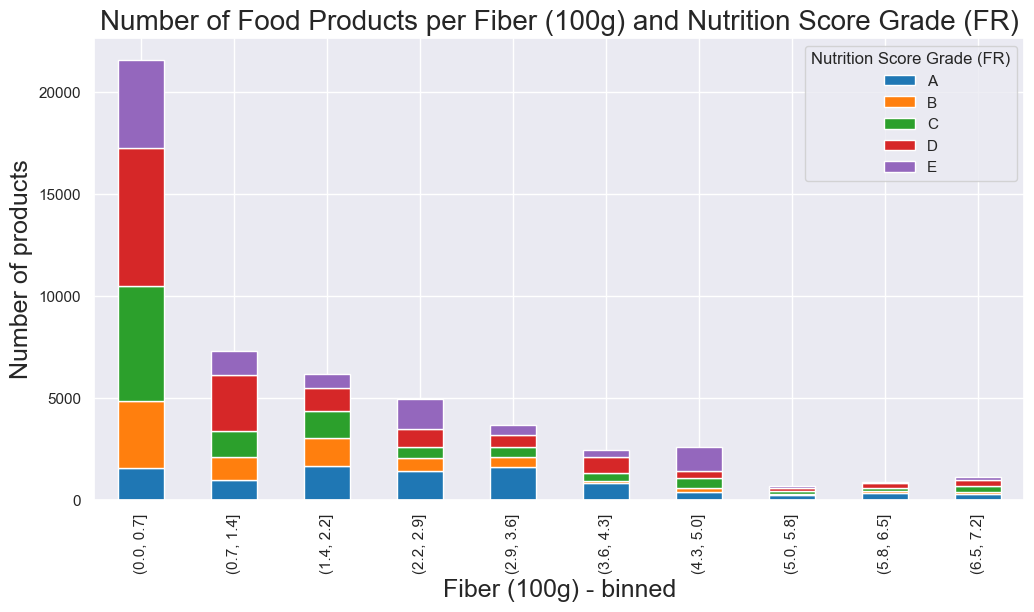

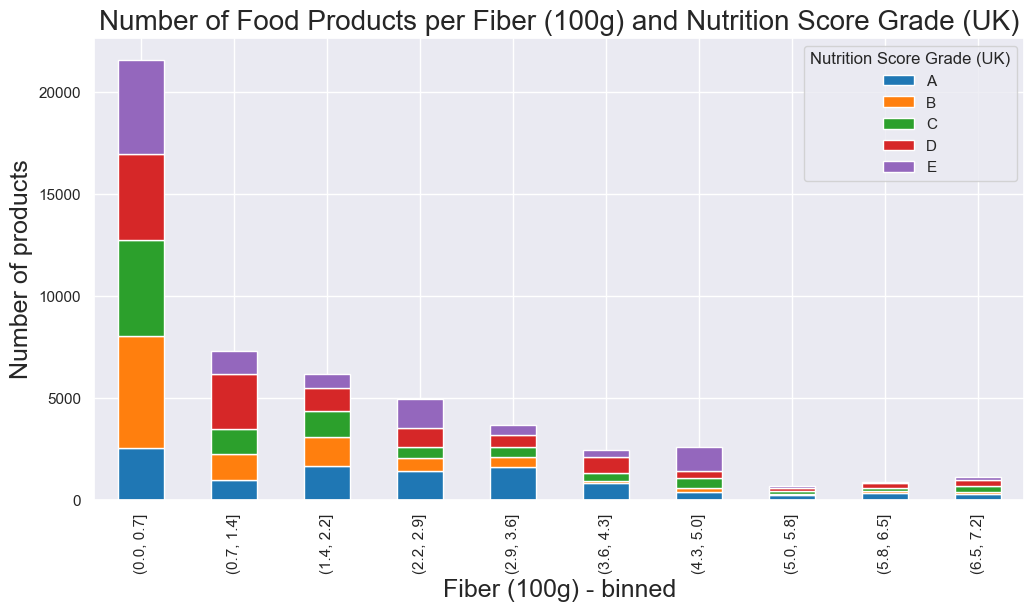

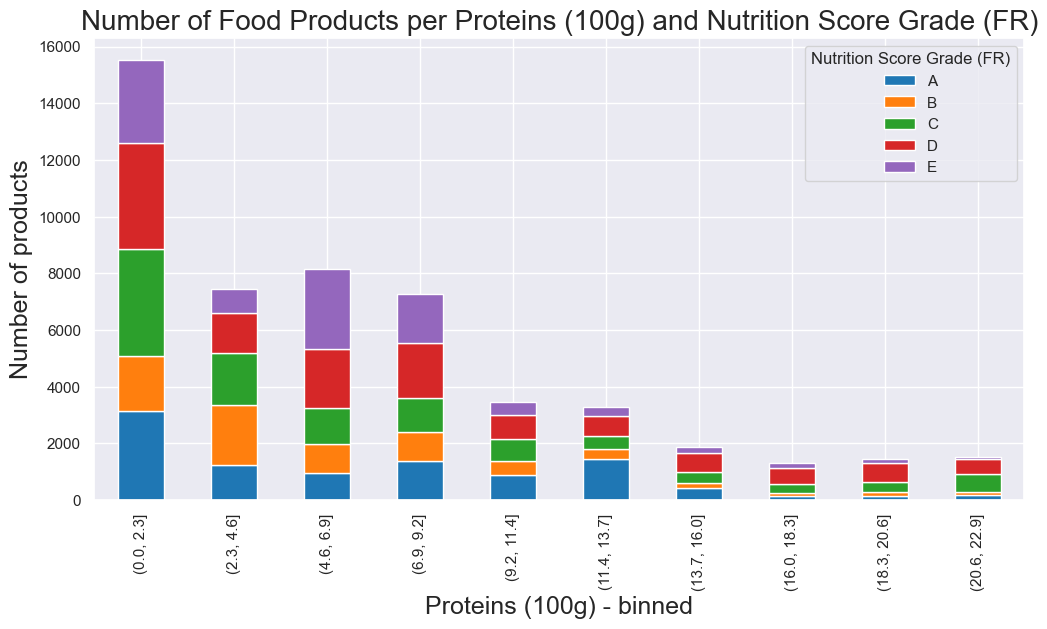

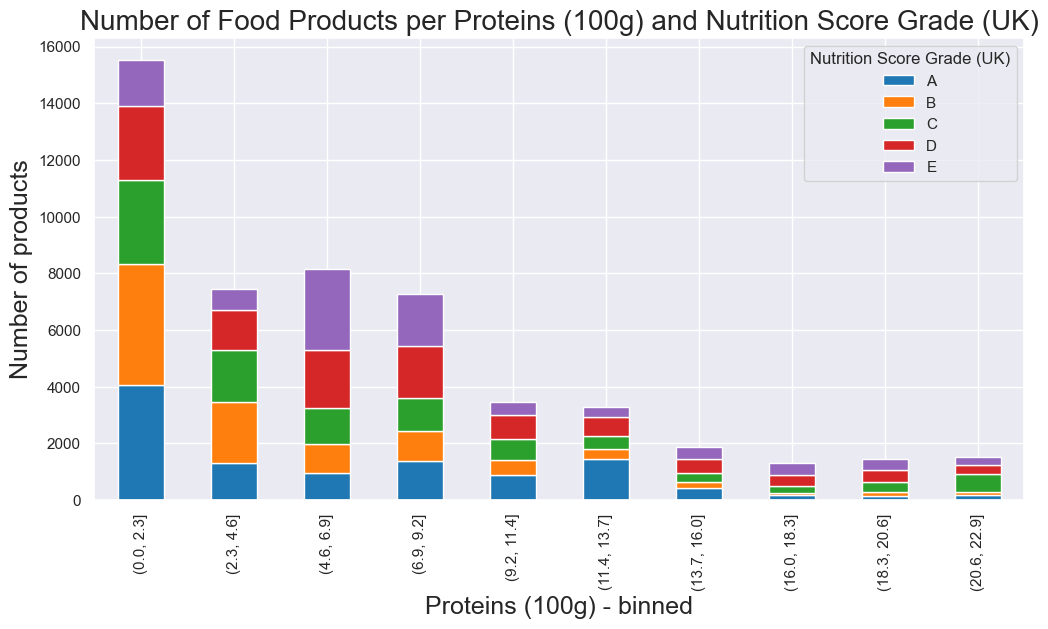

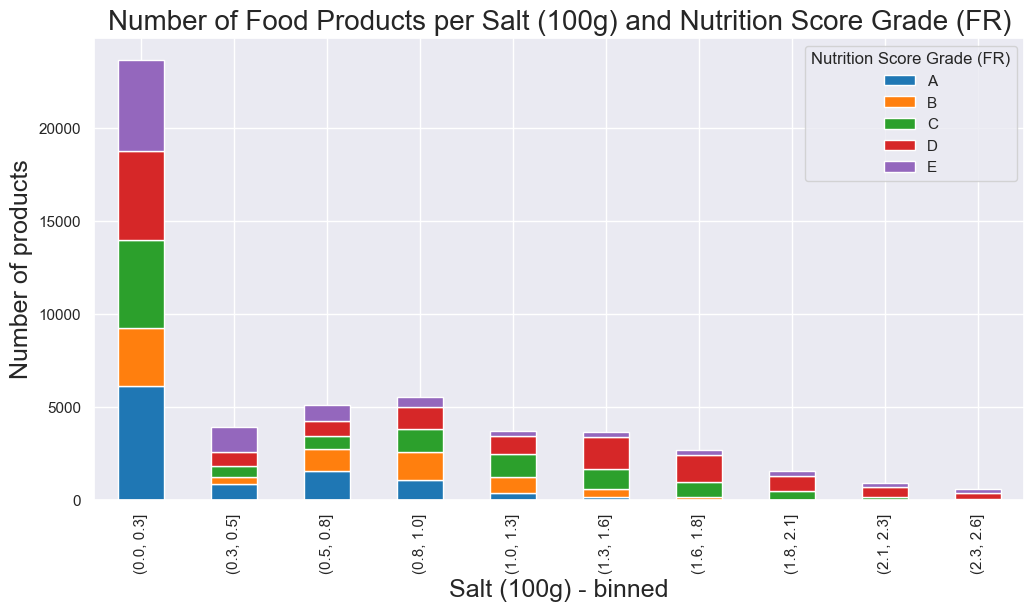

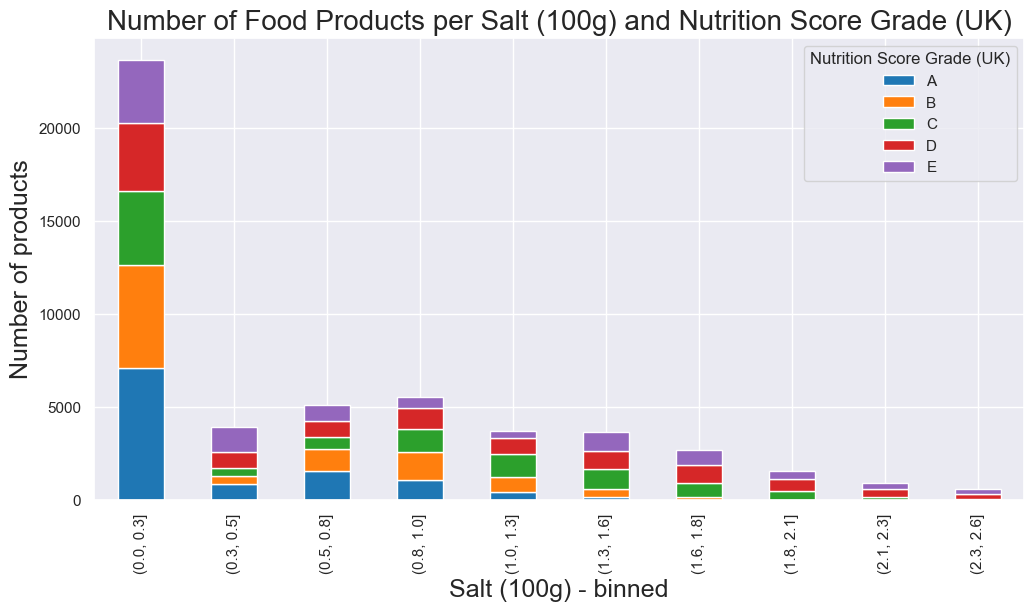

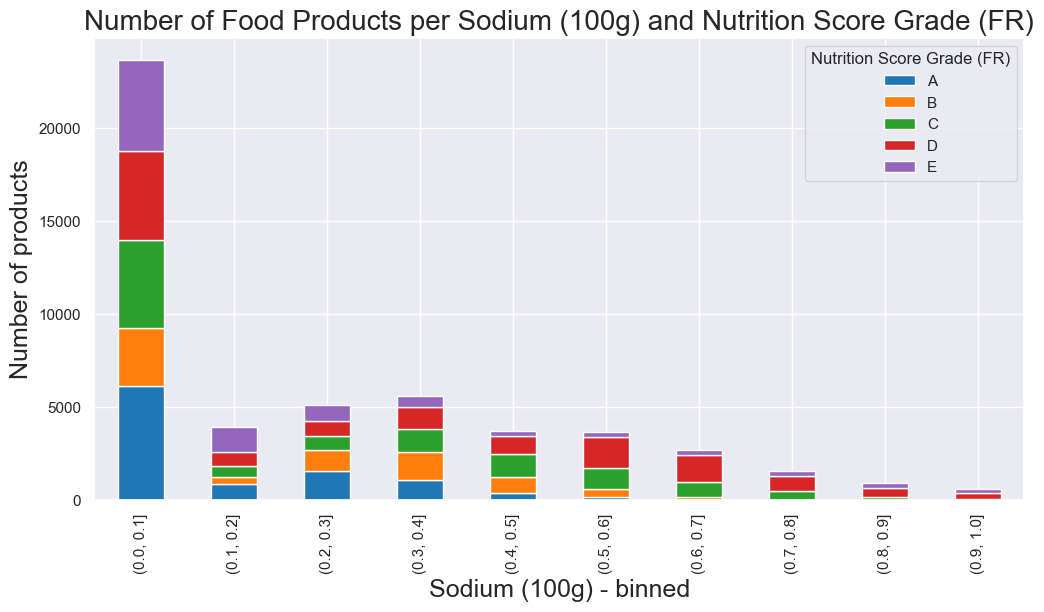

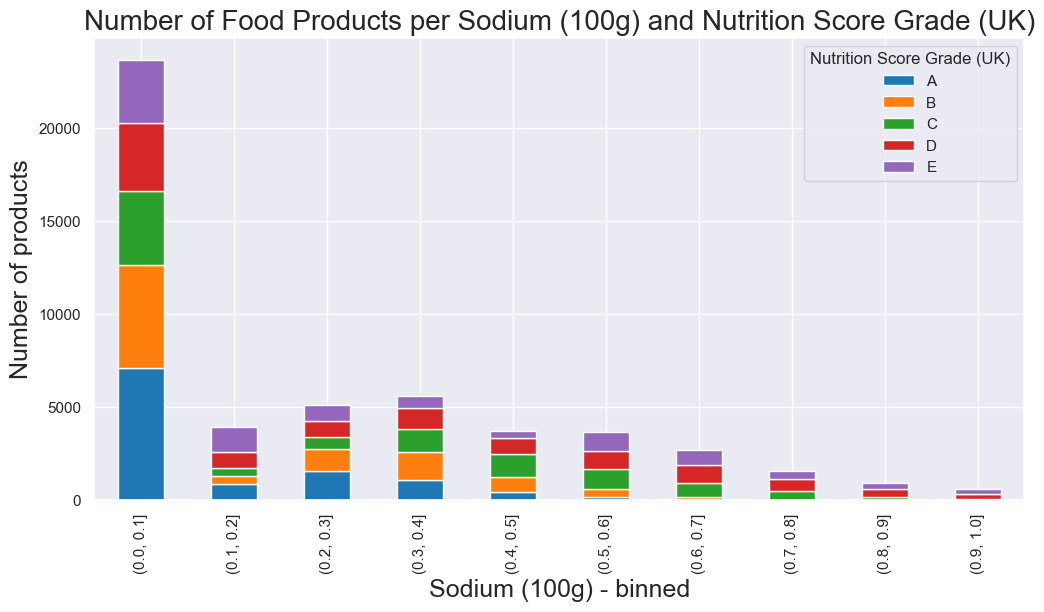

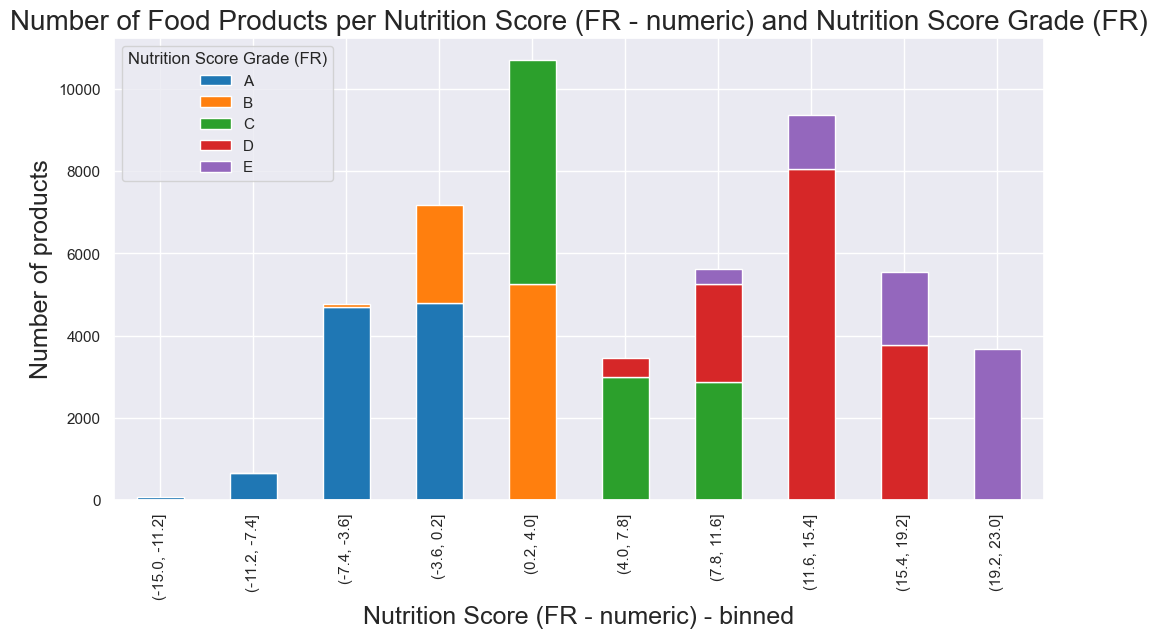

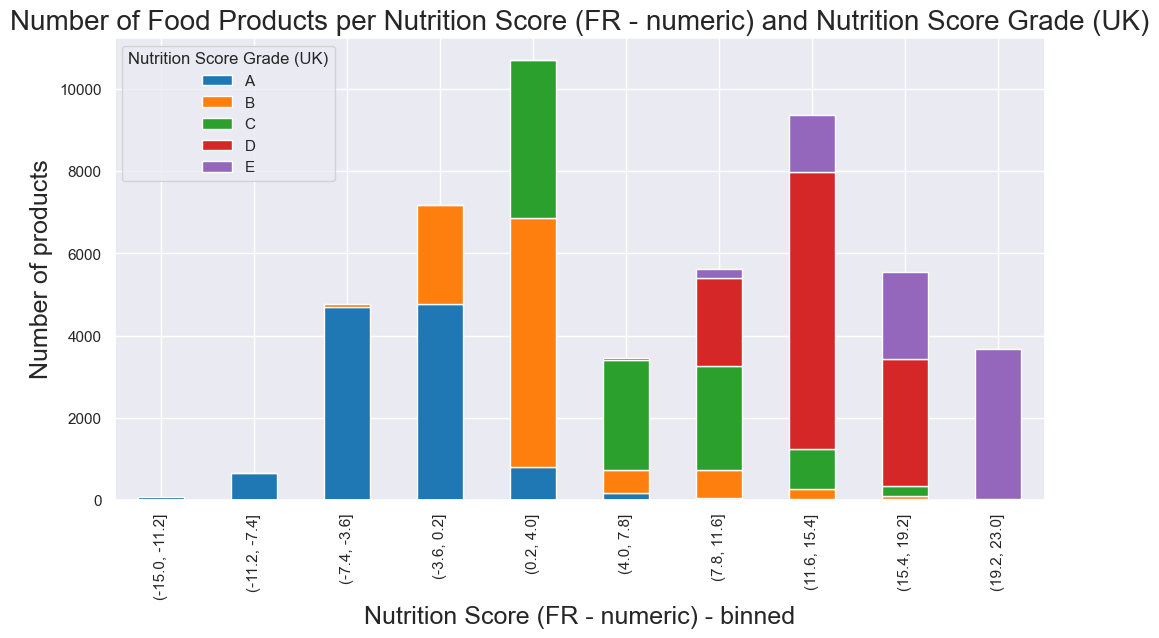

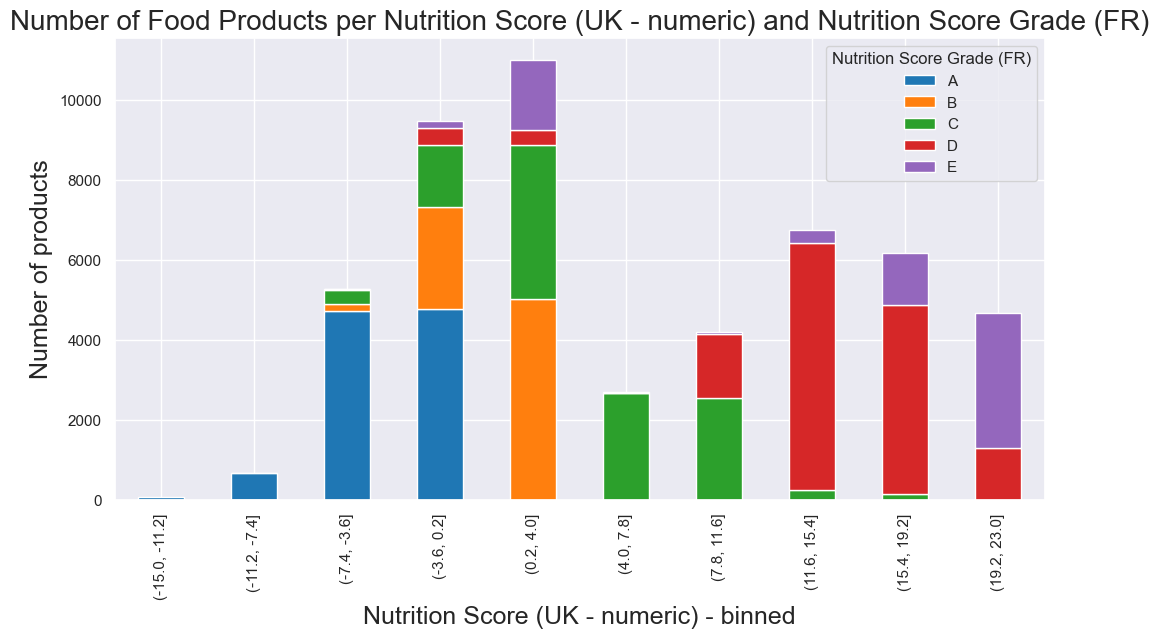

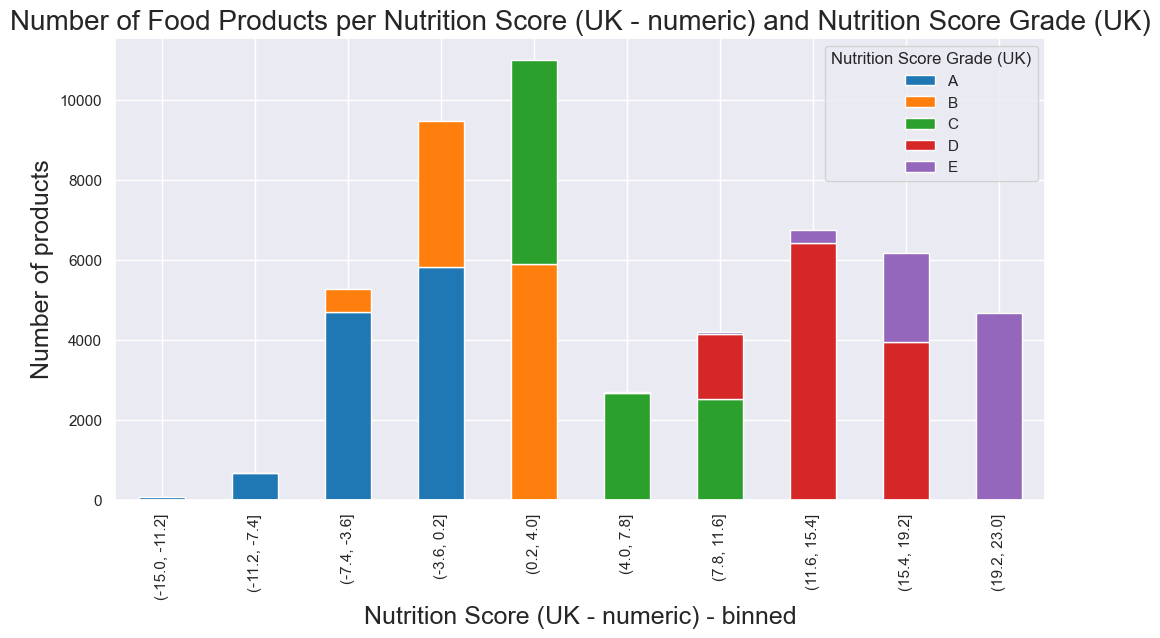

In [148]:
#We will define a function that plots a stacked bar chart for the distribution of each numeric variable based on each categorical variable

def display_stacked_charts(df: pd.DataFrame, labels: dict):
    num_col = []
    cat_col = []
    for c in df.columns:
        #Iterating over all columns and creating a list of categorical varibles with length <= 5
        if ((df[c].dtype == 'object') | (df[c].dtype == str)) & (len(df[c].unique()) <= 5):
            num_col.append(c)
        
        #Creating list of numeric variables with more than 10 different values
        elif ((df[c].dtype == float) | (df[c].dtype == int)) & (len(df[c].unique()) > 10):
            cat_col.append(c)
    
    #Defining the combinations between our 2 lists: 
    combinations = list(itertools.product(cat_col, num_col))
    
    sum_table = []
    #Iterating over each combinations
    for comb in combinations:
        #Creating a subset of our dataset where both categories are not NA
        subset = df.groupby([comb[0], comb[1]]).agg(count=(comb[0],'count')).reset_index()
        
        #Filtering to remove outlier data (we will remove everything above the 95% quantile) for smoother display
        quant = df[comb[0]].quantile(0.95)
        subset = subset[subset[comb[0]] < quant]
        
        #Aggregating over 10 bins
        bins = 10
        #Defining bin edges
        edges_temp = np.linspace(subset[comb[0]].min(), subset[comb[0]].max(), bins+1)
        
        #Rounding bin edges for better visualisation
        edges = []
        for e in edges_temp:
            edges.append(round(e,1))

        #Defining bin labels
        bin_labels = [f'({edges[i]}, {edges[i+1]}]' for i in range(bins)]
        
        #Creating bins
        subset['bin'] = pd.cut(subset[comb[0]], bins=bins, labels=bin_labels)

        #Aggregating by bin and categorical value
        subset = subset[['bin', comb[1], 'count']].groupby(['bin', comb[1]]).sum()

        #Pivoting over development stage for display of stacked bar chart
        subset = subset.reset_index().pivot_table(columns=comb[1], index='bin', values='count')

        #Displaying stacked bar chart
        subset.plot(kind="bar", stacked=True, figsize=(12,6))
        plt.title("Number of Food Products per {} and {}".format(labels[comb[0]], labels[comb[1]]))
        plt.xlabel("{} - binned".format(labels[comb[0]]))
        plt.ylabel("Number of products")
        plt.legend(title=labels[comb[1]])
        plt.show()
        
display_stacked_charts(df, labels)

### 2.4 Exploratory analysis using PCA

We will now use PCA to analyze all the variables of our dataset.

#### 2.4.1 Determining the optimal number of principal components

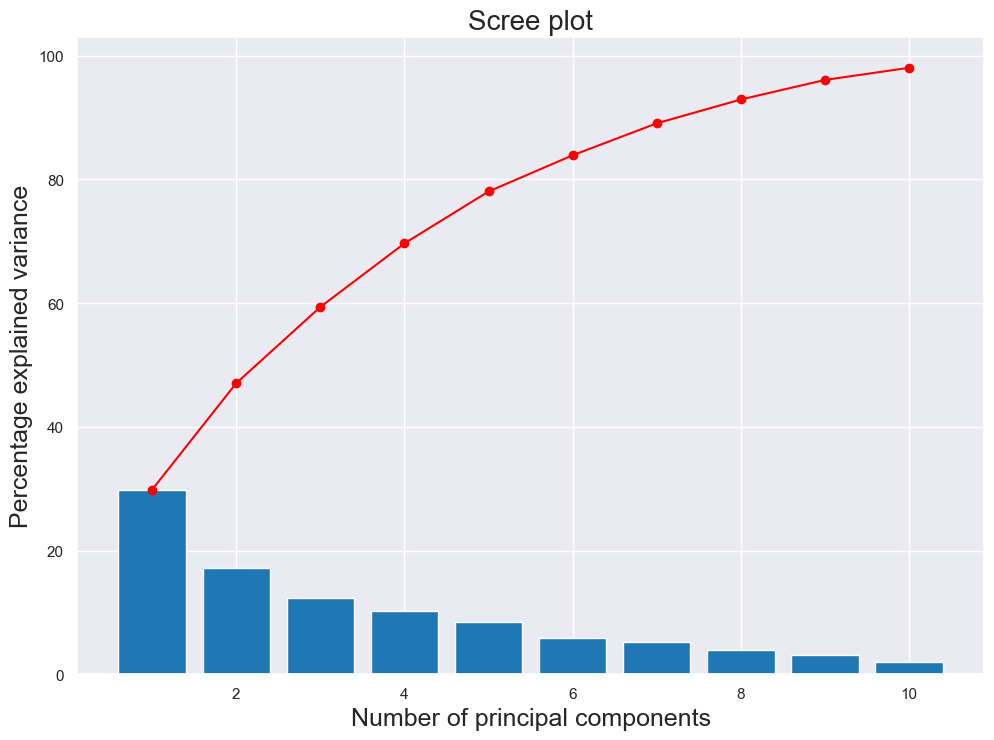

In [199]:
#Importing scaling and pipeline packages
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#Importing visualizing functions present in the functions.py file
from functions import *
#Importing PCA 
from sklearn.decomposition import PCA


#Creating a subset of data by removing categorical variables
def remove_cat_vars(df: pd.DataFrame):
    cat_cols = []
    for c in df.columns:
        #Checking that we do not have numeric variable
        if (df[c].dtype != float) & (df[c].dtype != int):
            cat_cols.append(c)
    
    X = df.drop(columns=cat_cols)
    
    return X.copy()

#Removing categorical variables from our dataframe and assigning it to the X variable
X = remove_cat_vars(df)
#Creating a pipeline for scaling our data and applying PCA

#We will start at 10 principal components
num_components = 10

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

# Create the PCA model
pca = PCA(n_components=num_components)

# Fit the model with the standardised data
pca.fit(X_scaled)

display_scree_plot(pca)

Analysis of the scree plot shows that we should select **6 principal components to explain 80% of the variance of our data**.

#### 2.4.2 Displaying correlation circles

We will now generate **correlation circles** for our first 5 factorial planes. These graphs will allow us to better estimate the correlation between variables

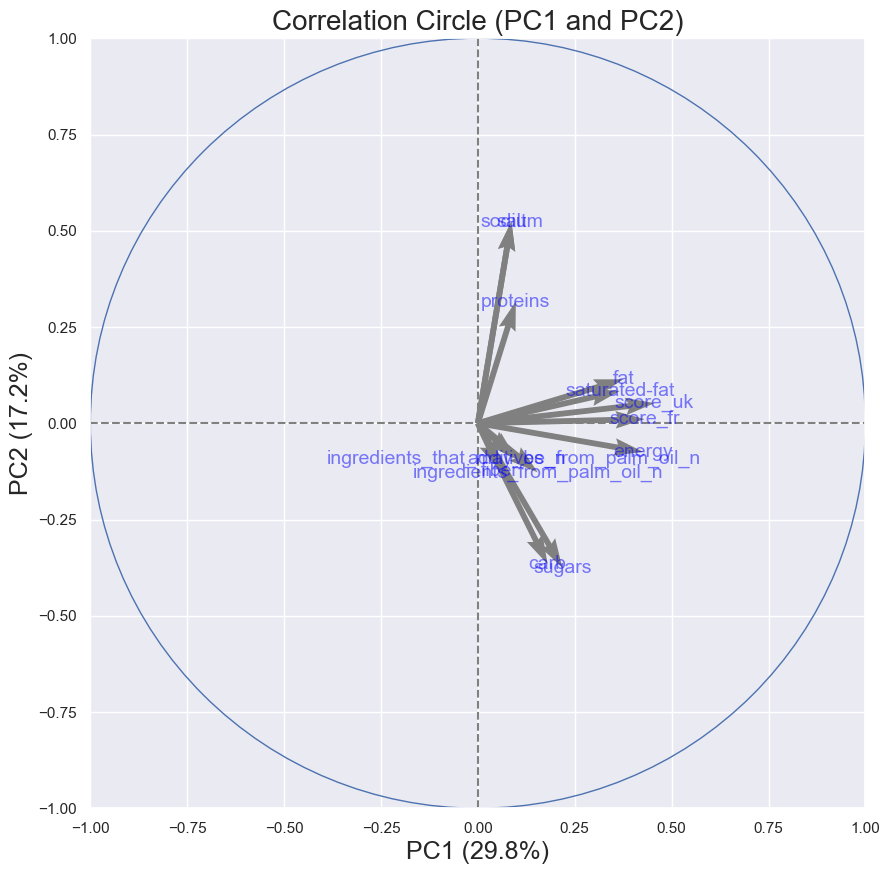

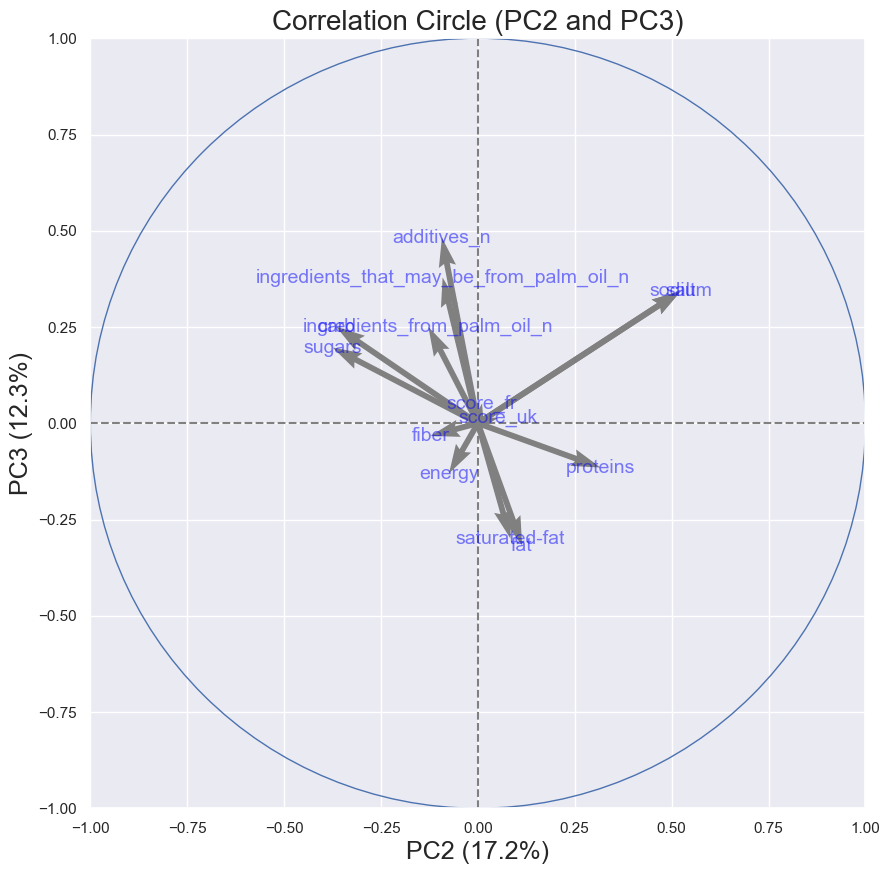

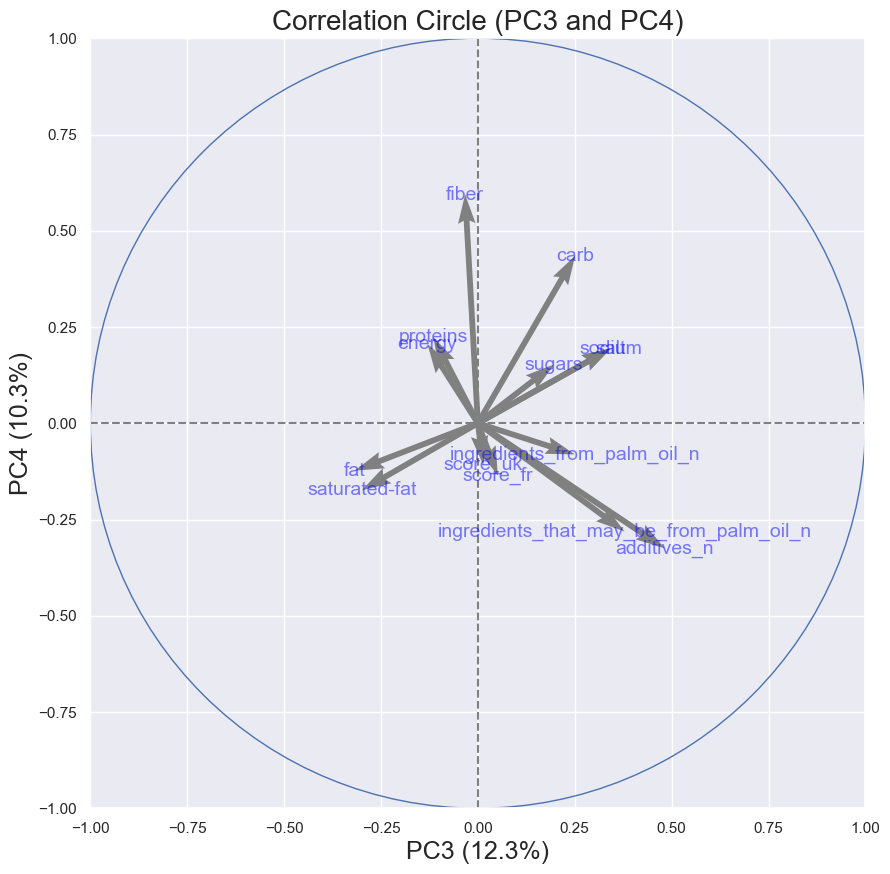

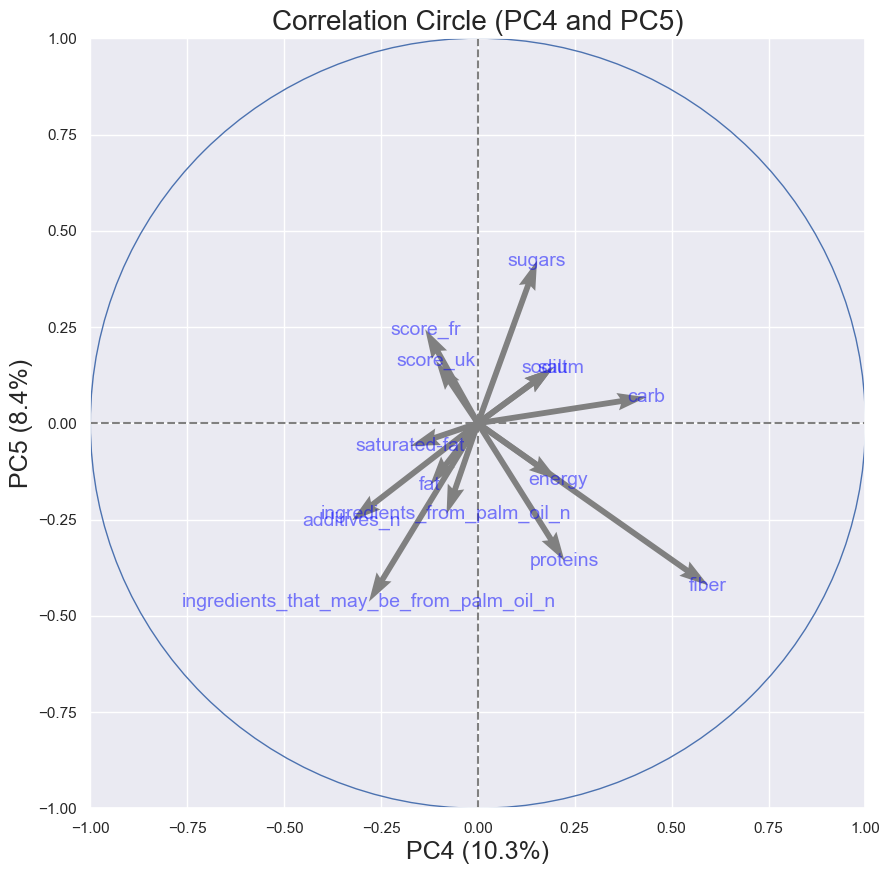

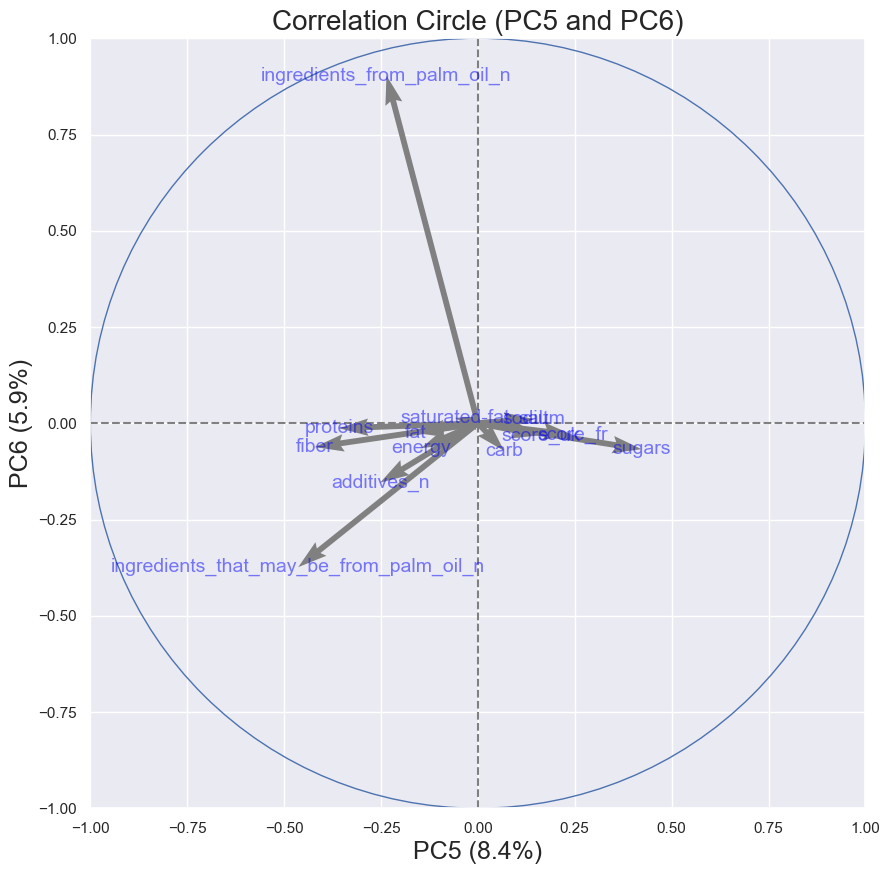

In [202]:
num_components = 6


# Generate a correlation circle for the first five factorial planes
def generate_correlation_circles(df: pd.DataFrame, n: int):
    # Create the PCA model
    pca = PCA(n_components=num_components)

    # Fit the model with the standardized data
    pca.fit(X_scaled)
    pcs = pca.components_ 
    for i in range(0, num_components-1):
        
        display_circles(pcs, num_components, pca, [(i,i+1)], labels = np.array(df.columns),)
        plt.show()

generate_correlation_circles(X, 6)

**Analysis:**

- On the first factorial plane, there is a strong correlation between salt, sodium and proteins, as well as a strong correlation between fat, saturated fat, and both nutrition scores. There is also a strong correlation between carb and sugars and between the number of ingredients from palm oil and possibly from palm oil.

- On the second factorial plane, we can see once more the strong correlation between fat and saturated fat, between sodium and salt and between sugars and carbs. There is also a strong correlation between the number of additives and the number of ingredients that may be from palm oil.

- On the third factorial plane, there are the same correlation as before but also a strong correlation between proteins and energy.

- On the fourth factorial plane, sugars and carbs are not correlated but there is a strong correlation between energy and fiber.

- There is no obvious correlation to be inferred from the fifth factorial plane.

PCA has allowed us to prove that there is a strong correlation between **sodium and salt**, **fat and saturated fat** and **sugars and carbs**, which is very logical.

## 3. Conclusion

Our data analysis has allowed us to outline several key characteristics of the food products referenced in this database.

Our findings will be summarized in the Powerpoint presentation present in the same folder as this notebook.  